In [9]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from collections import Counter
import operator
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor
from collections import Counter

In [37]:
def cleandf(dataframe,removeLowTenure=False):
    '''this will delete record with tenure=0.0 or -0.0 also it will create columns promotion rate'''
    dataframe.drop(dataframe.index[(dataframe['tenure']==-0.0) | (dataframe['tenure'].isnull()) | (dataframe['tenure']==0.0)],inplace=True)## pu this also 
    ##dataframe.drop('precal_bonus_rt',axis=1,inplace=True)
    dataframe.fillna(0,inplace=True)
    if(removeLowTenure==True):
        dataframe.drop(dataframe.index[(dataframe['tenure']<1.0)],inplace=True)## pu this also 
    dataframe['promotion_rate'] = dataframe['promotions']/dataframe['tenure']    

In [11]:
def getDataframe_30Emp(data,year,cutoff):
    print(data.shape)
    df = pd.merge(data[data['year']==year],data[data['year']==year].groupby('job_dsc').aoid.agg({'count':'count'}).reset_index(),on=['job_dsc'])
    df = df[df['count']>=cutoff]
    df.drop('count',axis=1,inplace=True)
    print(df.shape)
    return df
    del(df)

In [ ]:
def get_quantile(data,year,Bonus_quant,SalaryHike_quant,CompaRT_quant,PromotionRate_quant,tenure_quant):
    g1 = data[data['year']==year].groupby(['job_dsc']).bonus_ratio.quantile(Bonus_quant)
    g1 = g1.to_frame(name='bonus_ratio_quantile').reset_index()
    df_qntile = pd.merge(data[data['year']==year],g1[['job_dsc','bonus_ratio_quantile']],on=['job_dsc'])
    
    g2 = data[data['year']==year].groupby(['job_dsc']).salary_hike.quantile(SalaryHike_quant)
    g2 = g2.to_frame(name='salary_hike_quantile').reset_index()
    df_qntile = pd.merge(df_qntile,g2[['job_dsc','salary_hike_quantile']],on=['job_dsc'])
    
    g3 = data[data['year']==year].groupby(['job_dsc']).compa_rt.quantile(CompaRT_quant)
    g3 = g3.to_frame(name='compa_rt_quantile').reset_index()
    df_qntile = pd.merge(df_qntile,g3[['job_dsc','compa_rt_quantile']],on=['job_dsc'])
    
    g4 = data[data['year']==year].groupby(['job_dsc']).promotion_rate.quantile(PromotionRate_quant)
    g4 = g4.to_frame(name='promotion_rate_quantile').reset_index()
    df_qntile = pd.merge(df_qntile,g4[['job_dsc','promotion_rate_quantile']],on=['job_dsc'])
    
    g5 = data[data['year']==year].groupby(['job_dsc']).tenure.quantile(tenure_quant)
    g5 = g5.to_frame(name='tenure_quantile').reset_index()
    df_qntile = pd.merge(df_qntile,g5[['job_dsc','tenure_quantile']],on=['job_dsc'])
    
    del(g1,g2,g3,g4,g5)
    return df_qntile
    del(df_qntile)

In [ ]:
def getdistribution(dataInJob,lis_jobs):
    plt.suptitle("feature distribution of job",color='r')
    plt.figure(figsize=(25,40))
    plt.subplot(12,4,1)
    ax0 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].bonus_ratio.hist(label=lis_jobs[0])
    ax0.set_title('bonus ratio dist',color='red')
    ax0.legend()
    plt.subplot(12,4,2)
    ax1 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].salary_hike.hist(label=lis_jobs[0])
    ax1.set_title('salaryHike dist',color='red')
    ax1.legend()
    plt.subplot(12,4,3)
    ax2 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].compa_rt.hist(label=lis_jobs[0])
    ax2.set_title('compaRT dist',color='red')
    ax2.legend()
    plt.subplot(12,4,4)
    ax3 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].promotion_rate.hist(label=lis_jobs[0])
    ax3.set_title('promotion_rate dist',color='red')
    ax3.legend()
    plt.subplot(12,4,5)
    ax4 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].bonus_ratio.hist(label=lis_jobs[1])
    ax4.legend()
    plt.subplot(12,4,6)
    ax5 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].salary_hike.hist(label=lis_jobs[1])
    ax5.legend()
    plt.subplot(12,4,7)
    ax6 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].compa_rt.hist(label=lis_jobs[1])
    ax6.legend()
    plt.subplot(12,4,8)
    ax7 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].promotion_rate.hist(label=lis_jobs[1])
    ax7.legend()
    plt.subplot(12,4,9)
    ax8 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].bonus_ratio.hist(label=lis_jobs[2])
    ax8.legend()
    plt.subplot(12,4,10)
    ax9 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].salary_hike.hist(label=lis_jobs[2])
    ax9.legend()
    plt.subplot(12,4,11)
    ax10 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].compa_rt.hist(label=lis_jobs[2])
    ax10.legend()
    plt.subplot(12,4,12)
    ax11 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].promotion_rate.hist(label=lis_jobs[2])
    ax11.legend()
    plt.subplot(12,4,13)
    ax12 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].bonus_ratio.hist(label=lis_jobs[3])
    ax12.legend()
    plt.subplot(12,4,14)
    ax13 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].salary_hike.hist(label=lis_jobs[3])
    ax13.legend()
    plt.subplot(12,4,15)
    ax14 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].compa_rt.hist(label=lis_jobs[3])
    ax14.legend()
    plt.subplot(12,4,16)
    ax15 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].promotion_rate.hist(label=lis_jobs[3])
    ax15.legend()
    plt.subplot(12,4,17)
    ax16 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].bonus_ratio.hist(label=lis_jobs[4])
    ax16.legend()
    plt.subplot(12,4,18)
    ax17 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].salary_hike.hist(label=lis_jobs[4])
    ax17.legend()
    plt.subplot(12,4,19)
    ax18 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].compa_rt.hist(label=lis_jobs[4])
    ax18.legend()
    plt.subplot(12,4,20)
    ax19 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].promotion_rate.hist(label=lis_jobs[4])
    ax19.legend()
    plt.subplot(12,4,21)
    ax20 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].bonus_ratio.hist(label=lis_jobs[5])
    ax20.legend()
    plt.subplot(12,4,22)
    ax21 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].salary_hike.hist(label=lis_jobs[5])
    ax21.legend()
    plt.subplot(12,4,23)
    ax22 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].compa_rt.hist(label=lis_jobs[5])
    ax2.legend()
    plt.subplot(12,4,24)
    ax23 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].promotion_rate.hist(label=lis_jobs[5])
    ax23.legend()
    plt.subplot(12,4,25)
    ax24 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].bonus_ratio.hist(label=lis_jobs[6])
    ax24.legend()
    plt.subplot(12,4,26)
    ax25 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].salary_hike.hist(label=lis_jobs[6])
    ax25.legend()
    plt.subplot(12,4,27)
    ax26 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].compa_rt.hist(label=lis_jobs[6])
    ax26.legend()
    plt.subplot(12,4,28)
    ax27 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].promotion_rate.hist(label=lis_jobs[6])
    ax27.legend()
    plt.subplot(12,4,29)
    ax28 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].bonus_ratio.hist(label=lis_jobs[7])
    ax28.legend()
    plt.subplot(12,4,30)
    ax29 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].salary_hike.hist(label=lis_jobs[7])
    ax29.legend()
    plt.subplot(12,4,31)
    ax30 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].compa_rt.hist(label=lis_jobs[7])
    ax30.legend()
    plt.subplot(12,4,32)
    ax31 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].promotion_rate.hist(label=lis_jobs[7])
    ax31.legend()
    plt.subplot(12,4,33)
    ax32 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].bonus_ratio.hist(label=lis_jobs[8])
    ax32.legend()
    plt.subplot(12,4,34)
    ax33 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].salary_hike.hist(label=lis_jobs[8])
    ax33.legend()
    plt.subplot(12,4,35)
    ax34 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].compa_rt.hist(label=lis_jobs[8])
    ax34.legend()
    plt.subplot(12,4,36)
    ax35 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].promotion_rate.hist(label=lis_jobs[8])
    ax35.legend()
    plt.subplot(12,4,37)
    ax36 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].bonus_ratio.hist(label=lis_jobs[9])
    ax36.legend()
    plt.subplot(12,4,38)
    ax37 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].salary_hike.hist(label=lis_jobs[9])
    ax37.legend()
    plt.subplot(12,4,39)
    ax38 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].compa_rt.hist(label=lis_jobs[9])
    ax38.legend()
    plt.subplot(12,4,40)
    ax39 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].promotion_rate.hist(label=lis_jobs[9])
    ax39.legend()
    plt.subplot(12,4,41)
    ax40 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].bonus_ratio.hist(label=lis_jobs[10])
    ax40.legend()
    plt.subplot(12,4,42)
    ax41 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].salary_hike.hist(label=lis_jobs[10])
    ax41.legend()
    plt.subplot(12,4,43)
    ax42 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].compa_rt.hist(label=lis_jobs[10])
    ax42.legend()
    plt.subplot(12,4,44)
    ax43 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].promotion_rate.hist(label=lis_jobs[10])
    ax43.legend()
    plt.subplot(12,4,45)
    ax44 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].bonus_ratio.hist(label=lis_jobs[11])
    ax44.legend()
    plt.subplot(12,4,46)
    ax45 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].salary_hike.hist(label=lis_jobs[11])
    ax45.legend()
    plt.subplot(12,4,47)
    ax46 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].compa_rt.hist(label=lis_jobs[11])
    ax46.legend()
    plt.subplot(12,4,48)
    ax47 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].promotion_rate.hist(label=lis_jobs[11])
    ax47.legend()
    plt.show()
    plt.savefig('10jobdistribution.png')
#     ['bonus_ratio','salary_hike','compa_rt','promotion_rate']

In [12]:
def getdistribution(dataInJob,lis_jobs):
#     scaler = MinMaxScaler()
#     dataInJob[['bonus_ratio','salary_hike','compa_rt','promotion_rate']] = scaler.fit_transform(dataInJob[['bonus_ratio','salary_hike','compa_rt','promotion_rate']])
    plt.suptitle("feature distribution of job",color='r')
    plt.figure(figsize=(25,40))
    plt.subplot(12,4,1)
    ax0 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].bonus_ratio.hist(label=lis_jobs[0])
    ax0.set_title('bonus ratio dist',color='red')
    ax0.legend()
    plt.subplot(12,4,2)
    ax1 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].salary_hike.hist(label=lis_jobs[0])
    ax1.set_title('salaryHike dist',color='red')
    ax1.legend()
    plt.subplot(12,4,3)
    ax2 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].compa_rt.hist(label=lis_jobs[0])
    ax2.set_title('compaRT dist',color='red')
    ax2.legend()
    plt.subplot(12,4,4)
    ax3 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]].promotion_rate.hist(label=lis_jobs[0])
    ax3.set_title('promotion_rate dist',color='red')
    ax3.legend()
    plt.subplot(12,4,5)
    ax4 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].bonus_ratio.hist(label=lis_jobs[1])
    ax4.legend()
    plt.subplot(12,4,6)
    ax5 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].salary_hike.hist(label=lis_jobs[1])
    ax5.legend()
    plt.subplot(12,4,7)
    ax6 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].compa_rt.hist(label=lis_jobs[1])
    ax6.legend()
    plt.subplot(12,4,8)
    ax7 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]].promotion_rate.hist(label=lis_jobs[1])
    ax7.legend()
    plt.subplot(12,4,9)
    ax8 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].bonus_ratio.hist(label=lis_jobs[2])
    ax8.legend()
    plt.subplot(12,4,10)
    ax9 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].salary_hike.hist(label=lis_jobs[2])
    ax9.legend()
    plt.subplot(12,4,11)
    ax10 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].compa_rt.hist(label=lis_jobs[2])
    ax10.legend()
    plt.subplot(12,4,12)
    ax11 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]].promotion_rate.hist(label=lis_jobs[2])
    ax11.legend()
    plt.subplot(12,4,13)
    ax12 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].bonus_ratio.hist(label=lis_jobs[3])
    ax12.legend()
    plt.subplot(12,4,14)
    ax13 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].salary_hike.hist(label=lis_jobs[3])
    ax13.legend()
    plt.subplot(12,4,15)
    ax14 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].compa_rt.hist(label=lis_jobs[3])
    ax14.legend()
    plt.subplot(12,4,16)
    ax15 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]].promotion_rate.hist(label=lis_jobs[3])
    ax15.legend()
    plt.subplot(12,4,17)
    ax16 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].bonus_ratio.hist(label=lis_jobs[4])
    ax16.legend()
    plt.subplot(12,4,18)
    ax17 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].salary_hike.hist(label=lis_jobs[4])
    ax17.legend()
    plt.subplot(12,4,19)
    ax18 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].compa_rt.hist(label=lis_jobs[4])
    ax18.legend()
    plt.subplot(12,4,20)
    ax19 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]].promotion_rate.hist(label=lis_jobs[4])
    ax19.legend()
    plt.subplot(12,4,21)
    ax20 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].bonus_ratio.hist(label=lis_jobs[5])
    ax20.legend()
    plt.subplot(12,4,22)
    ax21 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].salary_hike.hist(label=lis_jobs[5])
    ax21.legend()
    plt.subplot(12,4,23)
    ax22 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].compa_rt.hist(label=lis_jobs[5])
    ax2.legend()
    plt.subplot(12,4,24)
    ax23 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]].promotion_rate.hist(label=lis_jobs[5])
    ax23.legend()
    plt.subplot(12,4,25)
    ax24 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].bonus_ratio.hist(label=lis_jobs[6])
    ax24.legend()
    plt.subplot(12,4,26)
    ax25 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].salary_hike.hist(label=lis_jobs[6])
    ax25.legend()
    plt.subplot(12,4,27)
    ax26 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].compa_rt.hist(label=lis_jobs[6])
    ax26.legend()
    plt.subplot(12,4,28)
    ax27 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]].promotion_rate.hist(label=lis_jobs[6])
    ax27.legend()
    plt.subplot(12,4,29)
    ax28 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].bonus_ratio.hist(label=lis_jobs[7])
    ax28.legend()
    plt.subplot(12,4,30)
    ax29 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].salary_hike.hist(label=lis_jobs[7])
    ax29.legend()
    plt.subplot(12,4,31)
    ax30 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].compa_rt.hist(label=lis_jobs[7])
    ax30.legend()
    plt.subplot(12,4,32)
    ax31 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]].promotion_rate.hist(label=lis_jobs[7])
    ax31.legend()
    plt.subplot(12,4,33)
    ax32 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].bonus_ratio.hist(label=lis_jobs[8])
    ax32.legend()
    plt.subplot(12,4,34)
    ax33 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].salary_hike.hist(label=lis_jobs[8])
    ax33.legend()
    plt.subplot(12,4,35)
    ax34 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].compa_rt.hist(label=lis_jobs[8])
    ax34.legend()
    plt.subplot(12,4,36)
    ax35 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]].promotion_rate.hist(label=lis_jobs[8])
    ax35.legend()
    plt.subplot(12,4,37)
    ax36 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].bonus_ratio.hist(label=lis_jobs[9])
    ax36.legend()
    plt.subplot(12,4,38)
    ax37 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].salary_hike.hist(label=lis_jobs[9])
    ax37.legend()
    plt.subplot(12,4,39)
    ax38 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].compa_rt.hist(label=lis_jobs[9])
    ax38.legend()
    plt.subplot(12,4,40)
    ax39 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]].promotion_rate.hist(label=lis_jobs[9])
    ax39.legend()
    plt.subplot(12,4,41)
    ax40 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].bonus_ratio.hist(label=lis_jobs[10])
    ax40.legend()
    plt.subplot(12,4,42)
    ax41 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].salary_hike.hist(label=lis_jobs[10])
    ax41.legend()
    plt.subplot(12,4,43)
    ax42 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].compa_rt.hist(label=lis_jobs[10])
    ax42.legend()
    plt.subplot(12,4,44)
    ax43 = dataInJob[dataInJob['job_dsc']==lis_jobs[10]].promotion_rate.hist(label=lis_jobs[10])
    ax43.legend()
    plt.subplot(12,4,45)
    ax44 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].bonus_ratio.hist(label=lis_jobs[11])
    ax44.legend()
    plt.subplot(12,4,46)
    ax45 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].salary_hike.hist(label=lis_jobs[11])
    ax45.legend()
    plt.subplot(12,4,47)
    ax46 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].compa_rt.hist(label=lis_jobs[11])
    ax46.legend()
    plt.subplot(12,4,48)
    ax47 = dataInJob[dataInJob['job_dsc']==lis_jobs[11]].promotion_rate.hist(label=lis_jobs[11])
    ax47.legend()
    plt.show()
    plt.savefig('10jobdistribution.png')

In [13]:
def get_quantile(data,year,Bonus_quant,SalaryHike_quant,CompaRT_quant,PromotionRate_quant):
    g1 = data[data['year']==year].groupby(['job_dsc']).bonus_ratio.quantile(Bonus_quant)
    g1 = g1.to_frame(name='Bonus_quantile').reset_index()
    df_qntile = pd.merge(data[data['year']==year],g1[['job_dsc','Bonus_quantile']],on=['job_dsc'])
    g2 = data[data['year']==year].groupby(['job_dsc']).salary_hike.quantile(SalaryHike_quant)
    g2 = g2.to_frame(name='SalaryHike_quantile').reset_index()
    df_qntile = pd.merge(df_qntile,g2[['job_dsc','SalaryHike_quantile']],on=['job_dsc'])
    g3 = data[data['year']==year].groupby(['job_dsc']).compa_rt.quantile(CompaRT_quant)
    g3 = g3.to_frame(name='CompaRT_quantile').reset_index()
    df_qntile = pd.merge(df_qntile,g3[['job_dsc','CompaRT_quantile']],on=['job_dsc'])
    g4 = data[data['year']==year].groupby(['job_dsc']).promotion_rate.quantile(PromotionRate_quant)
    g4 = g4.to_frame(name='PromotionRate_quantile').reset_index()
    df_qntile = pd.merge(df_qntile,g4[['job_dsc','PromotionRate_quantile']],on=['job_dsc'])
#     g1 = data[data['year']==year].groupby(['job_dsc','experience_bin']).bonus_ratio.quantile(Bonus_quant)
#     g1 = g1.to_frame(name='Bonus_quantile').reset_index()
#     df_qntile = pd.merge(data[data['year']==year],g1[['job_dsc','experience_bin','Bonus_quantile']],on=['job_dsc','experience_bin'])
#     g2 = data[data['year']==year].groupby(['job_dsc','experience_bin']).salary_hike.quantile(SalaryHike_quant)
#     g2 = g2.to_frame(name='SalaryHike_quantile').reset_index()
#     df_qntile = pd.merge(df_qntile,g2[['job_dsc','experience_bin','SalaryHike_quantile']],on=['job_dsc','experience_bin'])
#     g3 = data[data['year']==year].groupby(['job_dsc','experience_bin']).compa_rt.quantile(CompaRT_quant)
#     g3 = g3.to_frame(name='CompaRT_quantile').reset_index()
#     df_qntile = pd.merge(df_qntile,g3[['job_dsc','experience_bin','CompaRT_quantile']],on=['job_dsc','experience_bin'])
    del(g1,g2,g3)
    return df_qntile
    del(df_qntile)

In [14]:
def get_high_performer(dataframe_quantile,data,year):
    '''
    this will create a column and fill with aoid if it is highperformer and NaN if it is not
    '''
    dataframe_quantile['IsHighPerformerAll'] = np.where((dataframe_quantile['bonus_ratio'] >= dataframe_quantile['Bonus_quantile']) & (dataframe_quantile['salary_hike'] >= dataframe_quantile['SalaryHike_quantile']) &(dataframe_quantile['compa_rt']>=dataframe_quantile['CompaRT_quantile']) &(dataframe_quantile['promotion_rate'] >= dataframe_quantile['PromotionRate_quantile']),dataframe_quantile['aoid'],np.NaN)
    dataframe_quantile['IsHighPerformerSalBonus'] = np.where((dataframe_quantile['bonus_ratio'] >= dataframe_quantile['Bonus_quantile']) & (dataframe_quantile['salary_hike'] >= dataframe_quantile['SalaryHike_quantile']),dataframe_quantile['aoid'],np.NaN)
    dataframe_quantile['IsHighPerformerSalCompa'] = np.where((dataframe_quantile['salary_hike'] >= dataframe_quantile['SalaryHike_quantile']) & (dataframe_quantile['compa_rt'] >= dataframe_quantile['CompaRT_quantile']),dataframe_quantile['aoid'],np.NaN)
    dataframe_quantile['IsHighPerformerBonusCompa'] = np.where((dataframe_quantile['bonus_ratio'] >= dataframe_quantile['Bonus_quantile']) & (dataframe_quantile['compa_rt'] >= dataframe_quantile['CompaRT_quantile']),dataframe_quantile['aoid'],np.NaN)
    dataframe_quantile['IsHighPerformerBonus'] = np.where(dataframe_quantile['bonus_ratio']>=dataframe_quantile['Bonus_quantile'],dataframe_quantile['aoid'],np.NaN)
    dataframe_quantile['IsHighPerformerSalaryHike'] = np.where(dataframe_quantile['salary_hike']>=dataframe_quantile['SalaryHike_quantile'],dataframe_quantile['aoid'],np.NaN)
    dataframe_quantile['IsHighPerformerCompaRT'] = np.where(dataframe_quantile['compa_rt']>=dataframe_quantile['CompaRT_quantile'],dataframe_quantile['aoid'],np.NaN)
    dataframe_quantile['IsHighPerformerPromotion'] = np.where((dataframe_quantile['promotion_rate']>=dataframe_quantile['PromotionRate_quantile'])&(dataframe_quantile['tenure']>=1.0),dataframe_quantile['aoid'],np.NaN)
    print("number of high performer in all Dimension:-",dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].shape[0])
    print("number of high performer in Salary and Bonus:-",dataframe_quantile[dataframe_quantile['IsHighPerformerSalBonus'].notnull()].shape[0])
    print("number of high performer in Salary and Compa:-",dataframe_quantile[dataframe_quantile['IsHighPerformerSalCompa'].notnull()].shape[0])
    print("number of high performer in Bonus and Compa:-",dataframe_quantile[dataframe_quantile['IsHighPerformerBonusCompa'].notnull()].shape[0])
    print("number of high performer in only Bonus:-",dataframe_quantile[dataframe_quantile['IsHighPerformerBonus'].notnull()].shape[0])
    print("number of high performer in only SalaryHike:-",dataframe_quantile[dataframe_quantile['IsHighPerformerSalaryHike'].notnull()].shape[0])
    print("number of high performer in only CompaRT:-",dataframe_quantile[dataframe_quantile['IsHighPerformerCompaRT'].notnull()].shape[0])
    print("number of high performer in only Promotion:-",dataframe_quantile[dataframe_quantile['IsHighPerformerPromotion'].notnull()].shape[0])
    x = pd.merge(data[data['year']==year].groupby('job_dsc').aoid.nunique().to_frame(name='total_employee').reset_index(),dataframe_quantile[dataframe_quantile['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerBonus').reset_index(), on='job_dsc' )
    x = pd.merge(x,dataframe_quantile[dataframe_quantile['IsHighPerformerSalaryHike'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerSalaryHike').reset_index(), on='job_dsc')
    x = pd.merge(x,dataframe_quantile[dataframe_quantile['IsHighPerformerCompaRT'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerCompaRT').reset_index(), on='job_dsc')
    x = pd.merge(x,dataframe_quantile[dataframe_quantile['IsHighPerformerPromotion'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerPromotion').reset_index(), on='job_dsc')
    x = pd.merge(x,dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerAll').reset_index(), on='job_dsc')
    x = pd.merge(x,dataframe_quantile[dataframe_quantile['IsHighPerformerSalBonus'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerSalBonus').reset_index(), on='job_dsc')
    x = pd.merge(x,dataframe_quantile[dataframe_quantile['IsHighPerformerSalCompa'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerSalCompa').reset_index(), on='job_dsc')
    x = pd.merge(x,dataframe_quantile[dataframe_quantile['IsHighPerformerBonusCompa'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerBonusCompa').reset_index(), on='job_dsc')
    x['Bonuspercentage'] = (x['IsHighPerformerBonus']/x['total_employee'])*100
    x['Salarypercentage'] = (x['IsHighPerformerSalaryHike']/x['total_employee'])*100
    x['CompaRTpercentage'] = (x['IsHighPerformerCompaRT']/x['total_employee'])*100
    x['Promotionpercentage'] = (x['IsHighPerformerPromotion']/x['total_employee'])*100
    x['ALLDimension'] = (x['IsHighPerformerAll']/x['total_employee'])*100
    x['SalBonus'] = (x['IsHighPerformerSalBonus']/x['total_employee'])*100
    x['SalCompa'] = (x['IsHighPerformerSalCompa']/x['total_employee'])*100
    x['BonusCompa'] = (x['IsHighPerformerBonusCompa']/x['total_employee'])*100
    ##print(dataframe_quantile[dataframe_quantile['IsHighPerformer'].notnull()].groupby('job_dsc').aoid.agg('count').nlargest(10))
    ##return dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]
    return x.head()
    ##return x.head()

In [15]:
def subplot_high_performer_perc(dataframe_quantil,data,year):
    '''
    this will plot the highperformer taking one at once in consideraiton like bonus only, salaryhike only, compart only
    '''
    tota_Bonus = dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().sum()
    tota_salary = dataframe_quantil[(dataframe_quantil['IsHighPerformerSalaryHike'].notnull())].groupby('job_dsc').aoid.nunique().sum()
    total_CompaRT = dataframe_quantil[(dataframe_quantil['IsHighPerformerCompaRT'].notnull())].groupby('job_dsc').aoid.nunique().sum()
    total_Promotion = dataframe_quantil[(dataframe_quantil['IsHighPerformerPromotion'].notnull())&(dataframe_quantil['tenure']>=1.0)].groupby('job_dsc').aoid.nunique().sum()
    xticks = dataframe_quantil[dataframe_quantil['job_dsc'].isin(lis_jobs)].groupby('job_dsc').aoid.nunique().index
    x = np.arange(len(xticks))
    plt.figure(figsize=(17,10))
    plt.subplot(411)
    ax0 = ((dataframe_quantil[(dataframe_quantil['IsHighPerformerBonus'].notnull()) &(dataframe_quantil['job_dsc'].isin(xticks))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull() & (dataframe_quantil['job_dsc'].isin(xticks))]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',rot=90, color='blue',label='Bonus',title=tota_Bonus)
    ax0.set_xticks([])
    ax0.set_ylim(0,100)
    ax0.set_yticks(np.arange(0, 100, 10))
    ax0.set_xlabel("")
    ax0.legend()
    plt.subplot(412)
    ax1 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerSalaryHike'].notnull()&(dataframe_quantil['job_dsc'].isin(xticks))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerSalaryHike'].notnull() & (dataframe_quantil['job_dsc'].isin(xticks))]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',color='g',rot=90,label='Salary',title=tota_salary)    
    ax1.set_ylim(0,100)
    ax1.set_yticks(np.arange(0, 100, 10))
    ax1.set_xticks([])
    ax1.set_xlabel("")
    ax1.legend()
    plt.subplot(413)
    ax2 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerCompaRT'].notnull() & (dataframe_quantil['job_dsc'].isin(xticks))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerCompaRT'].notnull() & (dataframe_quantil['job_dsc'].isin(xticks))]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',color='brown',rot=90,label='CompaRT',title=total_CompaRT)    
    ax2.set_xticks([])
    ax2.set_ylim(0,100)
    ax2.set_yticks(np.arange(0, 100, 10))
    ax2.set_xlabel("")
    ax2.legend()
    plt.subplot(414)
    ax2 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerPromotion'].notnull() & (dataframe_quantil['job_dsc'].isin(xticks)) &(dataframe_quantil['tenure']>=1.0)].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['tenure']>=1.0)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerCompaRT'].notnull() & (dataframe_quantil['job_dsc'].isin(xticks))]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',color='brown',rot=90,label='promotionRate',title=total_Promotion)    
    ax2.set_xticks([])
    ax2.set_ylim(0,100)
    ax2.set_yticks(np.arange(0, 100, 10))
    ax2.set_xlabel("")
    ax2.legend()
    plt.xticks(x, xticks, rotation=90)
    #plt.title("Highperformer")
    ##plt.subplots_adjust(top=0.40)
    plt.suptitle('Highperformer % in Different Dimension',color='r')
    plt.show()

##dataframe_quantile_FSR[dataframe_quantile_FSR['IsHighPerformerAll'].notnull()]['job_dsc']

In [16]:
def subplot_high_performer_nmbr(dataframe_quantil,data,year):
    '''
    this will plot the highperformer taking one at once in consideraiton like bonus only, salaryhike only, compart only
    '''
    tota_Bonus = dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().sum()
    tota_salary = dataframe_quantil[(dataframe_quantil['IsHighPerformerSalaryHike'].notnull())].groupby('job_dsc').aoid.nunique().sum()
    total_CompaRT = dataframe_quantil[(dataframe_quantil['IsHighPerformerCompaRT'].notnull())].groupby('job_dsc').aoid.nunique().sum()
    total_Promotion = dataframe_quantil[(dataframe_quantil['IsHighPerformerPromotion'].notnull())&(dataframe_quantil['tenure']>=1.0)].groupby('job_dsc').aoid.nunique().sum()
    xticks = dataframe_quantil[dataframe_quantil['job_dsc'].isin(lis_jobs)].groupby('job_dsc').aoid.nunique().index
    x = np.arange(len(xticks))
    plt.figure(figsize=(17,10))
    plt.subplot(411)
    ax0 = (dataframe_quantil[(dataframe_quantil['IsHighPerformerBonus'].notnull()) &(dataframe_quantil['job_dsc'].isin(xticks))].groupby('job_dsc').aoid.nunique()).plot(kind='line',rot=90, color='blue',label='Bonus',title=tota_Bonus)
    ax0.set_xticks([])
#     ax0.set_ylim(0,100)
#     ax0.set_yticks(np.arange(0, 100, 10))
    ax0.set_xlabel("")
    ax0.legend()
    plt.subplot(412)
    ax1 = (dataframe_quantil[(dataframe_quantil['IsHighPerformerSalaryHike'].notnull()) &(dataframe_quantil['job_dsc'].isin(xticks))].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='g',rot=90,label='Salary',title=tota_salary)    
#     ax1.set_ylim(0,100)
#     ax1.set_yticks(np.arange(0, 100, 10))
    ax1.set_xticks([])
    ax1.set_xlabel("")
    ax1.legend()
    plt.subplot(413)
    ax2 = (dataframe_quantil[(dataframe_quantil['IsHighPerformerCompaRT'].notnull()) &(dataframe_quantil['job_dsc'].isin(xticks))].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='brown',rot=90,label='CompaRT',title=total_CompaRT)    
    ax2.set_xticks([])
    ##ax2.set_ylim(0,100)
    ##ax2.set_yticks(np.arange(0, 100, 10))
    ax2.set_xlabel("")
    ax2.legend()
    plt.subplot(414)
    ax2 = (dataframe_quantil[(dataframe_quantil['IsHighPerformerPromotion'].notnull()) &(dataframe_quantil['tenure']>=1.0)&(dataframe_quantil['job_dsc'].isin(xticks))].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='brown',rot=90,label='PromotionRT',title=total_Promotion)    
    ax2.set_xticks([])
    ##ax2.set_ylim(0,100)
    ##ax2.set_yticks(np.arange(0, 100, 10))
    ax2.set_xlabel("")
    ax2.legend()
    plt.xticks(x, xticks, rotation=90)
    #plt.title("Highperformer")
    ##plt.subplots_adjust(top=0.40)
    plt.suptitle('number of Highperformers in Different Dimension',color='r')
    plt.show()

##dataframe_quantile_FSR[dataframe_quantile_FSR['IsHighPerformerAll'].notnull()]['job_dsc']

In [17]:
def plot_high_performer_individual(dataframe_quantile,data,year):
    '''
    this will plot the percentage of high performer in taking account only Bonus, only SalaryHike, only Bonus for job which has 
    highperfomrer in all dimension
    '''
    lis_jobs
    fig, ax0 = plt.subplots()
    indx = data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique().index
    lis = data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique().values
    ind =np.arange(len(lis))
    rects1 = ax0.bar(indx, lis,color='grey')
    ax0.set_xlabel("Job_Dsc")
    ax0.set_ylabel("Employee")
#     for rect in rects1:
#         height = rect.get_height()
#         ax0.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')
    ##ax0.text(s = )
    ## IsHighPerformerBonus	IsHighPerformerSalaryHike	IsHighPerformerCompaRT
    max = lis.max()
    ax1 = dataframe_quantile[(dataframe_quantile['IsHighPerformerAll'].notnull()) & (dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique().plot(kind='line',figsize=(20,10),rot=90, color='r',label='AllDimension')
    ax2 = dataframe_quantile[(dataframe_quantile['IsHighPerformerBonus'].notnull())&(dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique().plot(kind='line',color='g',figsize=(20,10),rot=90,label='Bonus')    
    ax3 = dataframe_quantile[(dataframe_quantile['IsHighPerformerSalaryHike'].notnull())&(dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique().plot(kind='line',color='brown',figsize=(20,10),rot=90,label='Salary')    
    ax3 = dataframe_quantile[(dataframe_quantile['IsHighPerformerCompaRT'].notnull())&(dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique().plot(kind='line',color='orange',figsize=(20,10),rot=90,label='Compa')    
    ##ax1.set_ylim(0,100)
    ##ax1.set_yticks(np.arange(0, 100, 5))
    plt.legend()
    plt.title('number of Highperformers in Different Dimension',color='r')
    del(ax1,ax0,ax2,ax3)
    ##ax.set_ylim(0,max*2)

In [18]:
def plot_high_performer_individual_perc(dataframe_quantile,data,year):
    '''
    this will plot the number of high performer in taking account only Bonus, only SalaryHike, only Bonus for job which has 
    highperfomrer in all dimension
    '''
    lis_jobs
    max = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().nlargest()[0]
    ##ax0  = dataframe_quantile[dataframe_quantile['IsHighPerformer'].notnull()].groupby('job_dsc').aoid.nunique().plot(kind='bar',figsize=(17,5),title='High Performer Employee by job',ax=ax)
    ##ax0 = (data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique()).plot(kind='bar',figsize=(20,10),title='High Performer % of  Employee by job in All Dimension',label='Total Employee',color='grey')
    ax0 = (data[(data['year']==year) &(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()).plot(kind='bar',figsize=(20,10),title='High Performer % of  Employee by job in All Dimension',label='Total Employee',color='grey')
    ax0.set_xlabel("Job_Dsc")
    ax0.set_ylabel("Employee")
    ##ax0.text(s = )
    ##ax1 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerBonus'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(20,10),rot=90,label='Bonus')    
    ax1 = ((dataframe_quantile[((dataframe_quantile['IsHighPerformerBonus'].notnull()) & (dataframe_quantile['job_dsc'].isin(lis_jobs)))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)& (data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(20,10),rot=90,label='Bonus')    
    ##ax2 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalaryHike'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(20,10),rot=90,label='Salary')    
    ax2 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalaryHike'].notnull() & (dataframe_quantile['job_dsc'].isin(lis_jobs)))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)& (data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(20,10),rot=90,label='Salary')    
    ##ax3 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerCompaRT'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(20,10),rot=90,label='CompaRT')    
    ax3 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerCompaRT'].notnull() & (dataframe_quantile['job_dsc'].isin(lis_jobs)))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)& (data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(20,10),rot=90,label='CompaRT')    
    ax1.set_ylim(0,100)
    ax1.set_yticks(np.arange(0, 100, 5))
    plt.legend()
    ##ax.set_ylim(0,max*2)

In [19]:
def plot_high_performer(dataframe_quantile,data,year):
    '''
    it will plot the highperformer percentage in all dimension vs other intersections for jobs belonging to highperfromer in all
    dimension
    '''
    lis_jobs
    max = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().nlargest()[0]
    ax0 = (data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()).plot(kind='bar',figsize=(20,10),title='High Performer % of  Employee by job in All Dimension',label='Total Employee',color='grey')
    ax0.set_xlabel("Job_Dsc")
    ax0.set_ylabel("Employee")
    #ax0.text(s = )
    ax1 = ((dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull() &(dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',figsize=(20,10),rot=90, color='r',label='AllDimension')
    ax2 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalBonus'].notnull())&(dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(20,10),rot=90,label='SalBonus')    
    ax3 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalCompa'].notnull())&(dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(20,10),rot=90,label='SalCompa')    
    ax4 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerBonusCompa'].notnull())&(dataframe_quantile['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(20,10),rot=90,label='BonusCompa')    
    ax1.set_ylim(0,100)
    ax1.set_yticks(np.arange(0, 100, 5))
    plt.legend()
#     max = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().nlargest()[0]
#     ax0 = (data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique()).plot(kind='bar',figsize=(20,10),title='High Performer % of  Employee by job in All Dimension',label='Total Employee',color='grey')
#     ax0.set_xlabel("Job_Dsc")
#     ax0.set_ylabel("Employee")
#     #ax0.text(s = )
#     ax1 = ((dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',figsize=(20,10),rot=90, color='r',label='AllDimension')
#     ax2 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalBonus'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(20,10),rot=90,label='SalBonus')    
#     ax3 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalCompa'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(20,10),rot=90,label='SalCompa')    
#     ax4 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerBonusCompa'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(20,10),rot=90,label='BonusCompa')    
#     ax1.set_ylim(0,100)
#     ax1.set_yticks(np.arange(0, 100, 5))
#     plt.legend()
    ##ax.set_ylim(0,max*2)

In [20]:
def subplot_high_performer(dataframe_quantil,data,year):
    '''
    this will plot subplot for percentage of employee in all dimensino and in other intersection
    '''
    lis_jobs
    tota_allDim = dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull() ].groupby('job_dsc').aoid.nunique().sum()
    tota_salBonus = dataframe_quantil[(dataframe_quantil['IsHighPerformerSalBonus'].notnull())&(dataframe_quantil['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique().sum()
    total_SalCompa = dataframe_quantil[(dataframe_quantil['IsHighPerformerSalCompa'].notnull())&(dataframe_quantil['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique().sum()
    total_Bonus_Compa = dataframe_quantil[(dataframe_quantil['IsHighPerformerBonusCompa'].notnull())&(dataframe_quantil['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique().sum()
    xticks = lis_jobs
    x = np.arange(len(xticks))
    plt.figure(figsize=(15,12))
    plt.subplot(411)
    ax0 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull() &(dataframe_quantil['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',figsize=(17,5),rot=90, color='blue',label='AllDimension',title=tota_allDim)
    ax0.set_xticks([])
    ax0.set_ylim(0,50)
    ax0.set_yticks(np.arange(0, 50, 5))
    ax0.set_xlabel("")
    ax0.legend()
    plt.subplot(412)
    ax1 = ((dataframe_quantil[(dataframe_quantil['IsHighPerformerSalBonus'].notnull())&(dataframe_quantil['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(17,5),rot=90,label='SalBonus',title=tota_salBonus)    
    ax1.set_ylim(0,50)
    ax1.set_yticks(np.arange(0, 50, 5))
    ax1.set_xticks([])
    ax1.set_xlabel("")
    ax1.legend()
    plt.subplot(413)
    ax2 = ((dataframe_quantil[(dataframe_quantil['IsHighPerformerSalCompa'].notnull())&(dataframe_quantil['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(17,5),rot=90,label='SalCompa',title=total_SalCompa)    
    ax2.set_xticks([])
    ax2.set_ylim(0,50)
    ax2.set_yticks(np.arange(0, 50, 5))
    ax2.set_xlabel("")
    ax2.legend()
    plt.subplot(414)
    ax3 = ((dataframe_quantil[(dataframe_quantil['IsHighPerformerBonusCompa'].notnull())&(dataframe_quantil['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(lis_jobs))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(17,5),rot=90,label='BonusCompa',title=total_Bonus_Compa)    
    ax3.set_ylim(0,50)
    ax3.set_yticks(np.arange(0, 50, 5))
    ax3.set_xlabel("")
    ax3.legend()
    plt.xticks(x, xticks, rotation=90)
    #plt.title("Highperformer")
    ##plt.subplots_adjust(top=0.40)
    plt.suptitle('Highperformer % in Different Dimension',color='r')
    plt.show()
#     xticks = dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().index
#     x = np.arange(len(xticks))
#     plt.figure(figsize=(15,12))
#     plt.subplot(411)
#     ax0 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',figsize=(17,5),rot=90, color='blue',label='AllDimension',title=tota_allDim)
#     ax0.set_xticks([])
#     ax0.set_ylim(0,50)
#     ax0.set_yticks(np.arange(0, 50, 5))
#     ax0.set_xlabel("")
#     ax0.legend()
#     plt.subplot(412)
#     ax1 = ((dataframe_quantil[(dataframe_quantil['IsHighPerformerSalBonus'].notnull())&(dataframe_quantil['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(17,5),rot=90,label='SalBonus',title=tota_salBonus)    
#     ax1.set_ylim(0,50)
#     ax1.set_yticks(np.arange(0, 50, 5))
#     ax1.set_xticks([])
#     ax1.set_xlabel("")
#     ax1.legend()
#     plt.subplot(413)
#     ax2 = ((dataframe_quantil[(dataframe_quantil['IsHighPerformerSalCompa'].notnull())&(dataframe_quantil['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(17,5),rot=90,label='SalCompa',title=total_SalCompa)    
#     ax2.set_xticks([])
#     ax2.set_ylim(0,50)
#     ax2.set_yticks(np.arange(0, 50, 5))
#     ax2.set_xlabel("")
#     ax2.legend()
#     plt.subplot(414)
#     ax3 = ((dataframe_quantil[(dataframe_quantil['IsHighPerformerBonusCompa'].notnull())&(dataframe_quantil['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(17,5),rot=90,label='BonusCompa',title=total_Bonus_Compa)    
#     ax3.set_ylim(0,50)
#     ax3.set_yticks(np.arange(0, 50, 5))
#     ax3.set_xlabel("")
#     ax3.legend()
#     plt.xticks(x, xticks, rotation=90)
#     #plt.title("Highperformer")
#     ##plt.subplots_adjust(top=0.40)
#     plt.suptitle('Highperformer % in Different Dimension',color='r')
#     plt.show()

##dataframe_quantile_FSR[dataframe_quantile_FSR['IsHighPerformerAll'].notnull()]['job_dsc']

In [21]:
 def plot_job_difference(data,year,cut_off):
        print('job compare',data['job_dsc'].nunique(),data_30.job_dsc.nunique())
        print('employees compare',data['aoid'].nunique(),data_30.aoid.nunique())
#         dataframe = data[data['year']==year].groupby(['job_dsc','experience_bin']).aoid.nunique().reset_index()
#         dataframe = dataframe[dataframe['aoid']>=cut_off].groupby('experience_bin').job_dsc.nunique().reset_index()
#         dataframe = dataframe.rename(columns={'job_dsc':'total_job_30'})
#         dataframe = pd.merge(dataframe,data[data['year']==year].groupby('experience_bin').job_dsc.nunique().reset_index(),on='experience_bin')
#         dataframe = pd.merge(dataframe,data[data['year']==year].groupby('experience_bin').aoid.nunique().reset_index(),on='experience_bin')
#         dataframe = dataframe.rename(columns={'job_dsc':'total_job','aoid':'total_employee'})
#         dataframe = pd.merge(dataframe,data[data['year']==year].groupby(['job_dsc','experience_bin']).aoid.nunique().reset_index()[data[data['year']==year].groupby(['job_dsc','experience_bin']).aoid.nunique().reset_index()['aoid']>=cut_off].groupby('experience_bin').aoid.agg('sum').reset_index(),on='experience_bin')        
#         dataframe = dataframe.rename(columns={'aoid':'total_empploye30'})
#         print(dataframe)
#         plt.figure(figsize=(12,5))
#         ax = plt.subplot()
#         label='job_with_morethan'+str(cut_off)
#         ax.bar(dataframe['experience_bin'],dataframe['total_job'],color='grey',label='total_job')
#         ax.bar(dataframe['experience_bin'],dataframe['total_job_30'],color='red',label=label)
#         plt.legend()
#         plt.xticks(rotation=90)
# #         ax2=plt.subplot(122)
# #         ax2.bar(dataframe['experience_bin'],(dataframe['total_job_30']/dataframe['total_job'])*100,color='grey')
#         ax.set_ylim(0,400)
#         ax.set_yticks(np.arange(0, 400, 20))
#         plt.xlabel('experience_bin')
#         plt.ylabel('number of jobs')
#         plt.show()
#         del(dataframe)
    
##data[data['year']==2017].groupby('experience_bin').aoid.nunique().reset_index()
##data[data['year']==2017].groupby(['job_dsc','experience_bin']).aoid.nunique().reset_index()[data[data['year']==2017].groupby(['job_dsc','experience_bin']).aoid.nunique().reset_index()['aoid']>30].groupby('experience_bin').aoid.agg('sum').reset_index()
##dataframe = dataframe[dataframe['aoid']>cut_off].groupby('experience_bin').job_dsc.nunique().reset_index()

In [22]:
'''
this will plot the histogram of feature in a datarame for a given year
for top 10 job by employee
'''
def plot_feature(feature,dataframe,year,all=None):
    bins=[]
    print(all)
    if(all==None):
        dataframe = dataframe[dataframe['year']==year]
        print('here')
    else:        
        dataframe = dataframe[dataframe['job_dsc'].isin(dataframe[dataframe['year']==year].groupby(['job_dsc']).aoid.nunique().nlargest(10).index)]
    if(feature=='salary_hike'):
        bins=np.arange(0,60,5)
    elif(feature=='bonus_ratio'):
        bins=np.arange(0,3,0.2)
    elif(feature=='compa_rt'):
        bins=np.arange(0,3,0.2)
    ax = dataframe[dataframe['year']==year][feature].hist(bins=bins,figsize=(20,10))
    ax.set_xlabel(feature)
    ax.set_ylabel("FREQUENCY")
    ax.set_title( feature+' Distribution for top 10 job',{'fontsize': 20, 'fontweight': 'medium'})


In [23]:
'''
this function will plot a box plot for top 10 job
'''
def get_box_plot(dataframe,feature,year):
    plt.figure(figsize=(20,12))
    dataframe = dataframe[dataframe['job_dsc'].isin(dataframe[dataframe['year']==year].groupby(['job_dsc']).aoid.nunique().nlargest(10).index)]
    sns.boxplot(x="job_dsc", y=feature, data= dataframe,sym="")
    # Changing default seaborn/matplotlib to be more readable
    plt.xlabel('job_dsc', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
    plt.title(feature+" Boxplot for top 10 job")
    plt.xticks(fontsize = 12,rotation=90)
    plt.yticks(fontsize = 12)
    if(feature=='compa_rt'):
        plt.ylim(np.arange(0,2))

In [24]:
def plot_highperfromer_number(dataframe_quantile, data, year,alljob):
    '''
    this will plot the number of high performer for all the job which has high performer in all dimension
    so when all_job ==True then it will plot all job's highperformer
    if alljob==False then it will print high performer for top 10 job
    '''
    if(alljob==False):
        dataframe_quantile = dataframe_quantile[dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['year']==year].groupby(['job_dsc']).aoid.nunique().nlargest(10).index)]
        xticks = dataframe_quantile['job_dsc'].unique()
        x = np.arange(len(xticks))
        ax0 = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().plot(kind='line',figsize=(17,2),color='blue',rot=90,label='AllDimension')
        ax1 = (dataframe_quantile[(dataframe_quantile['IsHighPerformerSalBonus'].notnull())].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='red',figsize=(17,5),rot=90,label='SalBonus')
        ax3 = (dataframe_quantile[(dataframe_quantile['IsHighPerformerSalCompa'].notnull())].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='brown',figsize=(17,5),rot=90,label='SalCompa')    
        ax3 = (dataframe_quantile[(dataframe_quantile['IsHighPerformerBonusCompa'].notnull())].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='orange',figsize=(17,5),rot=90,label='BonusCompa')    
        title = "Highperformer number in Different Dimension for Top 10 Job"
    elif(alljob==True):
        dataframe_quantile = dataframe_quantile   
        xticks = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().index
        x = np.arange(len(xticks))
        title = "Highperformer number in Different Dimension for all Job"
        ax0 = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().plot(kind='line',figsize=(17,2),color='blue',rot=90,label='AllDimension')
        ax1 = (dataframe_quantile[(dataframe_quantile['IsHighPerformerSalBonus'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='red',figsize=(17,5),rot=90,label='SalBonus')
        ax3 = (dataframe_quantile[(dataframe_quantile['IsHighPerformerSalCompa'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='brown',figsize=(17,5),rot=90,label='SalCompa')    
        ax3 = (dataframe_quantile[(dataframe_quantile['IsHighPerformerBonusCompa'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='orange',figsize=(17,5),rot=90,label='BonusCompa')    
        
    plt.xticks(x,xticks)
    plt.legend()
    ax1.set_ylim(0,100)
    ax1.set_yticks(np.arange(0, 100, 4))
    plt.suptitle(title,color='black')
    plt.show()

In [25]:
# def plot_high_performer_individual(dataframe_quantile,data,year):
#     '''
#     this will plot the percentage of high performer in taking account only Bonus, only SalaryHike, only Bonus for job which has 
#     highperfomrer in all dimension
#     '''
#     fig, ax0 = plt.subplots()
#     indx = data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique().index
#     lis = data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique().values
#     ind =np.arange(len(lis))
#     rects1 = ax0.bar(indx, lis,color='grey')
#     ax0.set_xlabel("Job_Dsc")
#     ax0.set_ylabel("Employee")
# #     for rect in rects1:
# #         height = rect.get_height()
# #         ax0.text(rect.get_x() + rect.get_width()/2., 1.05*height,
# #                 '%d' % int(height),
# #                 ha='center', va='bottom')
#     ##ax0.text(s = )
#     ## IsHighPerformerBonus	IsHighPerformerSalaryHike	IsHighPerformerCompaRT
#     max = lis.max()
#     ax1 = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().plot(kind='line',figsize=(20,10),rot=90, color='r',label='AllDimension')
#     ax2 = dataframe_quantile[(dataframe_quantile['IsHighPerformerBonus'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique().plot(kind='line',color='g',figsize=(20,10),rot=90,label='Bonus')    
#     ax3 = dataframe_quantile[(dataframe_quantile['IsHighPerformerSalaryHike'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique().plot(kind='line',color='brown',figsize=(20,10),rot=90,label='Salary')    
#     ax3 = dataframe_quantile[(dataframe_quantile['IsHighPerformerCompaRT'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique().plot(kind='line',color='orange',figsize=(20,10),rot=90,label='Compa')    
#     ##ax1.set_ylim(0,100)
#     ##ax1.set_yticks(np.arange(0, 100, 5))
#     plt.legend()
#     plt.title('number of Highperformers in Different Dimension',color='r')
#     del(ax1,ax0,ax2,ax3)
#     ##ax.set_ylim(0,max*2)

In [26]:
# def plot_high_performer_individual_perc(dataframe_quantile,data,year):
#     '''
#     this will plot the number of high performer in taking account only Bonus, only SalaryHike, only Bonus for job which has 
#     highperfomrer in all dimension
#     '''
#     max = dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique().nlargest()[0]
#     ##ax0  = dataframe_quantile[dataframe_quantile['IsHighPerformer'].notnull()].groupby('job_dsc').aoid.nunique().plot(kind='bar',figsize=(17,5),title='High Performer Employee by job',ax=ax)
#     ##ax0 = (data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique()).plot(kind='bar',figsize=(20,10),title='High Performer % of  Employee by job in All Dimension',label='Total Employee',color='grey')
#     ax0 = (data[(data['year']==year)].groupby('job_dsc').aoid.nunique()).plot(kind='bar',figsize=(20,10),title='High Performer % of  Employee by job in All Dimension',label='Total Employee',color='grey')
#     ax0.set_xlabel("Job_Dsc")
#     ax0.set_ylabel("Employee")
#     ##ax0.text(s = )
#     ##ax1 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerBonus'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(20,10),rot=90,label='Bonus')    
#     ax1 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerBonus'].notnull())].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='g',figsize=(20,10),rot=90,label='Bonus')    
#     ##ax2 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalaryHike'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(20,10),rot=90,label='Salary')    
#     ax2 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerSalaryHike'].notnull())].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='brown',figsize=(20,10),rot=90,label='Salary')    
#     ##ax3 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerCompaRT'].notnull())&(dataframe_quantile['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc']))].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)&(data['job_dsc'].isin(dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(20,10),rot=90,label='CompaRT')    
#     ax3 = ((dataframe_quantile[(dataframe_quantile['IsHighPerformerCompaRT'].notnull())].groupby('job_dsc').aoid.nunique()/data[(data['year']==2017)].groupby('job_dsc').aoid.nunique())*100) .plot(kind='line',color='orange',figsize=(20,10),rot=90,label='CompaRT')    
#     ax1.set_ylim(0,100)
#     ax1.set_yticks(np.arange(0, 100, 5))
#     plt.legend()
#     ##ax.set_ylim(0,max*2)

In [27]:
# def subplot_high_performer_nmbr(dataframe_quantil,data,year):
#     '''
#     this will plot the highperformer taking one at once in consideraiton like bonus only, salaryhike only, compart only
#     '''
#     tota_Bonus = dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().sum()
#     tota_salary = dataframe_quantil[(dataframe_quantil['IsHighPerformerSalaryHike'].notnull())].groupby('job_dsc').aoid.nunique().sum()
#     total_CompaRT = dataframe_quantil[(dataframe_quantil['IsHighPerformerCompaRT'].notnull())].groupby('job_dsc').aoid.nunique().sum()
#     xticks = dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().index
#     x = np.arange(len(xticks))
#     plt.figure(figsize=(15,12))
#     plt.subplot(311)
#     ax0 = (dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique()).plot(kind='line',figsize=(17,5),rot=90, color='blue',label='Bonus',title=tota_Bonus)
#     ax0.set_xticks([])
# #     ax0.set_ylim(0,100)
# #     ax0.set_yticks(np.arange(0, 100, 10))
#     ax0.set_xlabel("")
#     ax0.legend()
#     plt.subplot(312)
#     ax1 = (dataframe_quantil[dataframe_quantil['IsHighPerformerSalaryHike'].notnull()].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='g',figsize=(17,5),rot=90,label='Salary',title=tota_salary)    
# #     ax1.set_ylim(0,100)
# #     ax1.set_yticks(np.arange(0, 100, 10))
#     ax1.set_xticks([])
#     ax1.set_xlabel("")
#     ax1.legend()
#     plt.subplot(313)
#     ax2 = (dataframe_quantil[dataframe_quantil['IsHighPerformerCompaRT'].notnull()].groupby('job_dsc').aoid.nunique()).plot(kind='line',color='brown',figsize=(17,5),rot=90,label='CompaRT',title=total_CompaRT)    
#     ax2.set_xticks([])
#     ##ax2.set_ylim(0,100)
#     ##ax2.set_yticks(np.arange(0, 100, 10))
#     ax2.set_xlabel("")
#     ax2.legend()
#     plt.xticks(x, xticks, rotation=90)
#     #plt.title("Highperformer")
#     ##plt.subplots_adjust(top=0.40)
#     plt.suptitle('number of Highperformers in Different Dimension',color='r')
#     plt.show()

# ##dataframe_quantile_FSR[dataframe_quantile_FSR['IsHighPerformerAll'].notnull()]['job_dsc']

In [28]:
# def subplot_high_performer_perc(dataframe_quantil,data,year):
#     '''
#     this will plot the highperformer taking one at once in consideraiton like bonus only, salaryhike only, compart only
#     '''
#     tota_Bonus = dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().sum()
#     tota_salary = dataframe_quantil[(dataframe_quantil['IsHighPerformerSalaryHike'].notnull())].groupby('job_dsc').aoid.nunique().sum()
#     total_CompaRT = dataframe_quantil[(dataframe_quantil['IsHighPerformerCompaRT'].notnull())].groupby('job_dsc').aoid.nunique().sum()
#     xticks = dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().index
#     x = np.arange(len(xticks))
#     plt.figure(figsize=(15,12))
#     plt.subplot(311)
#     ax0 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerBonus'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',figsize=(17,5),rot=90, color='blue',label='Bonus',title=tota_Bonus)
#     ax0.set_xticks([])
#     ax0.set_ylim(0,100)
#     ax0.set_yticks(np.arange(0, 100, 10))
#     ax0.set_xlabel("")
#     ax0.legend()
#     plt.subplot(312)
#     ax1 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerSalaryHike'].notnull()].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerSalaryHike'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',color='g',figsize=(17,5),rot=90,label='Salary',title=tota_salary)    
#     ax1.set_ylim(0,100)
#     ax1.set_yticks(np.arange(0, 100, 10))
#     ax1.set_xticks([])
#     ax1.set_xlabel("")
#     ax1.legend()
#     plt.subplot(313)
#     ax2 = ((dataframe_quantil[dataframe_quantil['IsHighPerformerCompaRT'].notnull()].groupby('job_dsc').aoid.nunique()/data[(data['year']==year)&(data['job_dsc'].isin(dataframe_quantil[dataframe_quantil['IsHighPerformerCompaRT'].notnull()]['job_dsc'].unique()))].groupby('job_dsc').aoid.nunique())*100).plot(kind='line',color='brown',figsize=(17,5),rot=90,label='CompaRT',title=total_CompaRT)    
#     ax2.set_xticks([])
#     ax2.set_ylim(0,100)
#     ax2.set_yticks(np.arange(0, 100, 10))
#     ax2.set_xlabel("")
#     ax2.legend()
#     plt.xticks(x, xticks, rotation=90)
#     #plt.title("Highperformer")
#     ##plt.subplots_adjust(top=0.40)
#     plt.suptitle('Highperformer % in Different Dimension',color='r')
#     plt.show()

# ##dataframe_quantile_FSR[dataframe_quantile_FSR['IsHighPerformerAll'].notnull()]['job_dsc']

In [46]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [47]:
def draw_percentile_radar_plot(sample_size,dataframe_quantile,labels):
    fig=plt.figure(figsize = (50,80))
    jobs=['Associate I','Associate III','Director I','Sales Specialist']
    gs1 = gridspec.GridSpec(len(jobs)*2,sample_size)
    N=len(labels)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    for index,job_name in enumerate(jobs):
        print("job_name>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>:{0}".format(job_name))
        lower_range=index*(sample_size*2)
        high_rage=lower_range+(sample_size*2)
        grp=dataframe_quantile[dataframe_quantile.job_dsc==job_name]
        if grp[grp.Isbestperformer_test.notnull()].shape[0]>=sample_size:
            bestperfomer=grp[grp.Isbestperformer_test.notnull()].sample(n=sample_size).reset_index()
        else:
            bestperfomer=grp[grp.Isbestperformer_test.notnull()].sample(n=grp[grp.Isbestperformer_test.notnull()].shape[0]).reset_index()
        non_bestperfomer=grp[(grp.Isbestperformer_test.isnull())&
                   ((grp[labels[0]]>10)&(grp[labels[0]]<60))&
                  ((grp[labels[1]]>10)&(grp[labels[1]]<60))&
                  ((grp[labels[2]]>10)&(grp[labels[2]]<60))].sample(n=sample_size).reset_index()
        percentil_values=[]
        for col in labels:
            percentil_values.append(grp[col].quantile(0.90))
        percentil_values += percentil_values[:1]
        line_devider=lower_range+sample_size-1
        for i,value in enumerate(range(lower_range,high_rage)):
            ax = plt.subplot(gs1[value],polar=True)
            plt.xticks(angles[:-1], labels, color='grey', size=18,)
            ax.set_rlabel_position(0)
#             plt.yticks([0,25,50,75,1], [0,25,50,75,1], color="grey", size=27)
            plt.ylim(10,100)
            
            if (value<=line_devider):
                try:
                    values=bestperfomer[labels].loc[i].values.flatten().tolist()
                    values += values[:1]
                    ax.plot(angles, values, linewidth=2, linestyle='solid',color='green')
                    ax.fill(angles, values, alpha=0.1)
                    title=job_name+" Best Performer {0}".format(i)
                    ax.set_title(label=title,size=35)
                    print("values",values)
                    if "percentile" not in labels[0]:
                        ax.plot(angles, percentil_values, linewidth=2, linestyle='solid',color='red')
                        ax.fill(angles, percentil_values, 'r', alpha=0.1)
                except Exception as e:
                    print("{0} job doesn't have sample number of best performers."\
                    "This will create empty star plots in {0} best preformers row.".format(job_name))

            else:
                values=non_bestperfomer[labels].loc[i-sample_size].values.flatten().tolist()
                values += values[:1]
                ax.plot(angles, values, linewidth=2, linestyle='solid',color='green')
                ax.fill(angles, values, alpha=0.1)
                title=job_name+" Non Best Performer {0}".format(i-sample_size)
                ax.set_title(label=title,size=35)
                if "percentile" not in labels[0]:
                    ax.plot(angles, percentil_values, linewidth=2, linestyle='solid',color='red')
                    ax.fill(angles, percentil_values, 'red', alpha=0.1)
    plt.show()

In [ ]:
def calculate_employee_score_with_normalised(job_group):
    
    '''this will give us employee score based on std and mad'''
    temp = job_group[['bonus_ratio_normalised','salary_hike_normalised','compa_rt_normalised','promotion_rate_normalised']]
    bonus_median = np.median(temp.bonus_ratio_normalised)
    salary_median = np.median(temp.salary_hike_normalised)
    compart_median = np.median(temp.compa_rt_normalised)
    promo_median = np.median(temp.promotion_rate_normalised)
    stdfeature = {}
    madfeature= {}
    feature_weights = []
    if(bonus_median==0.0 or salary_median==0.0 or compart_median==0.0):
        print('--using Standard Deviation important feature:-')
        stdfeature.update({'bonus_ratio':np.std(temp.bonus_ratio_normalised),
                           'salary_hike':np.std(temp.salary_hike_normalised),
                           'compa_rt':np.std(temp.compa_rt_normalised),
                          'promotion_rate':np.std(temp.promotion_rate_normalised)})
    else:
        print('--using MAD important feature:-')
        stdfeature.update({'bonus_ratio':np.median(abs(temp.bonus_ratio_normalised-bonus_median)),
                           'salary_hike':np.median(abs(temp.salary_hike_normalised-salary_median)),
                          'compa_rt':np.median(abs(temp.compa_rt_normalised-compart_median)),
                          'promotion_rate':np.median(abs(temp.promotion_rate_normalised-promo_median))})
        
    sorted_std = sorted(stdfeature.items(), key=operator.itemgetter(1),reverse=False)
    expression="({0}['{1}']*{2})"
    condition=""
    sorted_std=[tup for tup in sorted_std if not math.isnan(tup[1])]
    print(job_group["job_dsc"].iloc[0])
    print("sorted_std",sorted_std)
    print("******"*10)
    denom=0
    for index,value in enumerate(sorted_std):
        condition+=expression.format("job_group",value[0]+"_normalised",value[1])
        denom+=value[1]
        if index<len(sorted_std)-1:
            condition+="+"
    if  not condition:
        job_group["employee_score"]=0
    else:
        job_group["employee_score"]=eval(condition)/denom
    job_group["employee_score_90_percentile"]=job_group["employee_score"].quantile(0.90)
    job_group["bonus_ratio_weightage"]=stdfeature["bonus_ratio"]
    job_group["salary_hike_weightage"]=stdfeature["salary_hike"]
    job_group["compa_rt_weightage"]=stdfeature["compa_rt"]
    job_group["promotion_rate_weightage"]=stdfeature["promotion_rate"]
    return job_group
    


In [ ]:
def detect_bestperformer(df):
    df["Isbestperformer_test"]=np.where(df["employee_score"]>df["employee_score_90_percentile"],df.aoid,np.NaN)
    return df

data_2=data_2.groupby("job_dsc").apply(detect_bestperformer)

In [ ]:
def get_distribution_empscore(dataframe,job_list=None):
    plt.figure(figsize=(20,20))
    size=0
    if(job_list==None):
        print('no job')
        size=len(dataframe.job_dsc.unique())
    else:
        print('here')
        size=len(job_list)
        
    gs1 = gridspec.GridSpec(len(sales_like_job),3)
    for index ,job in enumerate(sales_like_job):
        ax=plt.subplot(gs1[index])
        ax.hist(data_2[data_2['job_dsc']==job].employee_score,bins=7)
        ax.set_title(job,color='red')


In [ ]:
col_names = ['bonus_ratio','salary_hike','compa_rt','promotion_rate']
col_names_normalised=[col+"_normalised" for col in col_names]
normalize=lambda x: (x - x.min()) / (x.max() - x.min())
data_2[col_names_normalised] = data_2.groupby("job_dsc")[col_names].transform(normalize)

## The Wonderfull company  G3AMKMQ4X429D89D
### manufacturing industry client with 10589 employee 
#### it has 606 job in all together but when we removed jobs when employee count is less than 10 then total numbe rof job remains at 153

### we are droppping experience bin column because the job_dsc is approximatly explain about the expereince bin too

#### feature considered:- 1.Bonus_Ratio:-  which is the total bonus earned/ annual compensatios
####                                    2. Salary Hike is the salary hike percentage for a employee in a year
####                                    3. Compa Ratio is the peers compensation ratio of an employee in company
####                                    4. promotion rate is the number of promotion/ tenure of the employee

In [34]:
## no exp bin
path="C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\Peformance\\peers_2017wndrfl_new.csv"

In [38]:
data = pd.read_csv(path,header=0)
print(data.shape)
##fillna(data)
data.drop(data.index[data['tenure'].isnull()],inplace=True)
data.drop(data.index[data['tenure']==0.0],inplace=True)
data.drop(data.index[data['tenure']==-0.0],inplace=True)
##data.drop(data.index[(data['tenure']<=1) & (data['promotions']>2)],inplace=True)
print(data.shape)
cleandf(data)
##data['tenure'] = data['tenure'].replace(0.00,0.01) ## so that we dontr get INFinity divide by zero

(11896, 9)
(10850, 9)


In [42]:
data.head()

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions,promotion_rate
3,G3AMKMQ4X429D89D,G356ZSFXAP9B0ZTD,2017,0.000000,0.00,1.13,Associate III,0.61,0.0,0.0
4,G3AMKMQ4X429D89D,G3782TKYTF87K932,2017,0.087495,0.00,3.38,Associate V,0.87,0.0,0.0
5,G3AMKMQ4X429D89D,G3782TKYTF87K932,2017,0.065205,0.00,3.38,Associate VI,1.29,0.0,0.0
6,G3AMKMQ4X429D89D,G382NC1GMNDFBCKH,2017,0.000000,0.00,0.92,Associate I,0.36,0.0,0.0
7,G3AMKMQ4X429D89D,G38TPKXJZHDD1ESZ,2017,0.266927,7.87,1.73,Associate I,5.82,0.0,0.0


In [43]:
data_10 = getDataframe_30Emp(data,year=2017,cutoff=10)

(10850, 10)
(9603, 10)


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
print('job compare',data['job_dsc'].nunique(),data_10.job_dsc.nunique())
print('employees compare',data['aoid'].nunique(),data_10.aoid.nunique())

job compare 581 142
employees compare 9584 8562


In [45]:
## list of jobs given by Afzal to explore
lis_jobs = ['Associate I','Associate VI','Citrus Processor','Equipment Operator III','Warehouse Person','Director I','Supervisor II','Retail Sales Merchandiser','Sales Specialist','District Sales Manager','General Labor - Seasonal','Lead-Packinghouse']
## for all job take allJobList
allJobList = data_10.job_dsc.unique()
sales_like_job = data[data['job_dsc'].str.contains('Sales')].job_dsc.unique()

###### the below histpgram represent the distribution of feature across some standard jon
###### distribution helps in understanding how certain feature becomes important criteria to indentify high performer and some feature are not that important in finding high performer for a job for example "Associate 1" feature like salary hike, bonus ratio, compa ratio all are important but promotion rate is not that good feature 
##### same observation when seen in Sales specialist job bonus becomes more important while salary hike is not 


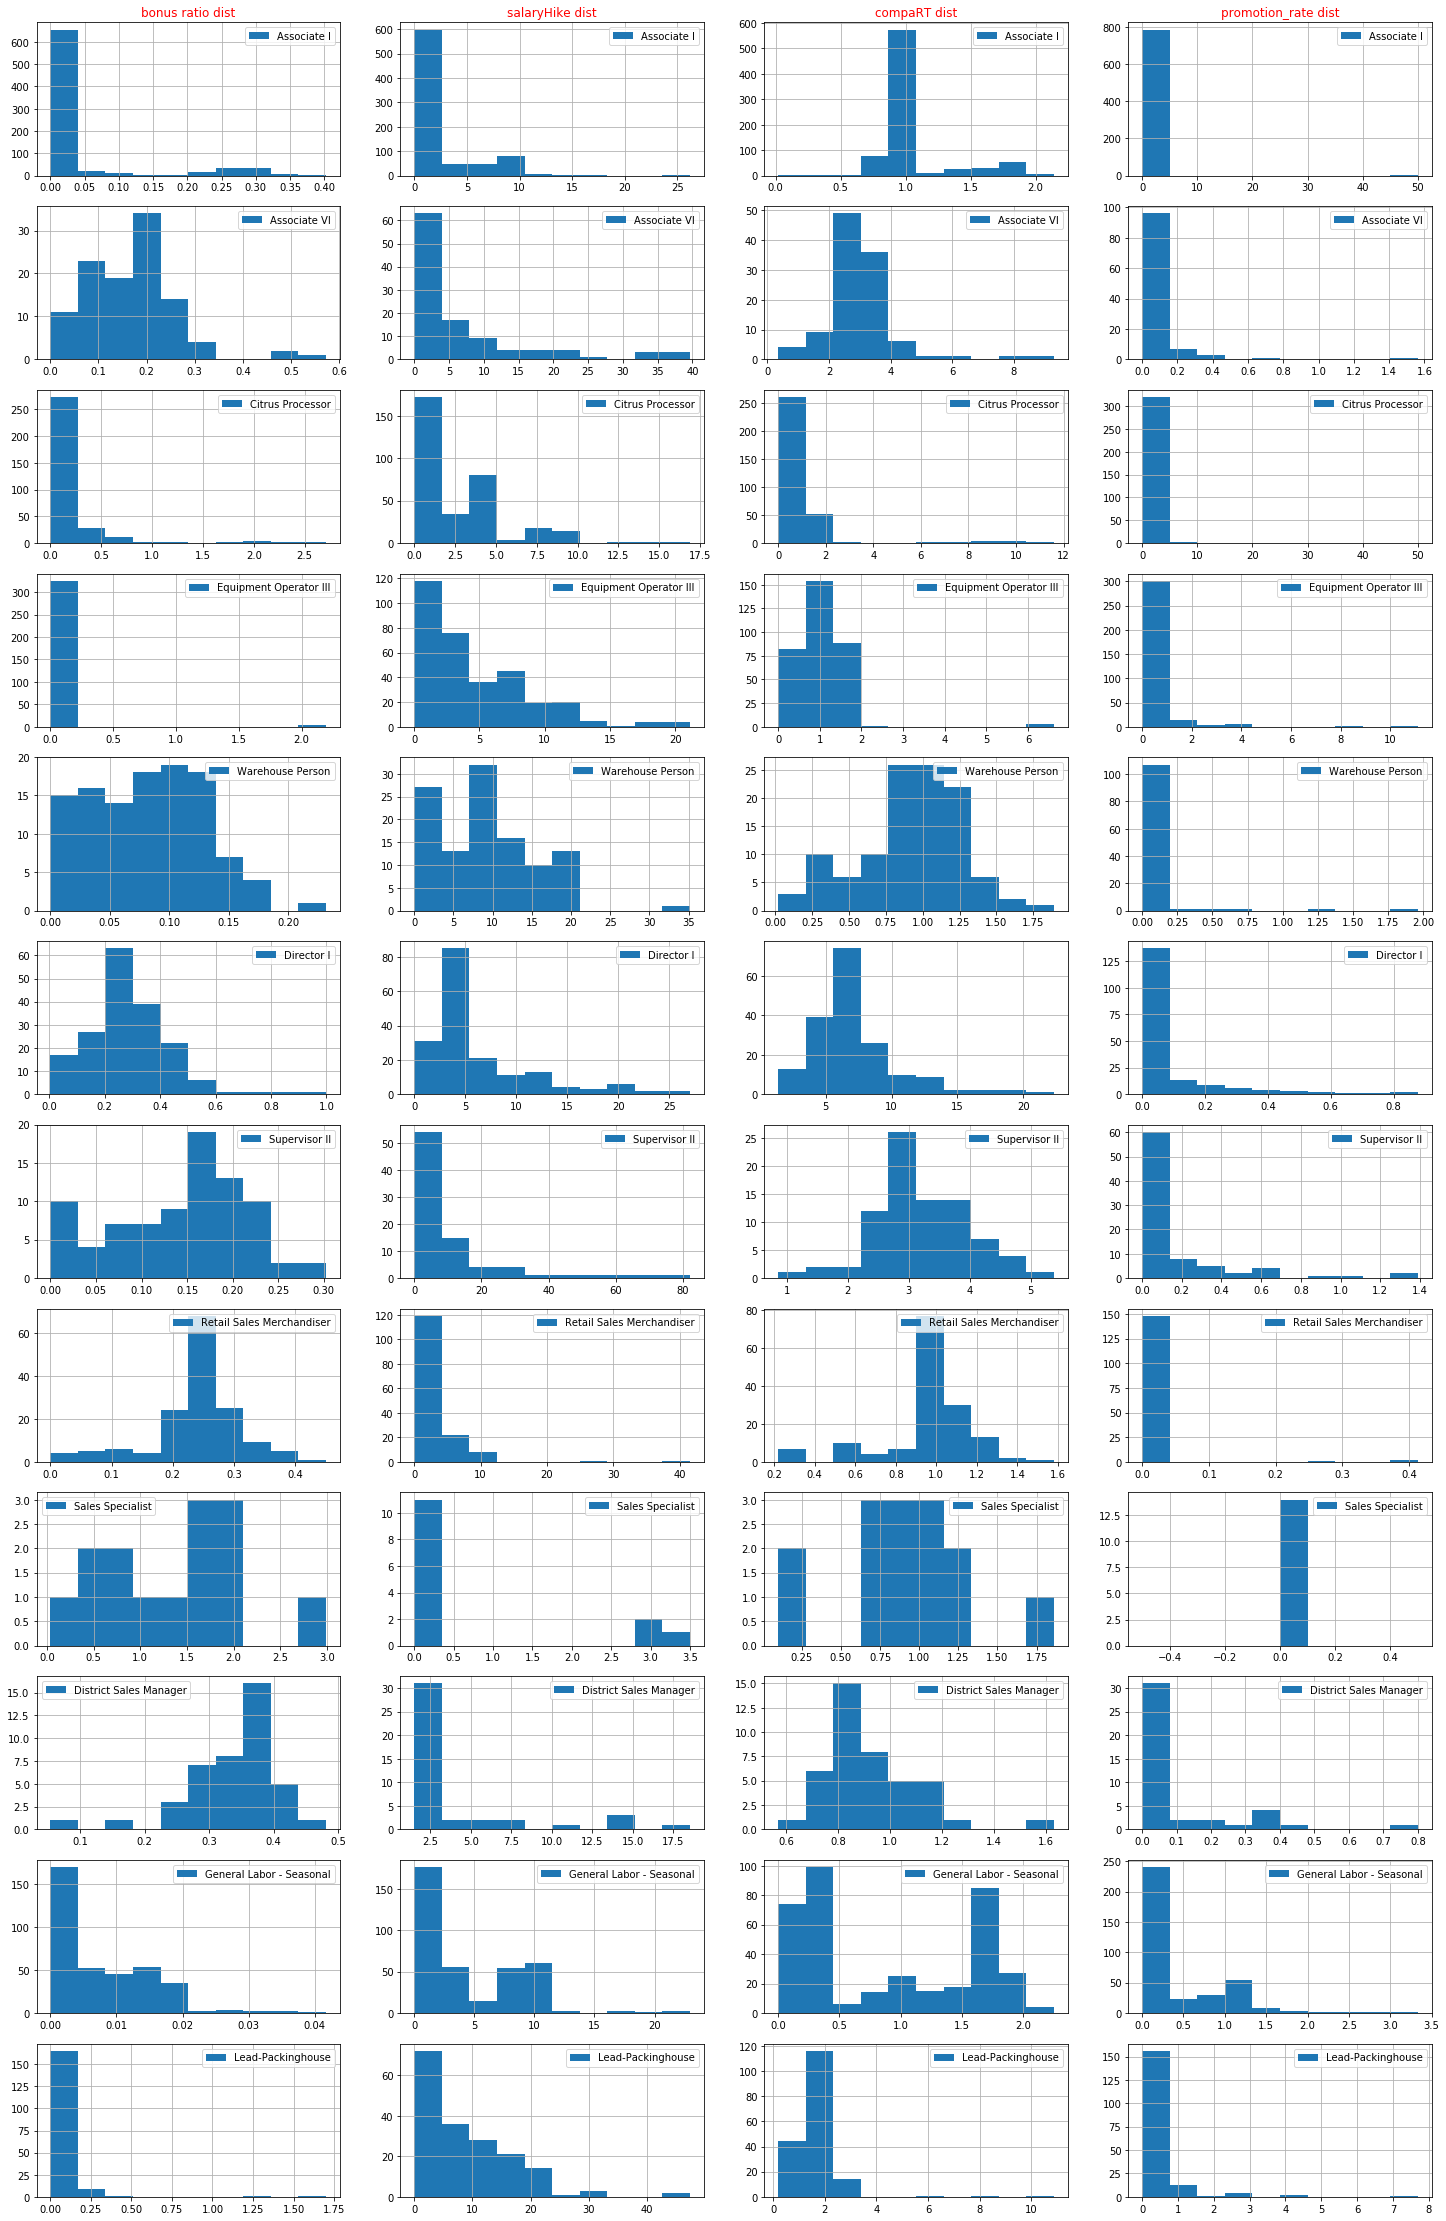

In [43]:
getdistribution(dataInJob=data_10,lis_jobs=lis_jobs)

In [29]:
dataframe_quantile = get_quantile(data_10,2017,0.90,0.90,0.90,0.90)

NameError: name 'data_10' is not defined

In [43]:
dataframe_quantile.head()

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions,promotion_rate,Bonus_quantile,SalaryHike_quantile,CompaRT_quantile,PromotionRate_quantile
0,G3AMKMQ4X429D89D,G356ZSFXAP9B0ZTD,2017,0.000000,0.00,1.13,Associate III,0.61,0.0,0.0,0.173177,9.526667,1.95,0.0
1,G3AMKMQ4X429D89D,G3M6AMT0CP4ABBDQ,2017,0.000000,0.00,1.08,Associate III,0.07,0.0,0.0,0.173177,9.526667,1.95,0.0
2,G3AMKMQ4X429D89D,G36HAENS1W9STGTV,2017,0.000000,0.00,1.13,Associate III,0.10,0.0,0.0,0.173177,9.526667,1.95,0.0
3,G3AMKMQ4X429D89D,G309SQZ7G9HB41NT,2017,0.000000,1.39,1.00,Associate III,1.02,0.0,0.0,0.173177,9.526667,1.95,0.0
4,G3AMKMQ4X429D89D,G39D8PHG4JRJMWV7,2017,0.123788,1.30,0.39,Associate III,3.43,0.0,0.0,0.173177,9.526667,1.95,0.0


In [44]:
get_high_performer(dataframe_quantile,data_10,2017)

number of high performer in all Dimension:- 82
number of high performer in Salary and Bonus:- 216
number of high performer in Salary and Compa:- 267
number of high performer in Bonus and Compa:- 391
number of high performer in only Bonus:- 1041
number of high performer in only SalaryHike:- 1247
number of high performer in only CompaRT:- 1050
number of high performer in only Promotion:- 1923


,job_dsc,total_employee,IsHighPerformerBonus,IsHighPerformerSalaryHike,IsHighPerformerCompaRT,IsHighPerformerPromotion,IsHighPerformerAll,IsHighPerformerSalBonus,IsHighPerformerSalCompa,IsHighPerformerBonusCompa,Bonuspercentage,Salarypercentage,CompaRTpercentage,Promotionpercentage,ALLDimension,SalBonus,SalCompa,BonusCompa
0,Admin II,35,4,4,4,2,1,1,2,1,11.428571,11.428571,11.428571,5.714286,2.857143,2.857143,5.714286,2.857143
1,Admin Support Representative,92,10,10,11,82,1,3,2,2,10.869565,10.869565,11.956522,89.130435,1.086957,3.260870,2.173913,2.173913
2,Associate I,786,79,92,79,176,50,67,60,60,10.050891,11.704835,10.050891,22.391858,6.361323,8.524173,7.633588,7.633588
3,Associate II,1034,104,106,104,300,10,22,28,60,10.058027,10.251451,10.058027,29.013540,0.967118,2.127660,2.707930,5.802708
4,Associate III,600,60,61,63,200,5,14,11,35,10.000000,10.166667,10.500000,33.333333,0.833333,2.333333,1.833333,5.833333


In [153]:
def getMostIMPFeature(data,dataframe_quantile,joblist,year):
    '''based of 90th percentile'''
    temp = pd.merge(data[data['year']==year].groupby('job_dsc').aoid.nunique().to_frame(name='total_employee').reset_index(),dataframe_quantile[dataframe_quantile['IsHighPerformerBonus'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerBonus').reset_index(), on='job_dsc' )
    temp = pd.merge(temp,dataframe_quantile[dataframe_quantile['IsHighPerformerSalaryHike'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerSalaryHike').reset_index(), on='job_dsc')
    temp = pd.merge(temp,dataframe_quantile[dataframe_quantile['IsHighPerformerCompaRT'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerCompaRT').reset_index(), on='job_dsc')
    temp = pd.merge(temp,dataframe_quantile[dataframe_quantile['IsHighPerformerPromotion'].notnull()].groupby('job_dsc').aoid.nunique().to_frame(name='IsHighPerformerPromotion').reset_index(), on='job_dsc')
    temp['Bonuspercentage'] = (temp['IsHighPerformerBonus']/temp['total_employee'])*100
    temp['Salarypercentage'] = (temp['IsHighPerformerSalaryHike']/temp['total_employee'])*100
    temp['CompaRTpercentage'] = (temp['IsHighPerformerCompaRT']/temp['total_employee'])*100
    temp['Promotionpercentage'] = (temp['IsHighPerformerPromotion']/temp['total_employee'])*100
    for job in joblist:
        bonus_perc = temp[temp['job_dsc']==job].Bonuspercentage.values[0]
        sal_perc = temp[temp['job_dsc']==job].Salarypercentage.values[0]
        comprt_perc = temp[temp['job_dsc']==job].CompaRTpercentage.values[0]
        promo_perc = temp[temp['job_dsc']==job].Promotionpercentage.values[0]
        impfeature = []
        if(bonus_perc<=20):
            impfeature.append("bonus_ratio")
        if(sal_perc<=20):
            impfeature.append("salary_hike")
        if(comprt_perc<=20):
            impfeature.append("compa_rt")
        if(promo_perc<=20):
            impfeature.append("promotion_rate")
        print(job,impfeature)

In [155]:
##getMostIMPFeature(data_10,dataframe_quantile,lis_jobs,2017)

In [56]:
def getmostimpfeature(dataframe,joblist):
    '''this will give us most imp feature based on std and mad'''
    df_out = pd.DataFrame(['job_dsc', 'aoid', 'bonus_ratio', 'compa_rt', 'salary_hike', 'tenure',
       'bonus_ratio_quantile', 'compa_rt_quantile', 'salary_hike_quantile',
       'IsHighPerformerAll'])
    for job in joblist:
        df = pd.DataFrame([])
        ##print(job)
        scaler = MinMaxScaler()
        temp = dataframe[dataframe['job_dsc']==job][['bonus_ratio','salary_hike','compa_rt','promotion_rate']]
        mean_bonus = temp.bonus_ratio.mean()
        mean_salary = temp.salary_hike.mean()
        mean_compa_rt = temp.compa_rt.mean()
        mean_promotion_rate = temp.promotion_rate.mean()
        median_bonus = temp.bonus_ratio.median()
        median_salary = temp.salary_hike.median()
        median_compa_rt = temp.compa_rt.median()
        median_promotion_rate = temp.promotion_rate.median()
        temp[['bonus_ratio','salary_hike','compa_rt','promotion_rate']] = scaler.fit_transform(temp)
        bonus_median = np.median(temp.bonus_ratio)
        salary_median = np.median(temp.salary_hike)
        compart_median = np.median(temp.compa_rt)
        promo_median = np.median(temp.promotion_rate)
        feature = ['bonus_ratio','salary_hike','compa_rt','promotion_rate']
        stdfeature = {}
        madfeature= {}
        feature = []

        if(bonus_median==0.0 or salary_median==0.0 or compart_median==0.0):
            print(job,'--using Standard Deviation important feature:-')
            if(np.std(temp.bonus_ratio)>=0.10):
                stdfeature.update({'bonus_ratio':np.std(temp.bonus_ratio)})
            if(np.std(temp.salary_hike)>=0.10):
                stdfeature.update({'salary_hike':np.std(temp.salary_hike)})
            if(np.std(temp.compa_rt)>=0.10):
                stdfeature.update({'compa_rt':np.std(temp.compa_rt)})
            if(np.std(temp.promotion_rate)>=0.10):
                stdfeature.update({'promotion_rate':np.std(temp.promotion_rate)})
            print(stdfeature)
#             meanlist = list(stdfeature.values())
#             meanlist = (np.mean(meanlist))
#             stdfeature = {k: v for k, v in stdfeature.items() if v >= meanlist}
            sorted_std = sorted(stdfeature.items(), key=operator.itemgetter(1),reverse=True)
            max = sorted_std[0][1]
            stdfeature = {k: v for k, v in stdfeature.items() if (max-v)<=0.03}
            sorted_std = sorted(stdfeature.items(), key=operator.itemgetter(1),reverse=True)
            ##print(sorted_std)
            [feature.append(i[0]) for i in sorted_std]
        else:
            print(job,'--using MAD important feature:-')
#             print(np.median(abs(temp.bonus_ratio-bonus_median)))
#             print(np.median(abs(temp.salary_hike-salary_median)))
#             print(np.median(abs(temp.compa_rt-compart_median)))
#             print(np.median(abs(temp.promotion_rate-promo_median)))
            if(np.median(abs(temp.bonus_ratio-bonus_median))>=0.01):
                madfeature.update({'bonus_ratio':np.median(abs(temp.bonus_ratio-bonus_median))})
            if(np.median(abs(temp.salary_hike-salary_median))>=0.01):
                madfeature.update({'salary_hike':np.median(abs(temp.salary_hike-salary_median))})
            if(np.median(abs(temp.compa_rt-compart_median))>=0.01):
                madfeature.update({'compa_rt':np.median(abs(temp.compa_rt-compart_median))})
            if(np.median(abs(temp.promotion_rate-promo_median))>=0.01):
                madfeature.update({'promotion_rate':np.median(abs(temp.promotion_rate-promo_median))})
            print(madfeature)
            sorted_mad = sorted(madfeature.items(), key=operator.itemgetter(1),reverse=True)
            max_mad = sorted_mad[0][1]
            madfeature = {k: v for k, v in madfeature.items() if (max_mad-v)<=0.04}
            sorted_mad = sorted(madfeature.items(), key=operator.itemgetter(1),reverse=True)
            ##median = madfeature.values()
#             print(madfeature)
#             madlist = list(madfeature.values())
#             madmedian = (np.median(madlist))
#             madfeature = {k: v for k, v in madfeature.items() if v >= madmedian}
            ##print(madfeature)
            ##print(madfeature)
            ##sorted_mad = sorted(madfeature.items(), key=operator.itemgetter(1),reverse=True)
            ##print(np.median(abs(temp.bonus_ratio-bonus_median)),np.median(abs(temp.bonus_ratio-salary_median)),np.median(abs(temp.bonus_ratio-compart_median)),np.median(abs(temp.bonus_ratio-promo_median)))     
            [feature.append(i[0]) for i in sorted_mad]
        ##print('most imp features:-',feature) 
        print('most importtant feature :-',feature)
        temp = temp[feature]
        temp['job_dsc'] = job
        temp['aoid'] = dataframe[dataframe['job_dsc']==job]['aoid']
        temp.drop(feature,axis=1,inplace=True)
#         ##eps = getbesteps(temp)
#         clf = LocalOutlierFactor(contamination=0.15)
#         y_pred = clf.fit_predict(temp)
#         print(job,feature)
#         print(Counter(y_pred),temp.shape[0])
#         ##print(clf.negative_outlier_factor_)
#         temp['label'] = y_pred
#         temp['job_dsc'] = job
#         ### commenting the DBSCAN Algorithm
#         ##print(eps)
# #         modelDBScan = DBSCAN(eps=eps,min_samples=10).fit(temp)
# #         ##print(Counter(modelDBScan.labels_),temp.shape[0])
# #         temp['label'] = modelDBScan.labels_
# #         temp['job_dsc'] = job
#         temp.drop(feature,axis=1,inplace=True)
#         if(bonus_median==0.0 or salary_median==0.0 or compart_median==0.0):
#             temp['bonus_mean'] = mean_bonus
#             temp['salary_mean'] = mean_salary
#             temp['compart_mean'] = mean_salary
#             temp['promotion_mean'] = mean_promotion_rate
#         else:
#             temp['bonus_median'] = bonus_median
#             temp['salary_median'] = salary_median
#             temp['compart_median'] = compart_median
#             temp['promotion_median'] = median_promotion_rate
#         temp['aoid'] = dataframe[dataframe['job_dsc']==job]['aoid']
        ##print(feature)
        feature.extend(['job_dsc','aoid','tenure'])
        temp = pd.merge(temp,dataframe[feature],on=['job_dsc','aoid'])
        ##print(feature)
        for i in range(len(feature)-3):
            temp[feature[i]+'_quantile'] = temp[feature[i]].quantile(0.90)
        ##print(Counter(modelDBScan.labels_),)
        df = df.append(temp,ignore_index=True)
        ##print(df.head())
        ##dataframe_quantile['IsHighPerformerAll'] = np.where((dataframe_quantile['bonus_ratio'] >= dataframe_quantile['Bonus_quantile']) & (dataframe_quantile['salary_hike'] >= dataframe_quantile['SalaryHike_quantile']) &(dataframe_quantile['compa_rt']>=dataframe_quantile['CompaRT_quantile']) &(dataframe_quantile['promotion_rate'] >= dataframe_quantile['PromotionRate_quantile']),dataframe_quantile['aoid'],np.NaN)
        if((len(feature)-3==1) and feature[0]=='promotion_rate'):
            print('only promotion')
            df['IsHighPerformerAll'] = np.where((df[feature[0]]>=df[feature[0]+'_quantile']) &(df['tenure']>=1.0),'High','Low')
        elif((len(feature)-3==1)):
##            print('for 1')
            df['IsHighPerformerAll'] = np.where((df[feature[0]]>=df[feature[0]+'_quantile']),'High','Low')
        elif(len(feature)-3==2):
            ##print('for 2')
            ##print(feature[0],feature[0]+'_quantile',feature[1],feature[1]+'_quantile')
            df['IsHighPerformerAll'] = np.where((df[feature[0]]>=df[feature[0]+'_quantile']) & (df[feature[1]]>=df[feature[1]+'_quantile']),'High','Low')
        elif(len(feature)-3==3):
            ##print('for 3')
            df['IsHighPerformerAll'] = np.where((df[feature[0]]>=df[feature[0]+'_quantile']) & (df[feature[1]]>=df[feature[1]+'_quantile']) & (df[feature[2]]>=df[feature[2]+'_quantile']),'High','Low')    
        elif(len(feature)-3==4):
            ##print('for 4')
            df['IsHighPerformerAll'] = np.where((df[feature[0]]>=df[feature[0]+'_quantile']) & (df[feature[1]]>=df[feature[1]+'_quantile']) & (df[feature[2]]>=df[feature[2]+'_quantile']) & (df[feature[3]]>=df[feature[3]+'_quantile']),'High','Low')        
        ##['bonus_ratio', 'compa_rt', 'salary_hike']
        ##['promotion_rate', 'salary_hike', 'bonus_ratio', 'compa_rt']
        ##temp = pd.merge()
        ##print(temp[temp['label']==-1])
        ##print(temp.head)
        df_out = df_out.append(df,ignore_index=True)
        print('highperformer:-',df[(df['IsHighPerformerAll']=='High') &(df['job_dsc']==job)].shape[0],df[df['job_dsc']==job].shape[0])
        
        #del(df)
        print('----------------------------------------------------------------------------')
    return df_out    

In [38]:
## to find the best eps in dbscan pass the data for any perticualr job
def getbesteps(dataframe):
    A = []
    B = []
    C = []
    for i in np.linspace(0.1,5,30):
        dbscan = DBSCAN(eps=i,min_samples=10).fit(dataframe)
        labels = dbscan.labels_
        n_clusetr = len(set(labels)) - (1 if -1 in labels else 0)
        sum = 0;
    ##    print(i,':-',metrics.silhouette_score(dataframe,labels))
        for l in labels:
            if(l==-1):
                sum = sum+1
        C.append(sum)        
        A.append(i)
        B.append(int(n_clusetr))
    results = pd.DataFrame([A,B,C]).T
    results.columns = ['distance','Number of clusters','Number of outliers']
   ## results.plot(x='distance',y='Number of clusters',figsize=(10,6)) 
    ##print(A,B)
    ##print(results)
    for i in range(len(B)):
        flag = False
        for j in range(i+1,len(B)):
            if(B[i]==B[j]):
                flag = True
                continue
            else:
                flag= False
                break
        if(flag==True):
            ##print(B[i],i)
            return(A[i])
            break        

In [59]:
df_outlier=getmostimpfeature(data_10,lis_jobs)

Associate I --using Standard Deviation important feature:-
{'bonus_ratio': 0.22700223684329965, 'salary_hike': 0.12165376242683475, 'compa_rt': 0.13617119903077368}
most importtant feature :- ['bonus_ratio']
highperformer:- 79 786
----------------------------------------------------------------------------
Associate VI --using MAD important feature:-
{'bonus_ratio': 0.10106139949469849, 'salary_hike': 0.04823759379532126, 'compa_rt': 0.050279329608938536}
most importtant feature :- ['bonus_ratio']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\range.py:433: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


highperformer:- 11 108
----------------------------------------------------------------------------
Citrus Processor --using MAD important feature:-
{'bonus_ratio': 0.023124588205838348, 'salary_hike': 0.025671406003139812, 'compa_rt': 0.03192407247627266}
most importtant feature :- ['compa_rt', 'salary_hike', 'bonus_ratio']
highperformer:- 0 325
----------------------------------------------------------------------------
Equipment Operator III --using MAD important feature:-
{'bonus_ratio': 0.016070230017369253, 'salary_hike': 0.15084151196239803, 'compa_rt': 0.04833836858006044}
most importtant feature :- ['salary_hike']
highperformer:- 33 328
----------------------------------------------------------------------------
Warehouse Person --using MAD important feature:-
{'bonus_ratio': 0.1640423268251845, 'salary_hike': 0.15802936996699007, 'compa_rt': 0.106951871657754}
most importtant feature :- ['bonus_ratio', 'salary_hike']
highperformer:- 3 112
-------------------------------------

In [63]:
df_outlier[(df_outlier['job_dsc']=='Associate VI') & (df_outlier['IsHighPerformerAll']=='High')]

,0,job_dsc,aoid,bonus_ratio,tenure,bonus_ratio_quantile,IsHighPerformerAll,compa_rt,salary_hike,compa_rt_quantile,salary_hike_quantile
797,NaN,Associate VI,G3WEB3CDS47RN49R,0.250200,31.37,0.249574,High,NaN,NaN,NaN,NaN
803,NaN,Associate VI,G3WEB3CDS47REVY9,0.283976,15.31,0.249574,High,NaN,NaN,NaN,NaN
849,NaN,Associate VI,G3WEB3CDS47RJXN8,0.293728,18.26,0.249574,High,NaN,NaN,NaN,NaN
877,NaN,Associate VI,G39D8PHG4JRJ9BZ2,0.252351,20.37,0.249574,High,NaN,NaN,NaN,NaN
880,NaN,Associate VI,G37N1CBMZ78V3R6D,0.342381,4.36,0.249574,High,NaN,NaN,NaN,NaN
881,NaN,Associate VI,G37N1CBMZ78VZ242,0.509997,7.98,0.249574,High,NaN,NaN,NaN,NaN
883,NaN,Associate VI,G37N1CBMZ78VD6S7,0.252724,19.29,0.249574,High,NaN,NaN,NaN,NaN
887,NaN,Associate VI,G38TPKXJZHDDGQ8Q,0.313595,14.41,0.249574,High,NaN,NaN,NaN,NaN
891,NaN,Associate VI,G37N1CBMZ78VP8YT,0.512128,4.84,0.249574,High,NaN,NaN,NaN,NaN
893,NaN,Associate VI,G3WEB3CDS47R07MK,0.306987,12.65,0.249574,High,NaN,NaN,NaN,NaN


In [263]:
tempe = data_10[(data_10['job_dsc']=='Associate I')][['bonus_ratio','salary_hike','compa_rt']]
tempe[['bonus_ratio','salary_hike','compa_rt']] = scaler.fit_transform(tempe)
tempe.head()
tempe['zscore_bonus'] = temp['bonus_ratio']- np.mean(temp['bonus_ratio'])/np.std(temp['bonus_ratio'])
# tempe['zscore_salary'] = (temp['salary_hike']- np.mean(temp['salary_hike']))/np.std(temp['salary_hike'])
# tempe['zscore_compa'] = (temp['compa_rt']- np.mean(temp['compa_rt']))/np.std(temp['compa_rt'])
# tempe['zscore_promotion'] = (temp['promotion_rate']- np.mean(temp['promotion_rate']))/np.std(temp['promotion_rate'])
# tempe['rank'] = (4*tempe['zscore_bonus'])+(3*tempe['zscore_salary'])+(2*tempe['zscore_compa'])+(1*tempe['zscore_promotion'])/(4+3+2+1)

In [280]:
data_10[(data_10['job_dsc']=='Associate I')]

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions,promotion_rate
751,G3AMKMQ4X429D89D,G382NC1GMNDFBCKH,2017,0.000000,0.000,0.92,Associate I,0.36,0.0,0.000000
752,G3AMKMQ4X429D89D,G38TPKXJZHDD1ESZ,2017,0.266927,7.870,1.73,Associate I,5.82,0.0,0.000000
753,G3AMKMQ4X429D89D,G3MJNKFG8RCXK1SZ,2017,0.000000,0.000,0.84,Associate I,0.12,0.0,0.000000
754,G3AMKMQ4X429D89D,G3ZYP4DZFTYQ87PD,2017,0.000000,0.000,1.04,Associate I,0.31,1.0,3.225806
755,G3AMKMQ4X429D89D,G3TV88RCYZDTKT9H,2017,0.000000,12.500,0.96,Associate I,0.27,0.0,0.000000
756,G3AMKMQ4X429D89D,G3Y8CQBAYVWRACA6,2017,0.000000,0.000,0.92,Associate I,0.11,0.0,0.000000
757,G3AMKMQ4X429D89D,G31KKHAYCAF4ABF1,2017,0.000000,0.000,0.96,Associate I,0.19,0.0,0.000000
758,G3AMKMQ4X429D89D,G38H3D6ZQ6JQNSWT,2017,0.000000,0.000,0.84,Associate I,0.13,0.0,0.000000
759,G3AMKMQ4X429D89D,G3FRNNJ4ZKZ8SB3R,2017,0.000000,0.000,0.92,Associate I,0.03,0.0,0.000000
760,G3AMKMQ4X429D89D,G32B0MWKS1RFE5BX,2017,0.000000,0.000,1.04,Associate I,0.49,0.0,0.000000


In [274]:
##tempe[tempe['rank']>=8.8]
##tempe.head()
tempe['zscore_bonus'] = temp['bonus_ratio'].apply(lambda x:np.abs(x-np.mean(temp['bonus_ratio']))/np.mean(temp['bonus_ratio']))

In [278]:
np.abs(temp['bonus_ratio']- np.mean(temp['bonus_ratio']))/np.std(temp['bonus_ratio'])

5793    1.274103
5794    1.831914
5795    0.274015
5796    0.192407
5797    2.875196
5798    0.857462
5799    0.421571
5800    1.155657
5801    0.248075
5802    0.731853
5803    0.064405
5804    0.481415
5805    0.078266
5806    0.075409
5807    0.293596
5808    0.952907
5809    0.009745
5810    1.663021
5811    0.018835
5812    1.472205
5813    0.007321
5814    0.040344
5815    0.794740
5816    0.709034
5817    0.729968
5818    0.030573
5819    0.455797
5820    0.328424
5821    0.752278
5822    0.466085
5823    1.751726
5824    0.864096
5825    0.063537
5826    1.270289
5827    0.153775
5828    1.350322
5829    0.138840
5830    1.609938
5831    0.576864
5832    0.275018
5833    0.791656
5834    0.510115
5835    0.292459
5836    0.615304
5837    1.822588
5838    0.426388
5839    0.849512
5840    2.287826
5841    0.778095
5842    2.639492
5843    0.611335
5844    0.433194
5845    0.008394
5846    1.256404
5847    0.140314
5848    0.100952
Name: bonus_ratio, dtype: float64

In [237]:
scaler = MinMaxScaler()
temp = data_10[data_10['job_dsc']=='Vice President'][['bonus_ratio','salary_hike','compa_rt','promotion_rate']]
temp[['bonus_ratio','salary_hike','compa_rt','promotion_rate']] = scaler.fit_transform(temp)
print(temp.bonus_ratio.std()/temp.bonus_ratio.mean())               
print(temp.salary_hike.std()/temp.salary_hike.mean())               
print(temp.compa_rt.std()/temp.compa_rt.mean())               
print(temp.promotion_rate.std()/temp.promotion_rate.mean())

0.5508173714056772
3.172387716181689
1.0131983911925295
1.7471340746850266


In [48]:
df_outlier.head()
##pd.merge(df_outlier.groupby('job_dsc').aoid.nunique().to_frame(name='totalHeadcount').reset_index(),df_outlier[df_outlier['IsHighPerformerAll']=='High'].groupby('job_dsc').aoid.count().to_frame(name='HighPerformer').reset_index(),how='left')[pd.merge(df_outlier.groupby('job_dsc').aoid.nunique().to_frame(name='totalHeadcount').reset_index(),df_outlier[df_outlier['IsHighPerformerAll']=='High'].groupby('job_dsc').aoid.count().to_frame(name='HighPerformer').reset_index(),how='left')['HighPerformer'].isnull()]

NameError: name 'df_outlier' is not defined

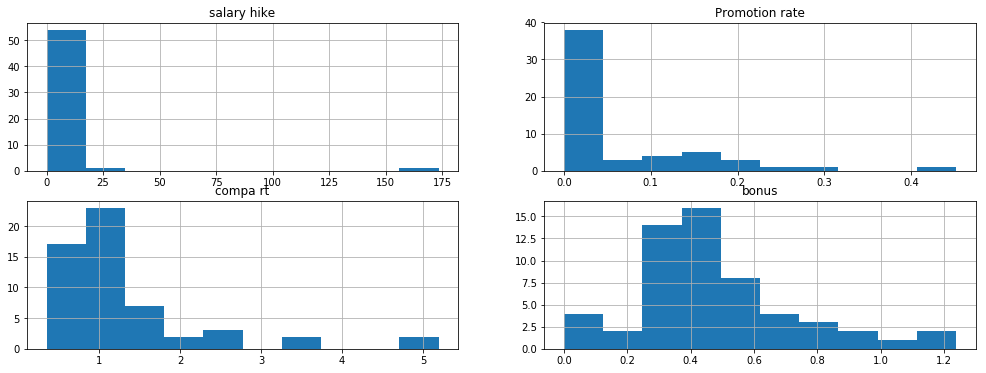

In [224]:
## salary_hike': 0.3422282023413783, 'compa_rt': 0.2272963389448492, 'promotion_rate': 0.35952774390352693}
plt.figure(figsize=(17,6))
plt.subplot(221)
data_10[data_10['job_dsc']=='Vice President'].salary_hike.hist()
plt.title('salary hike')
plt.subplot(222)
data_10[data_10['job_dsc']=='Vice President'].promotion_rate.hist()
plt.title('Promotion rate')
plt.subplot(223)
data_10[data_10['job_dsc']=='Vice President'].compa_rt.hist()
plt.title('compa rt')
plt.subplot(224)
data_10[data_10['job_dsc']=='Vice President'].bonus_ratio.hist()
plt.title('bonus')
plt.show()

jobs with no highperformer:- 0


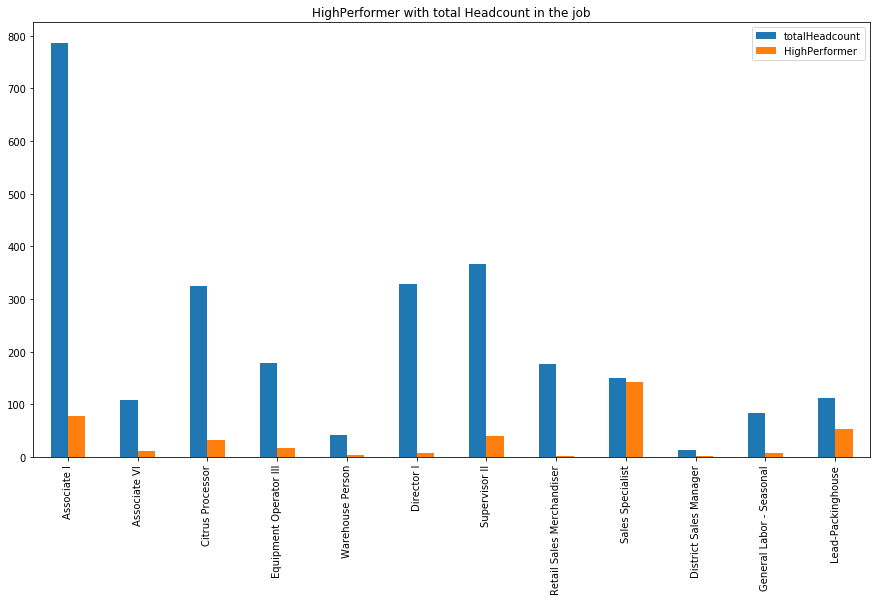

In [217]:
df_outlier.drop(df_outlier.columns[0],axis=1, inplace = True)
##df_outlier[(df_outlier['job_dsc']=='Associate I') & (df_outlier['aoid']=='G38TPKXJZHDD1ESZ')][['IsHighPerformerAll','bonus_ratio','bonus_ratio_quantile','compa_rt','compa_rt_quantile','salary_hike','salary_hike_quantile','promotion_rate','promotion_rate_quantile']]
##df_outlier[df_outlier['IsHighPerformerAll']=='High']
print('jobs with no highperformer:-',pd.merge(df_outlier.groupby('job_dsc').aoid.nunique().to_frame(name='totalHeadcount').reset_index(),df_outlier[df_outlier['IsHighPerformerAll']=='High'].groupby('job_dsc').aoid.count().reset_index(),how='left').aoid.isnull().sum())
ax=pd.merge(df_outlier.groupby('job_dsc').aoid.nunique().to_frame(name='totalHeadcount').reset_index(),df_outlier[df_outlier['IsHighPerformerAll']=='High'].groupby('job_dsc').aoid.count().to_frame(name='HighPerformer').reset_index(),how='left')[['totalHeadcount','HighPerformer']].plot(kind='bar',figsize=(15,8))
plt.title('HighPerformer with total Headcount in the job')
plt.xticks(range(len(lis_jobs)), lis_jobs)
plt.show()
##df_outlier[df_outlier['IsHighPerformerAll']=='High'].groupby('job_dsc').aoid.count().reset_index()
##df_outlier[(df_outlier['job_dsc']=='Citrus Processor') &(df_outlier['salary_hike']>=df_outlier['salary_hike_quantile']) & (df_outlier['bonus_ratio']>=df_outlier['bonus_ratio_quantile']) & (df_outlier['compa_rt']>=df_outlier['compa_rt_quantile'])]

In [182]:
df_outlier[(df_outlier['job_dsc']=='Vice President')  & (df_outlier['promotion_rate']>=df_outlier['promotion_rate_quantile']) & (df_outlier['salary_hike']>=df_outlier['salary_hike_quantile'])].shape

(0, 13)

In [42]:
df_outlier.columns

Index(['job_dsc', 'aoid', 'bonus_ratio', 'tenure', 'bonus_ratio_quantile',
       'IsHighPerformerAll', 'promotion_rate', 'promotion_rate_quantile',
       'salary_hike', 'salary_hike_quantile', 'compa_rt', 'compa_rt_quantile'],
      dtype='object')

In [117]:
df_outlier[(df_outlier['job_dsc']=='Associate I') &(df_outlier['compa_rt']>=df_outlier['compa_rt_quantile']) & (df_outlier['bonus_ratio']>=df_outlier['bonus_ratio_quantile'])].shape

(0, 12)

In [116]:
##dataframe_quantile[(dataframe_quantile['job_dsc']=='Retail Sales Merchandiser') & (dataframe_quantile['IsHighPerformerAll'].notnull())][['aoid','bonus_ratio', 'compa_rt', 'salary_hike','Bonus_quantile','SalaryHike_quantile','CompaRT_quantile']]
dataframe_quantile[dataframe_quantile['IsHighPerformerAll'].notnull()].groupby('job_dsc').aoid.nunique()

job_dsc
Admin II                         1
Admin Support Representative     1
Associate I                     60
Associate II                    14
Associate III                    5
Farming-General Labor            2
General Labor Plastics (POM)     1
Harvest Operator                 3
Harvest QC/Clerk                 3
Maintenance                      2
Operations Manager               1
President                        1
Sales Representative             2
Sales Specialist                 2
Sanitation                       1
Name: aoid, dtype: int64

#### Local Outlier Factor 

In [452]:
scaler = MinMaxScaler()
te = data_10[data_10['job_dsc']=='Citrus Processor'][['aoid','bonus_ratio', 'compa_rt', 'salary_hike']]
te[['bonus_ratio', 'compa_rt', 'salary_hike']] = scaler.fit_transform(te[['bonus_ratio', 'compa_rt', 'salary_hike']])
te2 = te[['bonus_ratio', 'compa_rt', 'salary_hike']]
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(te2)
from collections import Counter
print(Counter(y_pred))
print(clf.negative_outlier_factor_)
te['label'] = y_pred
# print(getbesteps(te))
# modelDBScan = DBSCAN(eps=0.1,min_samples=10).fit(te)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
# # outlier_df = pd.DataFrame(da)
# print(Counter(modelDBScan.labels_),te.shape[0])
# te['label'] = modelDBScan.labels_
# te['job_dsc'] = 'Citrus Processor'
# te['aoid'] = data_10[data_10['job_dsc']=='Citrus Processor']['aoid']
# ##print(te[te['label']==-1])
# print(pd.merge(te,dataframe_quantile[dataframe_quantile['job_dsc']=='Citrus Processor'],on='aoid',how='inner').shape)

Counter({1: 359, -1: 40})
[-1.08542646 -0.98298034 -1.8984762  -0.98588558 -2.31245654 -0.98822925
 -1.05244788 -3.74099079 -1.0592045  -1.0347309  -0.99880102 -1.05278321
 -1.45994345 -1.00467007 -1.05244788 -1.00080547 -0.99673073 -0.99885016
 -0.97212176 -2.86974678 -0.99877309 -1.08520325 -1.54244287 -1.01855237
 -0.9779971  -1.0000622  -4.04547388 -2.73283068 -1.00223043 -1.66165493
 -1.05055973 -1.13424672 -1.881066   -1.02987019 -0.98280227 -0.9668322
 -1.04862013 -0.97048976 -0.99630288 -1.16806343 -0.99409648 -1.02560931
 -0.99377294 -2.25886699 -1.22180876 -1.05300929 -2.51460622 -0.97212176
 -0.99630288 -0.99396728 -1.03897694 -1.09320804 -1.09271756 -1.01485449
 -0.99045489 -1.07049044 -1.1043336  -2.36561007 -1.012096   -2.59353789
 -1.02314305 -1.00865614 -1.56419297 -0.99943273 -1.13048423 -1.41457261
 -0.99881175 -1.02314305 -3.45835703 -0.97954732 -6.10946791 -0.98867681
 -0.95535123 -1.00857121 -0.97334261 -1.03559079 -2.75970343 -0.9779971
 -3.14223032 -1.331255   -0

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [461]:
te[(te['label']==-1)]

,aoid,bonus_ratio,compa_rt,salary_hike,label
4303,G3MXY93F5T1ME61N,0.022992,0.093184,0.787915,-1
4306,G3TP19G0WXABTZDH,0.656752,0.688525,0.180687,-1
4318,G3TD5JGZNVBSHM0J,0.024346,0.031924,0.090344,-1
4325,G3VK4J1RQY4RB5J2,0.000000,0.023296,0.327014,-1
4326,G3TD5JGZNVBS85M2,0.034899,0.102675,0.038507,-1
4342,G3TYE35V55M2ZZC5,0.035947,0.035375,0.000000,-1
4345,G3TD5JGZNVBSNMC3,0.027463,0.033650,0.090344,-1
4356,G3TD5JGZNVBS7RB9,0.002928,0.011217,0.180687,-1
4358,G3YMWZ6DVB4ZG94W,0.000119,0.125971,0.000000,-1
4367,G3156MDZGPDHTZG1,0.020078,0.033650,0.090344,-1


In [118]:
from sklearn.datasets import make_classification
X, y = make_classification()

### take some jobs like Director I,  Associate I	, Sales Specialist look their distribution of bonus and salary hike plot them we find that when salary hike is high people have low bonus in Director and Associate I 

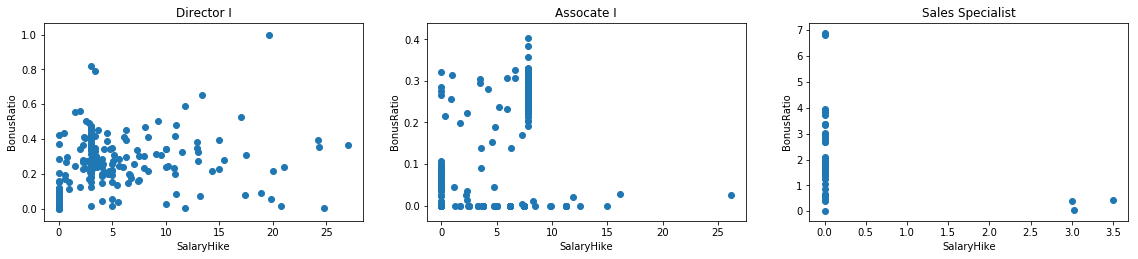

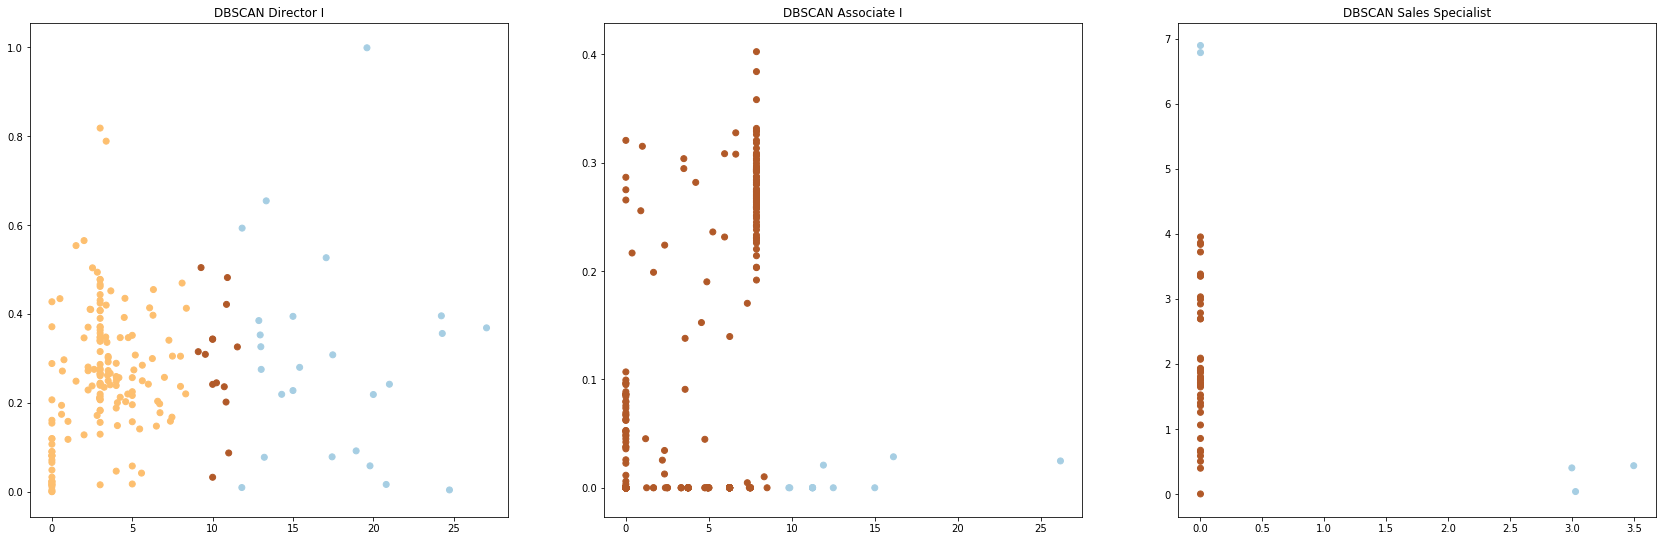

In [36]:
## checking outlier with DBCSCAN only considering bonus ratio and salary hike of these jobs
plt.figure(figsize=(40,8))
plt.subplot(261)
plt.scatter(x=data_10[data_10['job_dsc']=='Director I']['salary_hike'],y=data_10[data_10['job_dsc']=='Director I']['bonus_ratio'])
plt.xlabel('SalaryHike')
plt.ylabel('BonusRatio')
plt.title('Director I')
plt.subplot(262)
plt.scatter(x=data_10[data_10['job_dsc']=='Associate I']['salary_hike'],y=data_10[data_10['job_dsc']=='Associate I']['bonus_ratio'])
plt.xlabel('SalaryHike')
plt.ylabel('BonusRatio')
plt.title('Assocate I')
plt.subplot(263)
plt.scatter(x=data_10[data_10['job_dsc']=='Sales Specialist']['salary_hike'],y=data_10[data_10['job_dsc']=='Sales Specialist']['bonus_ratio'])
plt.xlabel('SalaryHike')
plt.ylabel('BonusRatio')
plt.title('Sales Specialist')
data_dbscan = data_10[data_10['job_dsc']=='Director I'][['salary_hike','bonus_ratio']]
da = data_dbscan.iloc[:,0:2]
modelDBScan = DBSCAN(eps=0.9,min_samples=10).fit(da)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
color = modelDBScan.labels_
plt.figure(figsize=(60,20))
plt.subplot(264)
plt.scatter(x=da['salary_hike'],y=da['bonus_ratio'],c=color,cmap='Paired')
plt.title('DBSCAN Director I')
data_dbscan = data_10[data_10['job_dsc']=='Associate I'][['salary_hike','bonus_ratio']]
da = data_dbscan.iloc[:,0:2]
modelDBScan = DBSCAN(eps=1.1,min_samples=10).fit(da)
color = modelDBScan.labels_
plt.subplot(265)
plt.scatter(x=da['salary_hike'],y=da['bonus_ratio'],c=color,cmap='Paired')
plt.title('DBSCAN Associate I')
data_dbscan = data_10[data_10['job_dsc']=='Sales Specialist'][['salary_hike','bonus_ratio']]
da = data_dbscan.iloc[:,0:2]
modelDBScan = DBSCAN(eps=0.8,min_samples=10).fit(da)
color = modelDBScan.labels_
plt.subplot(266)
plt.scatter(x=da['salary_hike'],y=da['bonus_ratio'],c=color,cmap='Paired')
plt.title('DBSCAN Sales Specialist')
plt.show()

In [38]:
## trying with all the job and all the employee and forming a cluster 
## if we see the outlier detected with DBSCAN for Associate I then we only see 2 outlier
## problme with this is it gives lower extreme outlier too
data_dbscan = data_10[['bonus_ratio','salary_hike','compa_rt','promotion_rate']]
da = data_dbscan.iloc[:,0:4]
modelDBScan = DBSCAN(eps=2.1,min_samples=10).fit(da)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
outlier_df = pd.DataFrame(da)
print(Counter(modelDBScan.labels_),data_dbscan.shape[0])
print(outlier_df[modelDBScan.labels_==-1])

Counter({0: 10486, -1: 94}) 10580
       bonus_ratio  salary_hike  compa_rt  promotion_rate
6         6.787681     0.000000      2.46        0.000000
23        6.897837     0.000000      2.33        0.000000
442       0.007692    21.565000      0.97        6.250000
1425      0.000000     0.000000      1.04       50.000000
1500      0.000000     0.000000      1.01       50.000000
1755      0.020673    73.200000      3.65        0.104932
3485      0.000000    19.892500      1.70        3.278689
3966      0.010434    19.046667      1.90       14.285714
3978      0.028556    11.540000      2.68        4.838710
4168      0.034803     1.922500      1.95        6.666667
4427      0.000000     0.000000      0.39       50.000000
4545      0.245940     5.555000      1.37        6.666667
4712      0.071518    46.670000      0.69        0.775194
4730      0.354009   101.620000      4.82        0.268097
4731      0.269819    67.812500      3.34        0.000000
4734      0.288423    73.200000      3

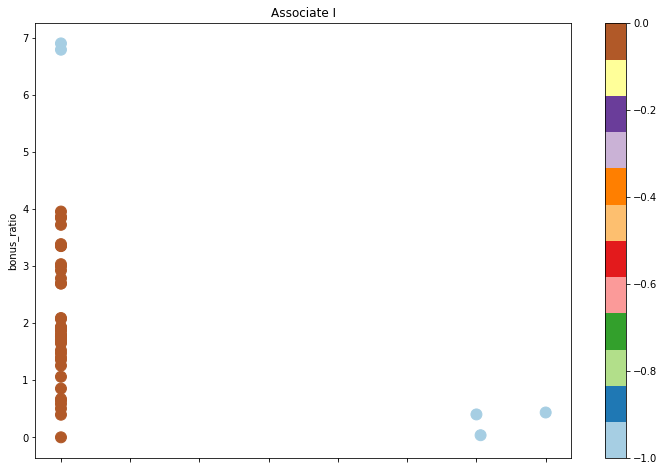

In [39]:
## plot individually
data_dbscan = data_10[data_10['job_dsc']=='Sales Specialist'][['salary_hike','bonus_ratio']]
da = data_dbscan.iloc[:,0:2]
modelDBScan = DBSCAN(eps=0.9,min_samples=10).fit(da)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
color = modelDBScan.labels_
##plt.scatter(da[:,1],da[:,2],c= color,s=120)         
da.plot(kind='scatter',x='salary_hike',y='bonus_ratio',c=color,s=120,figsize=(12,8),cmap='Paired',title='Associate I')

In [40]:
modelDBScan.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1], dtype=int64)

##### outlier using IQR

In [41]:
## check the quantile calculation
data_10[data_10['job_dsc']=='Sales Specialist']['bonus_ratio'].quantile(0.75)+3*(data_10[data_10['job_dsc']=='Sales Specialist']['bonus_ratio'].quantile(0.75)-data_10[data_10['job_dsc']=='Sales Specialist']['bonus_ratio'].quantile(0.25))

7.493908163275002

In [42]:
##data_10.head()
bonus_quant = (data_10.groupby('job_dsc').bonus_ratio.quantile(0.75) + 1.5*(data_10.groupby('job_dsc').bonus_ratio.quantile(0.75)-data_10.groupby('job_dsc').bonus_ratio.quantile(0.25))).reset_index()      
bonus_quant.rename(columns={'bonus_ratio':'bonusceiling'},inplace=True)
df = pd.merge(data_10,bonus_quant,on='job_dsc')
bonus_quant_floor = (data_10.groupby('job_dsc').bonus_ratio.quantile(0.25) - 1.5*(data_10.groupby('job_dsc').bonus_ratio.quantile(0.75)-data_10.groupby('job_dsc').bonus_ratio.quantile(0.25))).reset_index()      
bonus_quant_floor.rename(columns={'bonus_ratio':'bonusfloor'},inplace=True)
df = pd.merge(df,bonus_quant_floor,on='job_dsc')
### salary hike
sal_quant = (data_10.groupby('job_dsc').salary_hike.quantile(0.75) + 1.5*(data_10.groupby('job_dsc').salary_hike.quantile(0.75)-data_10.groupby('job_dsc').salary_hike.quantile(0.25))).reset_index()      
sal_quant.rename(columns={'salary_hike':'salaryceiling'},inplace=True)
df = pd.merge(df,sal_quant,on='job_dsc')
sal_quant_floor = (data_10.groupby('job_dsc').salary_hike.quantile(0.25) - 1.5*(data_10.groupby('job_dsc').salary_hike.quantile(0.75)-data_10.groupby('job_dsc').salary_hike.quantile(0.25))).reset_index()      
sal_quant_floor.rename(columns={'salary_hike':'salaryfloor'},inplace=True)
df = pd.merge(df,sal_quant_floor,on='job_dsc')
##
compa_quant = (data_10.groupby('job_dsc').compa_rt.quantile(0.75) + 1.5*(data_10.groupby('job_dsc').compa_rt.quantile(0.75)-data_10.groupby('job_dsc').compa_rt.quantile(0.25))).reset_index()      
compa_quant.rename(columns={'compa_rt':'compaceiling'},inplace=True)
df = pd.merge(df,compa_quant,on='job_dsc')
compa_quant_floor = (data_10.groupby('job_dsc').compa_rt.quantile(0.25) - 1.5*(data_10.groupby('job_dsc').compa_rt.quantile(0.75)-data_10.groupby('job_dsc').compa_rt.quantile(0.25))).reset_index()      
compa_quant_floor.rename(columns={'compa_rt':'compafloor'},inplace=True)
df = pd.merge(df,compa_quant_floor,on='job_dsc')
##
promo_quant = (data_10.groupby('job_dsc').promotion_rate.quantile(0.75) + 1.5*(data_10.groupby('job_dsc').promotion_rate.quantile(0.75)-data_10.groupby('job_dsc').promotion_rate.quantile(0.25))).reset_index()      
promo_quant.rename(columns={'promotion_rate':'promoceiling'},inplace=True)
df = pd.merge(df,promo_quant,on='job_dsc')
promo_quant_floor = (data_10.groupby('job_dsc').promotion_rate.quantile(0.25) - 1.5*(data_10.groupby('job_dsc').promotion_rate.quantile(0.75)-data_10.groupby('job_dsc').promotion_rate.quantile(0.25))).reset_index()      
promo_quant_floor.rename(columns={'promotion_rate':'promofloor'},inplace=True)
df = pd.merge(df,promo_quant_floor,on='job_dsc')

In [43]:
df['IsHighPerformerAll'] = np.where((df['bonus_ratio'] >= df['bonusceiling']) & (df['salary_hike'] >= df['salaryceiling']) &(df['compa_rt']>=df['compaceiling']) &(df['promotion_rate'] >= df['promoceiling']),df['aoid'],np.NaN)
df['IsHighPerformerBonus'] = np.where(df['bonus_ratio']>=df['bonusceiling'],df['aoid'],np.NaN)
df['IsHighPerformerSalaryHike'] = np.where(df['salary_hike']>=df['salaryceiling'],df['aoid'],np.NaN)
df['IsHighPerformerCompaRT'] = np.where(df['compa_rt']>=df['compaceiling'],df['aoid'],np.NaN)
df['IsHighPerformerPromotion'] = np.where((df['promotion_rate']>=df['promoceiling'])&(df['tenure']>=1.0),df['aoid'],np.NaN)
df['IsHighPerformerSalBonus'] = np.where((df['bonus_ratio'] >= df['bonusceiling']) & (df['salary_hike'] >= df['salaryceiling']),df['aoid'],np.NaN)
df['IsHighPerformerSalCompa'] = np.where((df['salary_hike'] >= df['salaryceiling']) & (df['compa_rt'] >= df['compaceiling']),df['aoid'],np.NaN)
df['IsHighPerformerBonusCompa'] = np.where((df['bonus_ratio'] >= df['bonusceiling']) & (df['compa_rt'] >= df['compaceiling']),df['aoid'],np.NaN)

In [44]:
## DB SCAN outlier based on bonus ratio and salary hike
data_dbscanall = data_10[['bonus_ratio','salary_hike']]
modelDBScanall = DBSCAN(eps=0.8,min_samples=10).fit(data_dbscanall)
print(Counter(modelDBScanall.labels_),data_dbscanall.shape[0])
data_dbscanall['label'] = modelDBScanall.labels_
print(data_dbscanall[data_dbscanall['label']==-1])
##getbesteps(data_dbscanall)

Counter({0: 10478, -1: 78, 1: 15, 2: 9}) 10580
       bonus_ratio  salary_hike  label
6         6.787681     0.000000     -1
23        6.897837     0.000000     -1
1755      0.020673    73.200000     -1
1889      2.194711     1.565000     -1
1979      2.069997     5.000000     -1
2151      2.193626     5.000000     -1
4712      0.071518    46.670000     -1
4730      0.354009   101.620000     -1
4731      0.269819    67.812500     -1
4733      0.274953    44.422500     -1
4734      0.288423    73.200000     -1
4735      0.277803    91.377500     -1
4737      0.350922    64.542500     -1
4738      0.202741    93.382500     -1
4763      0.162239    86.836667     -1
4771      0.321784    67.670000     -1
4776      0.328775    50.137500     -1
4793      0.171898    83.990000     -1
4794      0.325559    44.607500     -1
4803      0.442719    42.977500     -1
5226      0.240760    76.570000     -1
5335      0.011412    46.377500     -1
5387      0.096752    47.370000     -1
5762      0.16611

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
## Sales Specialist where bonus and compa ratio are more of important
# Sales specialist Bonus
print('Sales Specialis best feature Bonus raiot and Compa ratio')
print(' Bonus Ratio with 90th percentile and total number of employee in this job ****************',dataframe_quantile[dataframe_quantile['job_dsc']=='Sales Specialist'].aoid.nunique())
print(dataframe_quantile[(dataframe_quantile['job_dsc']=='Sales Specialist') & (dataframe_quantile['IsHighPerformerBonus'].notnull())][['aoid','bonus_ratio','Bonus_quantile']])
print('with IQR 1.5*******************')
print(df[(df['job_dsc']=='Sales Specialist') & (df['IsHighPerformerBonus'].notnull())][['aoid','bonus_ratio','bonusceiling']])
print('with DB scan taking only one feature***************************')
data_dbscan = data_10[data_10['job_dsc']=='Sales Specialist'][['bonus_ratio']]
data_dbscan
# da = data_dbscan.iloc[:,0:4]
modelDBScan = DBSCAN(eps=0.8,min_samples=10).fit(data_dbscan)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
# outlier_df = pd.DataFrame(da)
print(Counter(modelDBScan.labels_),data_dbscan.shape[0])
data_dbscan['label'] = modelDBScan.labels_
print(data_dbscan[data_dbscan['label']==-1])
# print(outlier_df[modelDBScan.labels_==-1])

Sales Specialis best feature Bonus raiot and Compa ratio
 Bonus Ratio with 90th percentile and total number of employee in this job **************** 47
                aoid  bonus_ratio  Bonus_quantile
0   G3156MDZGPDH0MSR     3.953327        3.767974
6   G3JV4VV5KJFC7GM3     6.787681        3.767974
7   G3TD5JGZNVBSMMKW     3.863808        3.767974
23  G3156MDZGPDHZ0J2     6.897837        3.767974
31  G3TD5JGZNVBSGNWE     3.838167        3.767974
with IQR 1.5*******************
                aoid  bonus_ratio  bonusceiling
6   G3JV4VV5KJFC7GM3     6.787681      5.173395
23  G3156MDZGPDHZ0J2     6.897837      5.173395
with DB scan taking only one feature***************************
Counter({0: 45, -1: 2}) 47
    bonus_ratio  label
6      6.787681     -1
23     6.897837     -1


In [46]:
## Sales Specialist where bonus and compa ratio are more of important
# Compa RT
print('Sales Specialis best feature Bonus raiot and Compa ratio')
print('Compa ratio with 90th percentile and total number of employee in this job ****************',dataframe_quantile[dataframe_quantile['job_dsc']=='Sales Specialist'].aoid.nunique())
print(dataframe_quantile[(dataframe_quantile['job_dsc']=='Sales Specialist') & (dataframe_quantile['IsHighPerformerCompaRT'].notnull())][['aoid','compa_rt','CompaRT_quantile']])
print('with IQR 1.5*******************')
print(df[(df['job_dsc']=='Sales Specialist') & (df['IsHighPerformerCompaRT'].notnull())][['aoid','compa_rt','compaceiling']])
print('with DB scan taking only one feature***************************')
data_dbscan = data_10[data_10['job_dsc']=='Sales Specialist'][['compa_rt']]
data_dbscan
# da = data_dbscan.iloc[:,0:4]
modelDBScan = DBSCAN(eps=0.4,min_samples=5).fit(data_dbscan)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
# outlier_df = pd.DataFrame(da)
print(Counter(modelDBScan.labels_),data_dbscan.shape[0])
data_dbscan['label'] = modelDBScan.labels_
print(data_dbscan[data_dbscan['label']==-1])
# print(outlier_df[modelDBScan.labels_==-1])

Sales Specialis best feature Bonus raiot and Compa ratio
Compa ratio with 90th percentile and total number of employee in this job **************** 47
                aoid  compa_rt  CompaRT_quantile
6   G3JV4VV5KJFC7GM3      2.46             1.864
18  G3TD5JGZNVBSN80T      1.88             1.864
23  G3156MDZGPDHZ0J2      2.33             1.864
30  G3TD5JGZNVBS108V      1.87             1.864
33  G3N7BFQ6J6XEDRXR      1.99             1.864
with IQR 1.5*******************
                aoid  compa_rt  compaceiling
6   G3JV4VV5KJFC7GM3      2.46          2.13
23  G3156MDZGPDHZ0J2      2.33          2.13
with DB scan taking only one feature***************************
Counter({0: 44, -1: 3}) 47
    compa_rt  label
6       2.46     -1
19      0.04     -1
24      0.10     -1


In [47]:
## Associate I has bonus ratio and salary hike boyh as more imp feature 
## here when we take IQR then all the 850 employees are high performer 
print('Associate I best feature Bonus raiot, salary hike, compa ratio, promotion rate')
print('Bonus ratio with 90th percentile and total number of employee in this job ****************',dataframe_quantile[dataframe_quantile['job_dsc']=='Associate I'].aoid.nunique())
print(dataframe_quantile[(dataframe_quantile['job_dsc']=='Associate I') & (dataframe_quantile['IsHighPerformerBonus'].notnull())][['aoid','bonus_ratio','Bonus_quantile']])
print('with IQR 1.5 ****************************')
print(df[(df['job_dsc']=='Associate I') & (df['IsHighPerformerBonus'].notnull())][['aoid','bonus_ratio','bonusceiling']])
print('with DB SCAN  ****************************')
data_dbscan = data_10[data_10['job_dsc']=='Associate I'][['bonus_ratio']]
data_dbscan
# da = data_dbscan.iloc[:,0:4]
modelDBScan = DBSCAN(eps=0.2,min_samples=5).fit(data_dbscan)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
# outlier_df = pd.DataFrame(da)
print(Counter(modelDBScan.labels_),data_dbscan.shape[0])
data_dbscan['label'] = modelDBScan.labels_
print(data_dbscan[data_dbscan['label']==-1])
# print(outlier_df[modelDBScan.labels_==-1])

Associate I best feature Bonus raiot, salary hike, compa ratio, promotion rate
Bonus ratio with 90th percentile and total number of employee in this job **************** 850
                  aoid  bonus_ratio  Bonus_quantile
858   G38TPKXJZHDD1ESZ     0.266927        0.228233
871   G39D8PHG4JRJA33G     0.271767        0.228233
872   G37N1CBMZ78VJMJ2     0.261215        0.228233
876   G38TPKXJZHDDQMX5     0.263737        0.228233
902   G37N1CBMZ78VFNR9     0.268511        0.228233
908   G38TPKXJZHDDFGX7     0.238140        0.228233
909   G39D8PHG4JRJTYSH     0.293805        0.228233
931   G38TPKXJZHDDGKNY     0.296829        0.228233
937   G3WEB3CDS47RZZNK     0.274146        0.228233
958   G39D8PHG4JRJESHM     0.315166        0.228233
962   G3WEB3CDS47RJCJQ     0.269144        0.228233
968   G38TPKXJZHDDS0JT     0.257883        0.228233
982   G37N1CBMZ78VS3WX     0.279989        0.228233
1000  G39D8PHG4JRJXCTA     0.258623        0.228233
1015  G3WEB3CDS47RE3HH     0.287047        0.2

In [48]:
## Associate I has bonus ratio and salary hike boyh as more imp feature 
## here when we take IQR then all the 850 employees are high performer 
print('Associate I best feature Bonus raiot, salary hike, compa ratio, promotion rate')
print('salary hike with 90th percentile and total number of employee in this job ****************',dataframe_quantile[dataframe_quantile['job_dsc']=='Associate I'].aoid.nunique())
print(dataframe_quantile[(dataframe_quantile['job_dsc']=='Associate I') & (dataframe_quantile['IsHighPerformerSalaryHike'].notnull())][['aoid','salary_hike','SalaryHike_quantile']])
print('with IQR 1.5 ****************************')
print(df[(df['job_dsc']=='Associate I') & (df['IsHighPerformerSalaryHike'].notnull())][['aoid','salary_hike','salaryceiling']])
print('with DB SCAN  ****************************')
data_dbscan = data_10[data_10['job_dsc']=='Associate I'][['salary_hike']]
data_dbscan
# da = data_dbscan.iloc[:,0:4]
modelDBScan = DBSCAN(eps=0.9,min_samples=10).fit(data_dbscan)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
# outlier_df = pd.DataFrame(da)
print(Counter(modelDBScan.labels_),data_dbscan.shape[0])
data_dbscan['label'] = modelDBScan.labels_
print(data_dbscan[data_dbscan['label']==-1])
# print(outlier_df[modelDBScan.labels_==-1])

Associate I best feature Bonus raiot, salary hike, compa ratio, promotion rate
salary hike with 90th percentile and total number of employee in this job **************** 850
                  aoid  salary_hike  SalaryHike_quantile
858   G38TPKXJZHDD1ESZ       7.8700                 7.87
861   G3TV88RCYZDTKT9H      12.5000                 7.87
868   G3SW5183VYKV33CQ      11.9050                 7.87
871   G39D8PHG4JRJA33G       7.8700                 7.87
872   G37N1CBMZ78VJMJ2       7.8700                 7.87
876   G38TPKXJZHDDQMX5       7.8700                 7.87
887   G309SQZ7G9HBF2S1      15.0000                 7.87
892   G38TPKXJZHDDXRXJ       7.8700                 7.87
902   G37N1CBMZ78VFNR9       7.8700                 7.87
908   G38TPKXJZHDDFGX7       7.8700                 7.87
909   G39D8PHG4JRJTYSH       7.8700                 7.87
931   G38TPKXJZHDDGKNY       7.8700                 7.87
933   G3B4ZGHGG2V74MGY       9.8225                 7.87
937   G3WEB3CDS47RZZNK      

In [63]:
data_10[data_10['job_dsc']=='Director I']['bonus_ratio'].quantile(0.75)+(data_10[data_10['job_dsc']=='Director I']['bonus_ratio'].quantile(0.75)-data_10[data_10['job_dsc']=='Director I']['bonus_ratio'].quantile(0.25))

0.5273642047279999

In [49]:
## Director I has bonus ratio and salary hike boyh as more imp feature 
## here when we take IQR then all the 850 employees are high performer 
print('Director I best feature Bonus raiot, salary hike, compa ratio, promotion rate')
print('bonus with 90th percentile and total number of employee in this job ****************',dataframe_quantile[dataframe_quantile['job_dsc']=='Director I'].aoid.nunique())
print(dataframe_quantile[(dataframe_quantile['job_dsc']=='Director I') & (dataframe_quantile['IsHighPerformerBonus'].notnull())][['aoid','bonus_ratio','Bonus_quantile']])
print('with IQR 1.5 ****************************')
print(df[(df['job_dsc']=='Director I') & (df['IsHighPerformerBonus'].notnull())][['aoid','bonus_ratio','bonusceiling']])
print('with DB SCAN  ****************************')
data_dbscan = data_10[data_10['job_dsc']=='Director I'][['bonus_ratio']]
data_dbscan
# da = data_dbscan.iloc[:,0:4]
modelDBScan = DBSCAN(eps=0.1,min_samples=10).fit(data_dbscan)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
# outlier_df = pd.DataFrame(da)
print(Counter(modelDBScan.labels_),data_dbscan.shape[0])
data_dbscan['label'] = modelDBScan.labels_
print(data_dbscan[data_dbscan['label']==-1])
# print(outlier_df[modelDBScan.labels_==-1])

Director I best feature Bonus raiot, salary hike, compa ratio, promotion rate
bonus with 90th percentile and total number of employee in this job **************** 850
                  aoid  bonus_ratio  Bonus_quantile
7464  G38TPKXJZHDDN9SX     0.493872         0.43924
7466  G3QZEEGN659MS0QF     0.481805         0.43924
7470  G3WEB3CDS47RV4Q2     0.788744         0.43924
7492  G3TP19G0WXABJKEA     0.998894         0.43924
7500  G3JV4VV5KJFC5CXN     0.818156         0.43924
7522  G3057DQSGPEB0QW5     0.461777         0.43924
7532  G3TP19G0WXABX34R     0.466285         0.43924
7547  G3TD5JGZNVBSZVC2     0.593041         0.43924
7555  G38TPKXJZHDD5PDX     0.454793         0.43924
7562  G3TD5JGZNVBSBPKR     0.469402         0.43924
7591  G3156MDZGPDHRY34     0.504236         0.43924
7607  G37N1CBMZ78VEYA4     0.503671         0.43924
7608  G3T0JKF317EJTG3Z     0.564990         0.43924
7618  G3JV4VV5KJFCK4TN     0.443416         0.43924
7621  G3WEB3CDS47R2WA7     0.654412         0.43924
7

In [50]:
## Director I has bonus ratio and salary hike boyh as more imp feature 
## here when we take IQR then all the 850 employees are high performer 
print('Director I best feature Bonus raiot, salary hike, compa ratio, promotion rate')
print('salary hike with 90th percentile and total number of employee in this job ****************',dataframe_quantile[dataframe_quantile['job_dsc']=='Director I'].aoid.nunique())
print(dataframe_quantile[(dataframe_quantile['job_dsc']=='Director I') & (dataframe_quantile['IsHighPerformerSalaryHike'].notnull())][['aoid','salary_hike','SalaryHike_quantile']])
print('with IQR 1.5 ****************************')
print(df[(df['job_dsc']=='Director I') & (df['IsHighPerformerSalaryHike'].notnull())][['aoid','salary_hike','salaryceiling']])
print('with DB SCAN  ****************************')
data_dbscan = data_10[data_10['job_dsc']=='Director I'][['salary_hike']]
data_dbscan
# da = data_dbscan.iloc[:,0:4]
modelDBScan = DBSCAN(eps=0.9,min_samples=10).fit(data_dbscan)  ## 0.9 associate   ## 1.1 for Director ## 0.8 for Sales Specialist
# outlier_df = pd.DataFrame(da)
print(Counter(modelDBScan.labels_),data_dbscan.shape[0])
data_dbscan['label'] = modelDBScan.labels_
print(data_dbscan[data_dbscan['label']==-1])
# print(outlier_df[modelDBScan.labels_==-1])

Director I best feature Bonus raiot, salary hike, compa ratio, promotion rate
salary hike with 90th percentile and total number of employee in this job **************** 850
                  aoid  salary_hike  SalaryHike_quantile
7440  G358N2K6W8XWSE9V      21.0000             13.01125
7487  G3TD5JGZNVBSE137      15.4150             13.01125
7492  G3TP19G0WXABJKEA      19.6025             13.01125
7503  G3JV4VV5KJFCJT78      17.4750             13.01125
7510  G3JV4VV5KJFCWY59      24.7375             13.01125
7512  G3YMY6WNZV1TSYZ8      15.0000             13.01125
7516  G3C97EEGEYBN710K      13.0225             13.01125
7550  G39D8PHG4JRJZ80R      27.0425             13.01125
7560  G39D8PHG4JRJ4DCA      20.8000             13.01125
7561  G3MPAHRSSJZT0VKT      18.9300             13.01125
7565  G3DYSFQ814P8NB3M      13.2150             13.01125
7573  G3156MDZGPDHWRDG      17.4350             13.01125
7578  G3D66T12322HT9AT      20.0000             13.01125
7594  G3PPQDSBXK5FNC4D      1

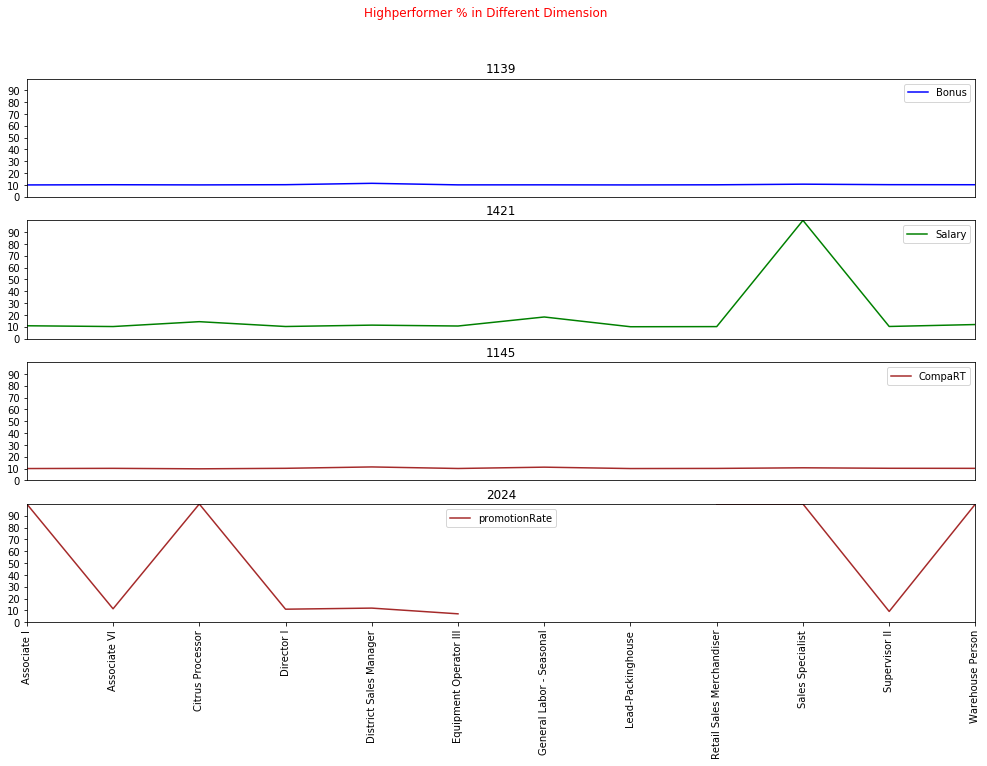

In [35]:
subplot_high_performer_perc(dataframe_quantile,data=data_10,year=2017)

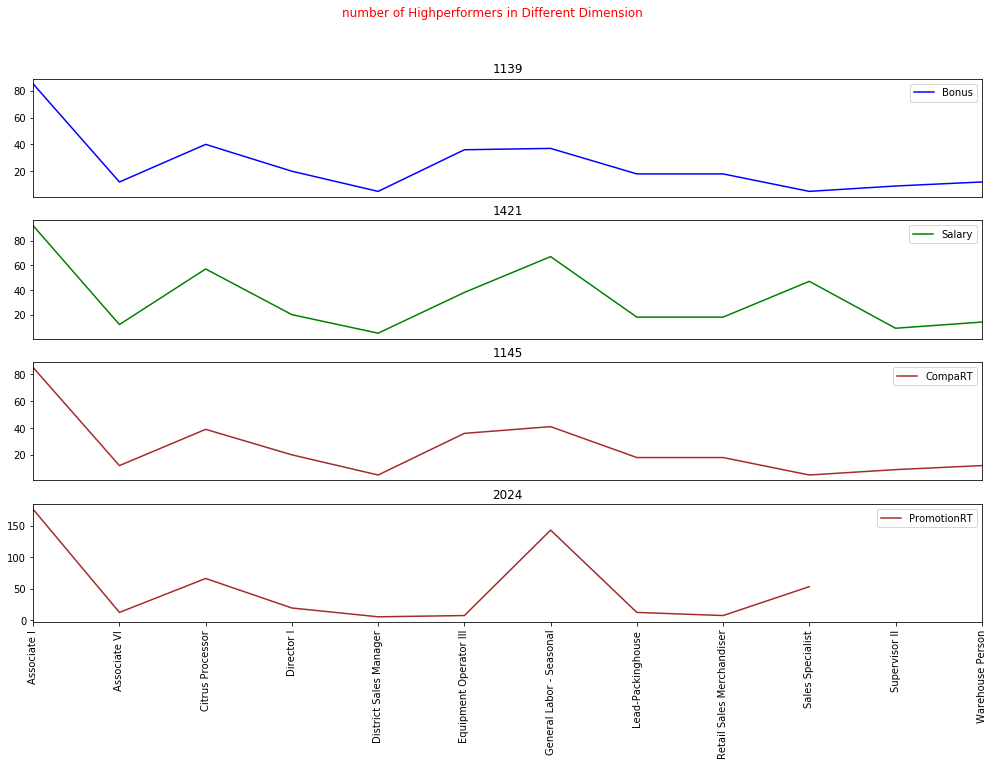

In [36]:
subplot_high_performer_nmbr(dataframe_quantile,data=data_10,year=2017)

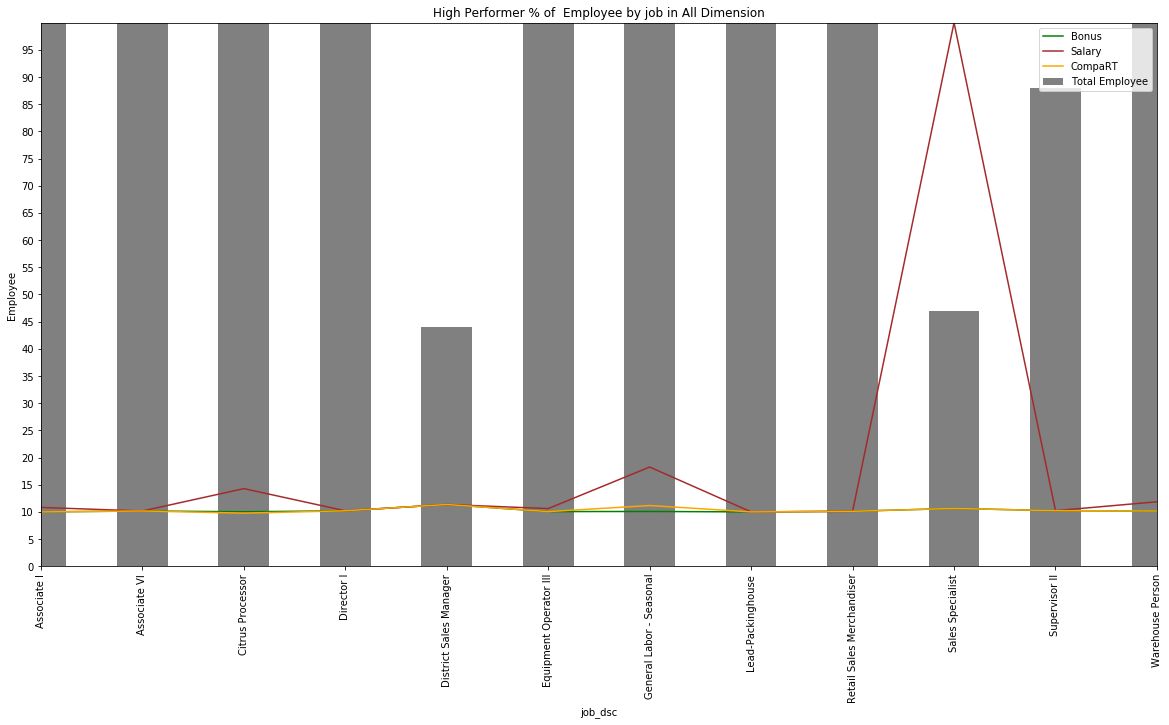

In [37]:
plot_high_performer_individual_perc(dataframe_quantile,data_10,2017)

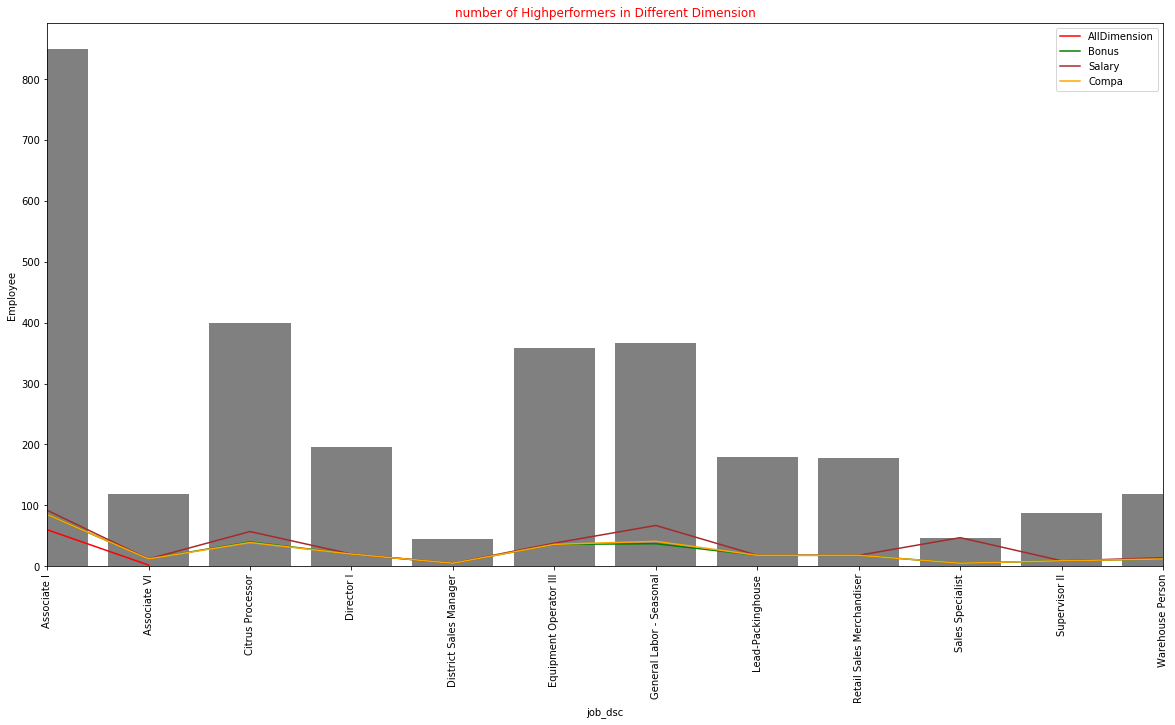

In [38]:
plot_high_performer_individual(dataframe_quantile,data_10,2017)

In [39]:
##data.groupby('job_dsc').aoid.agg({'count':'count'}).reset_index()[data.groupby('job_dsc').aoid.agg({'count':'count'}).reset_index()['count']<10]

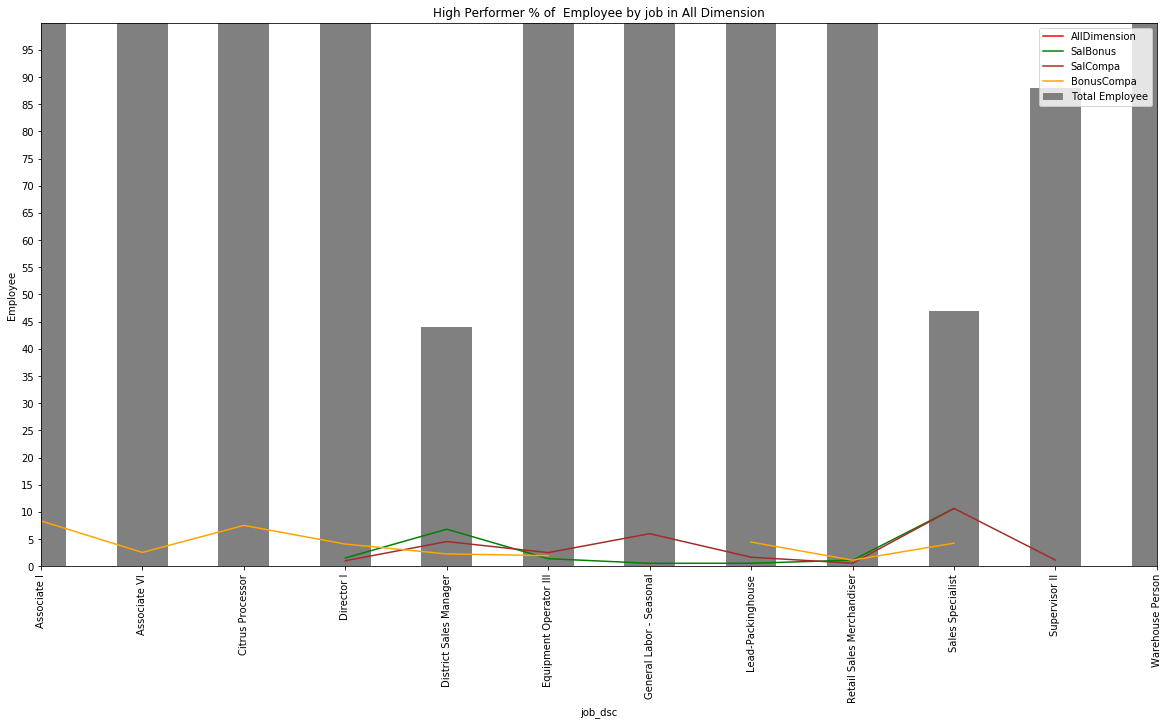

In [40]:
plot_high_performer(dataframe_quantile,data_10,2017)

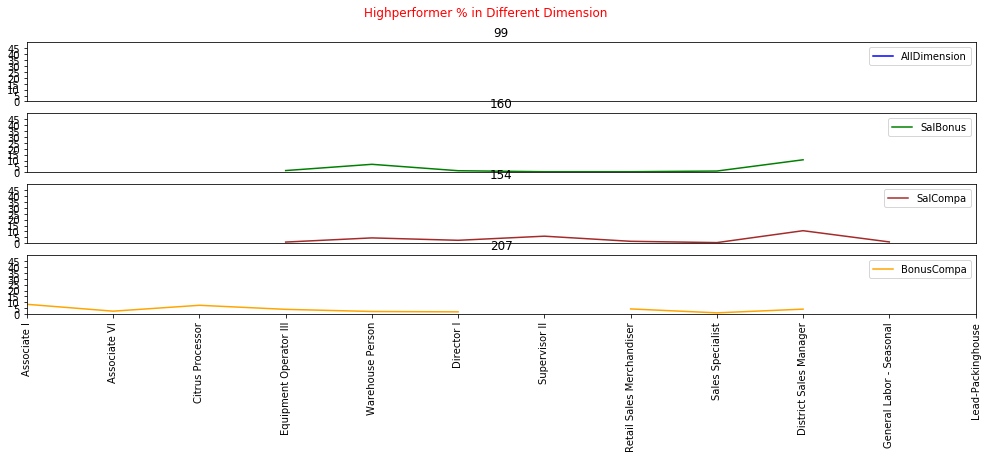

In [41]:
subplot_high_performer(dataframe_quantile,data=data_10,year=2017)

In [65]:
data_tenure = data[(data['year']==2017) & (data['tenure']>=1.0)]
g1 = data_tenure[data_tenure['year']==2017].groupby(['job_dsc']).promotion_rate.quantile(0.90)
g1 = g1.to_frame(name='Promotionrate_quantile').reset_index()
df_qntile = pd.merge(data_tenure[data_tenure['year']==2017],g1[['job_dsc','Promotionrate_quantile']],on=['job_dsc'])
df_qntile.head()

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions,promotion_rate,Promotionrate_quantile
0,G3AMKMQ4X429D89D,G3782TKYTF87K932,2017,0.065205,0.000,3.38,Associate VI,1.29,0.0,0.000000,0.166983
1,G3AMKMQ4X429D89D,G3WEB3CDS47RN49R,2017,0.250200,8.860,2.80,Associate VI,31.37,0.0,0.000000,0.166983
2,G3AMKMQ4X429D89D,G39D8PHG4JRJD9ST,2017,0.072577,0.000,2.26,Associate VI,21.36,0.0,0.000000,0.166983
3,G3AMKMQ4X429D89D,G37N1CBMZ78VMD5Y,2017,0.085695,0.000,2.91,Associate VI,12.39,0.0,0.000000,0.166983
4,G3AMKMQ4X429D89D,G39D8PHG4JRJCH0V,2017,0.088703,0.055,2.88,Associate VI,5.19,1.0,0.192678,0.166983


In [67]:
df_qntile['isHighPerformerPermotion'] = np.where(df_qntile['promotions']>=df_qntile['Promotionrate_quantile'],df_qntile.aoid,np.NaN)

In [68]:
df_qntile.head()

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions,promotion_rate,Promotionrate_quantile,isHighPerformerPermotion
0,G3AMKMQ4X429D89D,G3782TKYTF87K932,2017,0.065205,0.000,3.38,Associate VI,1.29,0.0,0.000000,0.166983,NaN
1,G3AMKMQ4X429D89D,G3WEB3CDS47RN49R,2017,0.250200,8.860,2.80,Associate VI,31.37,0.0,0.000000,0.166983,NaN
2,G3AMKMQ4X429D89D,G39D8PHG4JRJD9ST,2017,0.072577,0.000,2.26,Associate VI,21.36,0.0,0.000000,0.166983,NaN
3,G3AMKMQ4X429D89D,G37N1CBMZ78VMD5Y,2017,0.085695,0.000,2.91,Associate VI,12.39,0.0,0.000000,0.166983,NaN
4,G3AMKMQ4X429D89D,G39D8PHG4JRJCH0V,2017,0.088703,0.055,2.88,Associate VI,5.19,1.0,0.192678,0.166983,G39D8PHG4JRJCH0V


##### ***************** END of Analysis of The wonderfull company

### with EEo1 and more clients

In [101]:
path_EEO1="C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\Peformance\\EEO1MoreClient.csv"

In [104]:
data_EEO1 = pd.read_csv(path_EEO1,header=0)
print(data_EEO1.shape)
data_EEO1.head()

(321192, 9)


,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions
0,G3N25SWCV1M1MP7F,G337ANBN148K1BSZ,2017,NaN,0.000000,1.125021,Laborers and Helpers,NaN,NaN
1,G3N25SWCV1M1MP7F,G337ANBN148KKW97,2017,NaN,3.506667,1.219983,Laborers and Helpers,0.71,0.0
2,G3N25SWCV1M1MP7F,G337ANBN148KPK7E,2017,NaN,0.982500,1.305529,Laborers and Helpers,NaN,NaN
3,G3N25SWCV1M1MP7F,G33KCJ1JAWQ79T3B,2017,NaN,0.000000,0.370079,Laborers and Helpers,0.19,0.0
4,G3N25SWCV1M1MP7F,G33RH3Z55X28WD8H,2017,NaN,0.000000,0.770502,Laborers and Helpers,NaN,NaN


In [105]:
data_EEO1[data_EEO1['job_dsc'].isnull()]

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions
200,G3N25SWCV1M1MP7F,G3JK6GSE82PMMZPX,2017,NaN,0.0000,1.017657,NaN,NaN,NaN
367,G3N25SWCV1M1MP7F,G337ANBN148K0E55,2017,NaN,253.5600,3.446351,NaN,NaN,NaN
381,G3N25SWCV1M1MP7F,G3942J1RNAB5V7B2,2017,NaN,0.0000,1.282889,NaN,NaN,NaN
391,G3N25SWCV1M1MP7F,G3JK6GSE82PM8SMD,2017,NaN,0.0000,1.257673,NaN,NaN,NaN
514,G3N25SWCV1M1MP7F,G3K74M6G94TM32PG,2017,NaN,0.0000,1.257673,NaN,NaN,NaN
566,G3N25SWCV1M1MP7F,G3JK6GSE82PMFRXW,2017,NaN,0.0000,1.257673,NaN,NaN,NaN
601,G3N25SWCV1M1MP7F,G35V4QM4GTDWV58M,2017,NaN,0.0000,0.364685,NaN,NaN,NaN
615,G3N25SWCV1M1MP7F,G3JK6GSE82PM1FHK,2017,NaN,0.0000,1.231931,NaN,NaN,NaN
1098,G3N25SWCV1M1MP7F,G3K74M6G94TM41XD,2017,NaN,0.0000,1.257673,NaN,NaN,NaN
1107,G3N25SWCV1M1MP7F,G3QRHWMKYAZ534MN,2017,NaN,0.0000,0.843378,NaN,NaN,NaN


In [197]:
data[data['ooid']=='G3AMKMQ4X429D89D']

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions


## The Wonderfull company  G3AMKMQ4X429D89D
### manufacturing 10589 employee 

In [1]:
## thewonderfull2017 has peer compa ratio
path="C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\Peformance\\thewonderfull2017.csv"
##path_peers="C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\Peformance\\thewonderfull2017.csv"

In [25]:
data = pd.read_csv(path,header=0)
data.head()
fillna(data)
data['experience_bin'] = data.experience_bin.round()

In [88]:
data.year.unique()

array([2017, 2018], dtype=int64)

In [90]:
##data.groupby('job_dsc').agg({'job_dsc':'count', })
data[data['year']==2017].groupby('job_dsc').aoid.nunique().reset_index().to_csv('job_wndrflCmpny.csv')

In [26]:
dataframe30 = getDataframe_30Emp(data,2017,30)

In [27]:
dataframe30.head()

,ooid,aoid,job_dsc,bonus_ratio,salary_hike,compa_rt,experience_bin,year
0,G3AMKMQ4X429D89D,G3KSVRDH72J8FMPS,Admin Support Representative,0.123894,3.0300,0.23,4.0,2017
1,G3AMKMQ4X429D89D,G332TYH98CX33RSF,Admin Support Representative,0.327692,4.4100,0.94,4.0,2017
2,G3AMKMQ4X429D89D,G3JV4VV5KJFCK2D0,Admin Support Representative,0.119782,3.0000,1.78,4.0,2017
3,G3AMKMQ4X429D89D,G3VKQ3PFCCJKA5CQ,Admin Support Representative,0.208215,2.9925,1.49,4.0,2017
4,G3AMKMQ4X429D89D,G3TD5JGZNVBS2G3E,Admin Support Representative,0.138705,2.9925,1.44,4.0,2017


In [62]:
print(data[data['year']==2017].aoid.nunique())
print(data[data['year']==2017].job_dsc.nunique())
print(dataframe30[dataframe30['year']==2017].aoid.count())
print(dataframe30[dataframe30['year']==2017].job_dsc.nunique())

10589
606
6640
37


   experience_bin  total_job_30  total_job  total_employee  total_empploye30
0             0.0             8         87             336               202
1             1.0            31        227            1053               713
2             2.0            38        289            1303               891
3             3.0            38        295            3447              3148
4             4.0            83        467            4450              3889


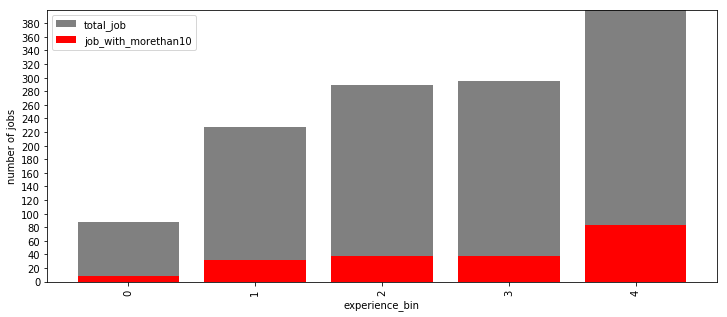

In [78]:
plot_job_difference(data,year=2017,cut_off=10)

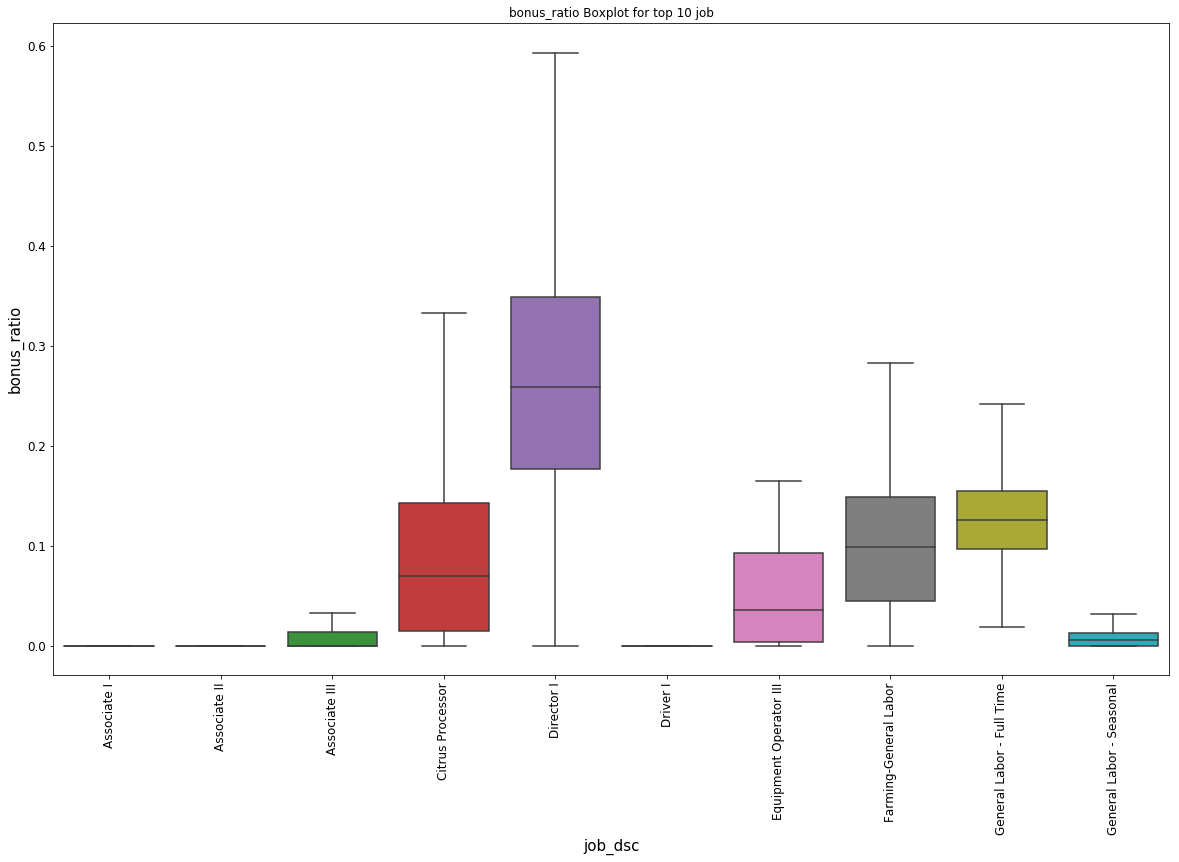

In [30]:
get_box_plot(dataframe30,"bonus_ratio",2017)

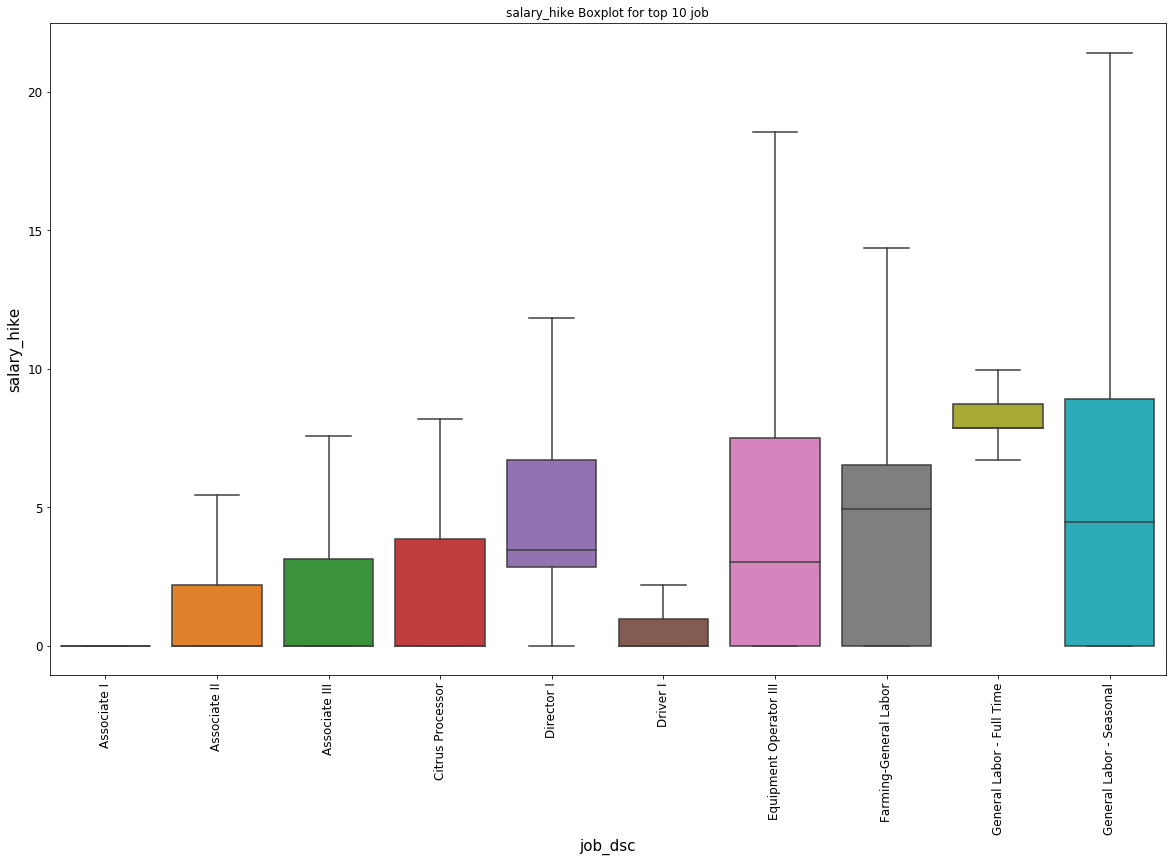

In [31]:
get_box_plot(dataframe30,"salary_hike",2017)

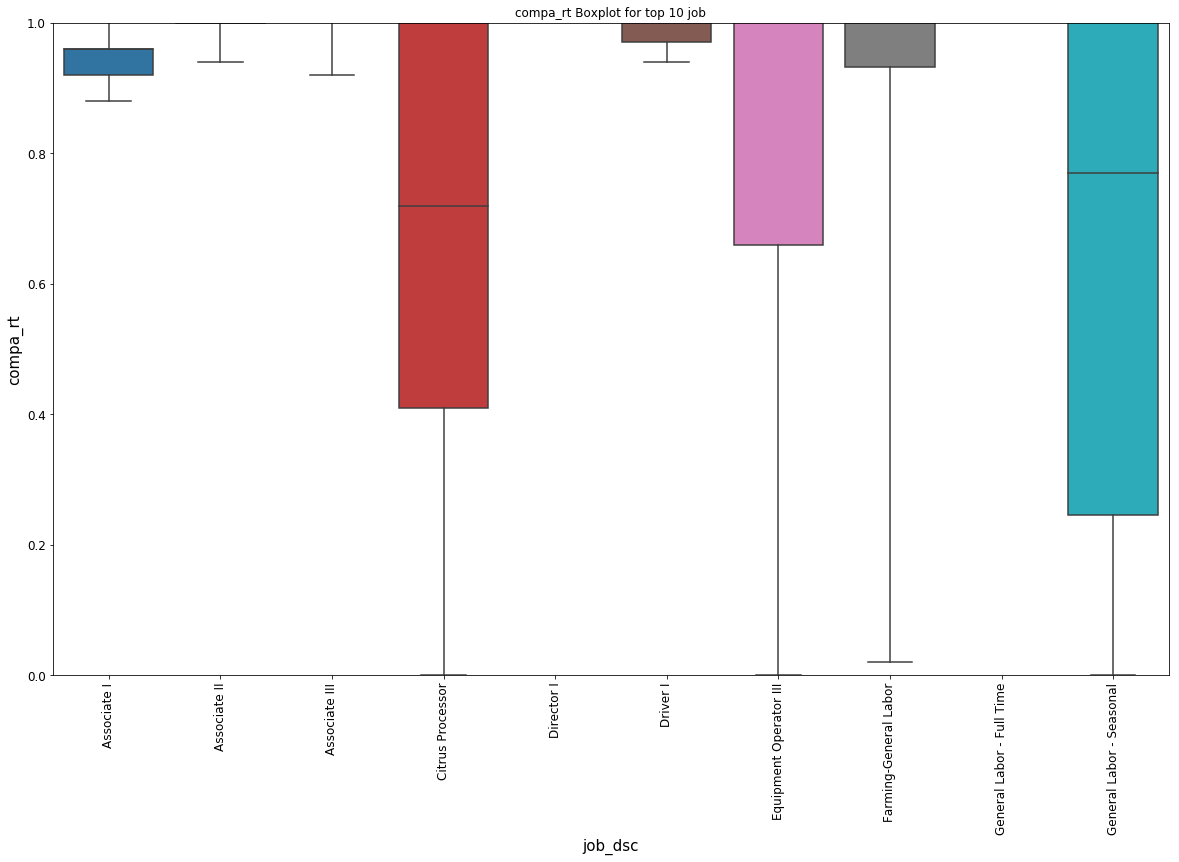

In [32]:
get_box_plot(dataframe30,"compa_rt",2017)

None
here


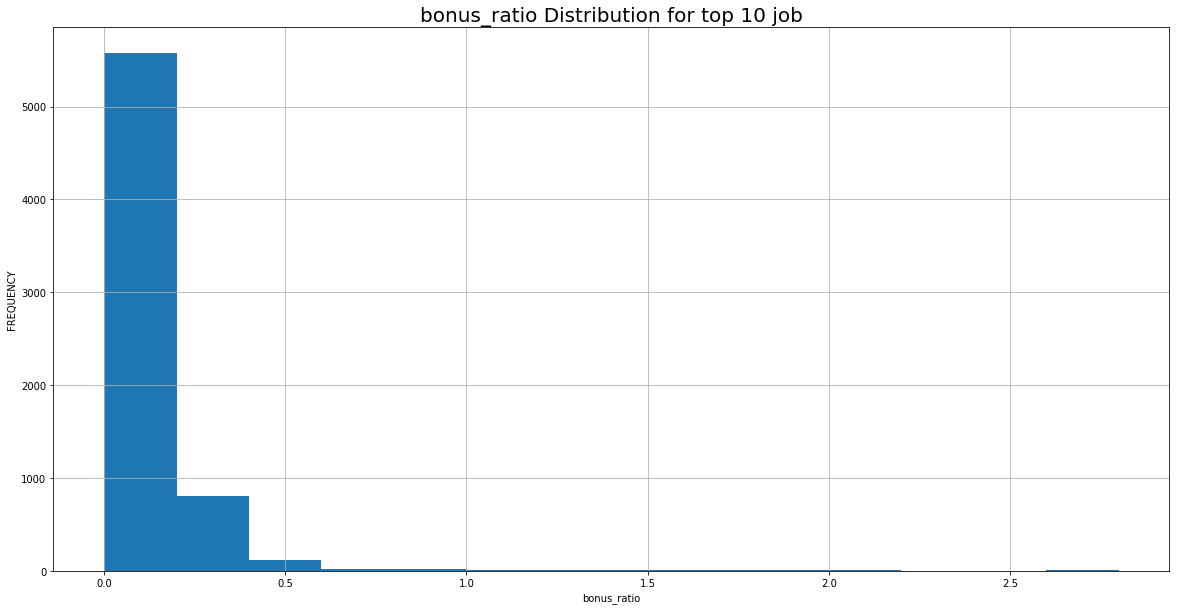

In [33]:
plot_feature('bonus_ratio',dataframe30,2017, all=None)

In [34]:
dataframe_quantile = get_quantile(dataframe30,2017,0.90,0.90,0.90)

In [35]:
##dfhigh = get_high_performer(dataframe_quantile,dataframe30,2017)
##dfhigh[(dfhigh['IsHighPerformerAll'].notnull())]['IsHighPerformerAll'].values

In [36]:
##dfhigh[(dfhigh['IsHighPerformerAll'].notnull())]['IsHighPerformerAll'].values

In [71]:
get_high_performer(dataframe_quantile,dataframe30,2017)

number of high performer in all Dimension:- 253
number of high performer in Salary and Bonus:- 359
number of high performer in Salary and Compa:- 324
number of high performer in Bonus and Compa:- 1453
number of high performer in only Bonus:- 2841
number of high performer in only SalaryHike:- 851
number of high performer in only CompaRT:- 1773


,job_dsc,total_employee,IsHighPerformerBonus,IsHighPerformerSalaryHike,IsHighPerformerCompaRT,IsHighPerformerAll,IsHighPerformerSalBonus,IsHighPerformerSalCompa,IsHighPerformerBonusCompa,Bonuspercentage,Salarypercentage,CompaRTpercentage,ALLDimension,SalBonus,SalCompa,BonusCompa
0,Associate I,808,692,85,418,80,84,81,409,85.643564,10.519802,51.732673,9.900990,10.396040,10.024752,50.618812
1,Associate II,1073,841,110,491,65,85,71,474,78.378378,10.251631,45.759553,6.057782,7.921715,6.616962,44.175210
2,Associate III,616,465,64,225,27,51,30,211,75.487013,10.389610,36.525974,4.383117,8.279221,4.870130,34.253247
3,Clerk I (Packing House),32,4,4,4,1,1,1,2,12.500000,12.500000,12.500000,3.125000,3.125000,3.125000,6.250000
4,Director I,184,20,21,20,2,4,2,8,10.869565,11.413043,10.869565,1.086957,2.173913,1.086957,4.347826


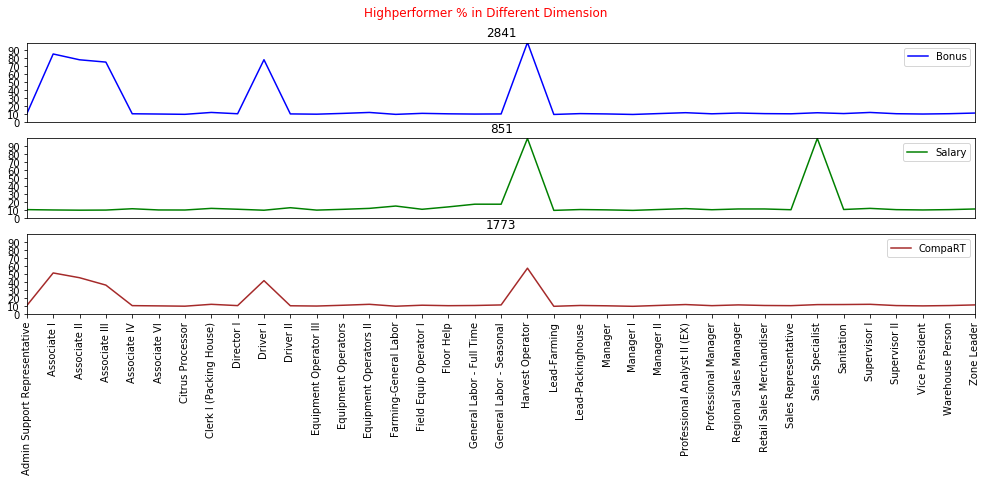

In [38]:
subplot_high_performer_perc(dataframe_quantile,data=dataframe30,year=2017)

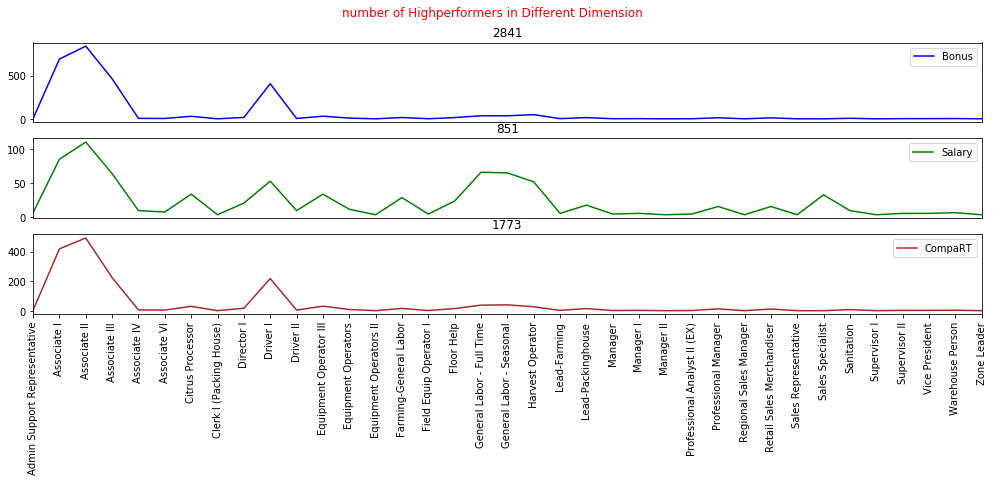

In [39]:
subplot_high_performer_nmbr(dataframe_quantile,data=dataframe30,year=2017)

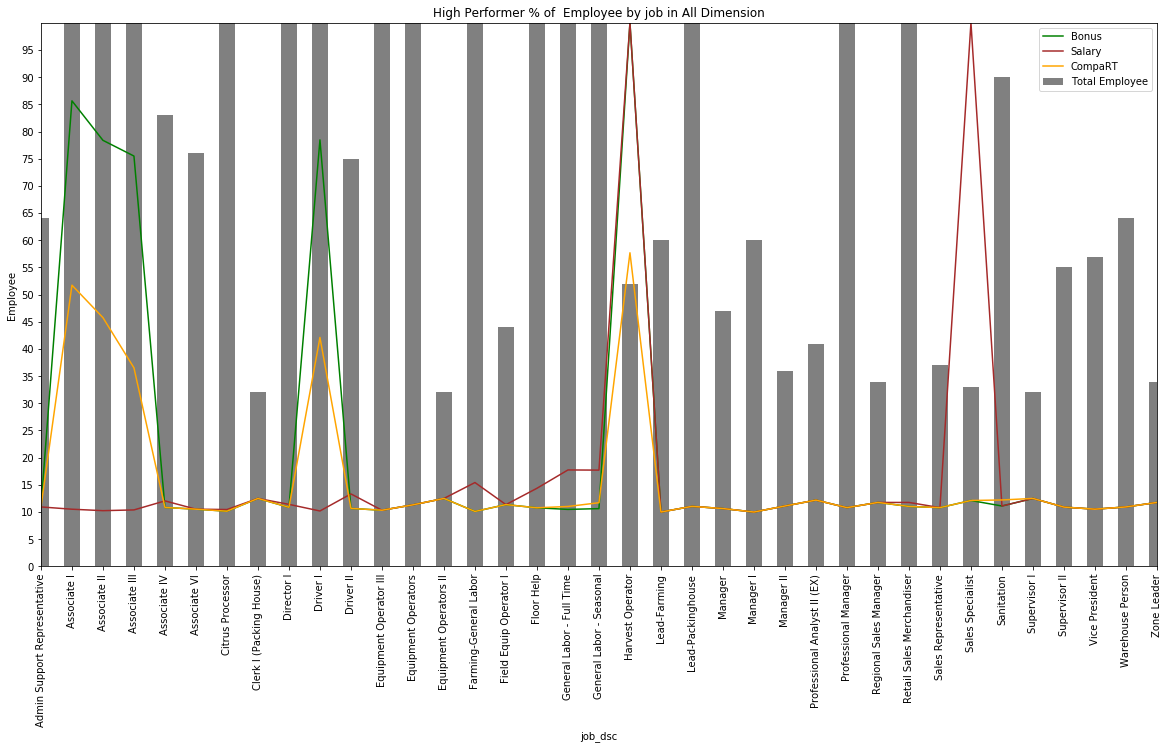

In [73]:
plot_high_performer_individual_perc(dataframe_quantile,dataframe30,2017)

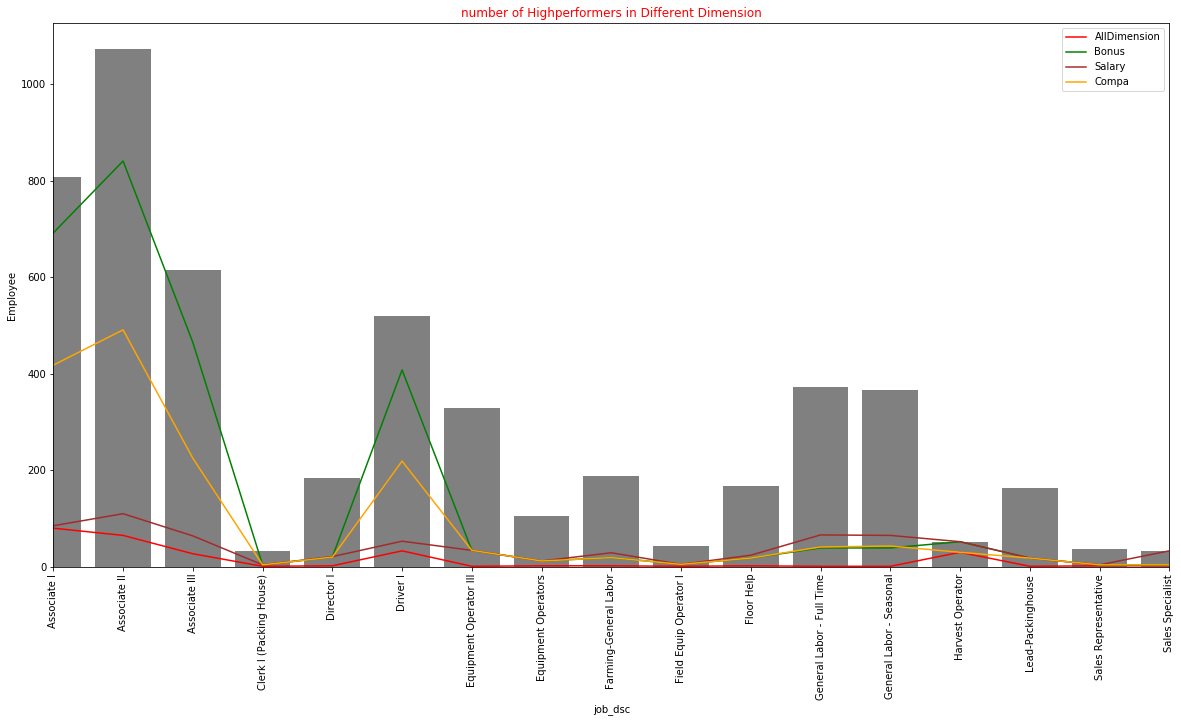

In [40]:
plot_high_performer_individual(dataframe_quantile,dataframe30,2017)

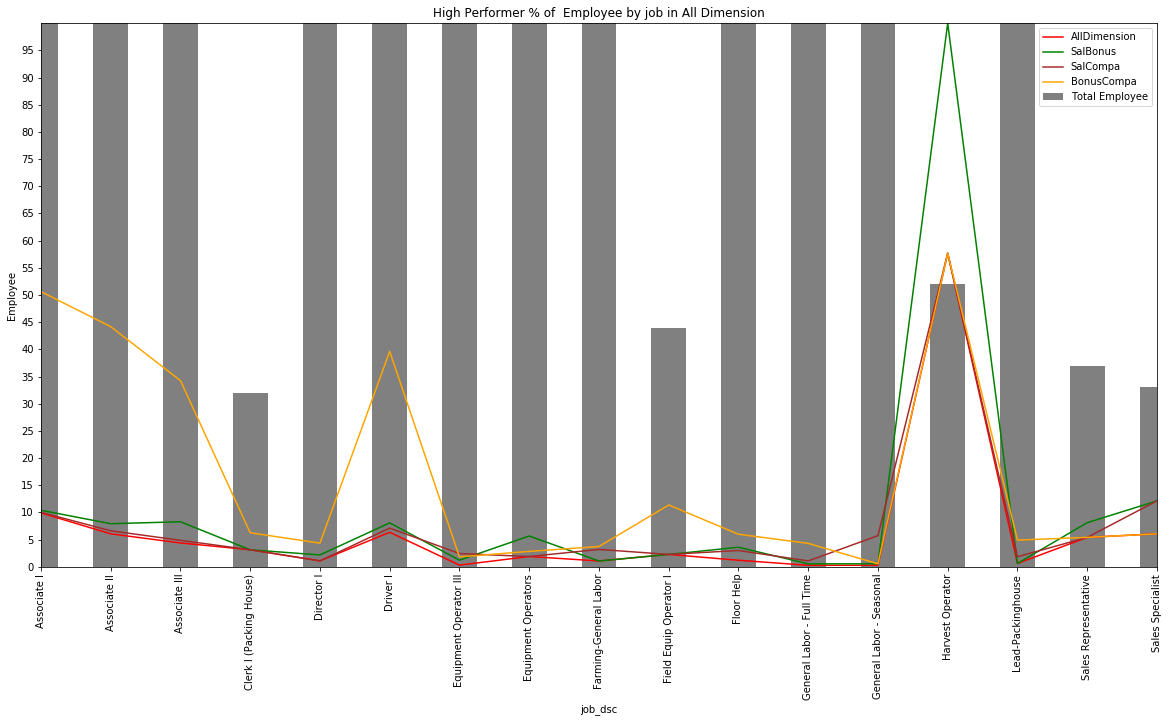

In [42]:
plot_high_performer(dataframe_quantile,dataframe30,2017)

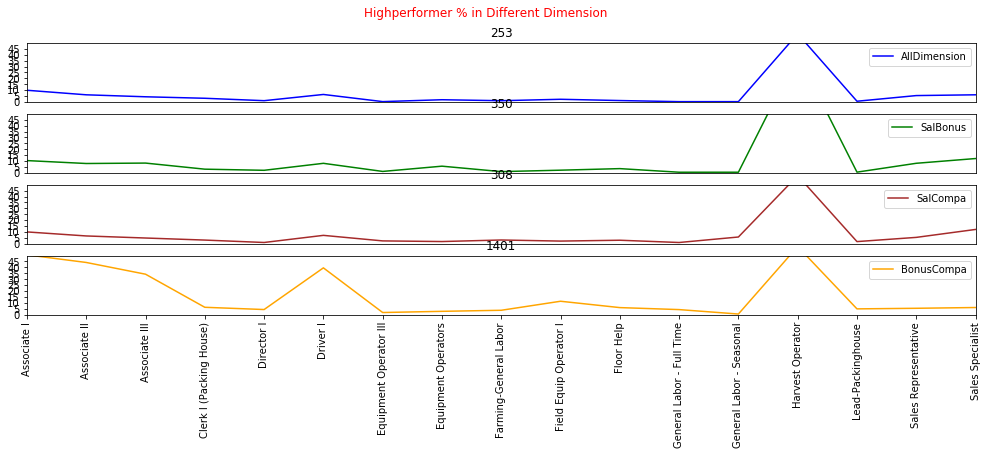

In [43]:
subplot_high_performer(dataframe_quantile,data=dataframe30,year=2017)

In [44]:
##data[data['year']==2017].job_dsc.unique()- dataframe30.job_dsc.unique()
##data[(data['year']==2017) & data['job_dsc'].isin(dataframe30.job_dsc.unique())]['job_dsc'].unique()
##data[(data['year']==2017) & data['job_dsc'].isin(dataframe30.job_dsc.unique())]['job_dsc'].unique()
'''
find  which job got excluded because of the cutoff
'''
##data_FSR.round({'experience_bin':0})['experience_bin'].unique()
##data_FSR['experience_bin'].unique()

'\nfind  which job got excluded because of the cutoff\n'

## First Service renteal G3G7E0K05TQ92T61
#### hospitality 17861 employee in 2017

In [169]:
path_FSR="C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\Peformance\\FSRnew.csv"

In [170]:
data_FSR = pd.read_csv(path_FSR,header=0)
data_FSR.head()
fillna(data_FSR)
data_FSR['tenure'] = data_FSR['tenure'].replace(0.00,0.01) 
data_FSR['promotion_rate'] = data_FSR['promotions']/data['tenure']
dataframe10FSR = getDataframe_30Emp(data_FSR,2017,10)
job_fsr = dataframe10FSR.job_dsc.unique()

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [171]:
dataframe10FSR.head()

,ooid,aoid,year,bonus_ratio,salary_hike,compa_rt,job_dsc,tenure,promotions,promotion_rate
0,G3G7E0K05TQ92T61,G33KZ9YT79KXQC0F,2017,0.0,0.000000,0.149947,Administrator On-Site Propert,0.01,0.0,0.0
1,G3G7E0K05TQ92T61,G3GDVMYJXNGXYXG5,2017,0.0,2.000000,1.030490,Administrator On-Site Propert,0.01,0.0,0.0
2,G3G7E0K05TQ92T61,G35FAXAGM2STRRJQ,2017,0.0,3.840000,1.075945,Administrator On-Site Propert,0.01,0.0,0.0
3,G3G7E0K05TQ92T61,G3YM3YHTMNTFZGMW,2017,0.0,13.163333,0.835990,Administrator On-Site Propert,0.01,0.0,0.0
4,G3G7E0K05TQ92T61,G35FAXAGM2STF70R,2017,0.0,5.870000,0.720189,Administrator On-Site Propert,0.01,0.0,0.0


In [173]:
dataframe10FSR.job_dsc.unique()

array(['Administrator  On-Site Propert', 'Staff  Housekeeping',
       'Crew  Tree', 'Supervisor  Landscape GM',
       'Sr Accountant  Client GL', 'Manager  Property Portfolio',
       'Staff  Front Desk', 'Staff  Janitorial',
       'Controller  Client Acct', 'Generalist  HR', 'Staff  Fitness',
       'Staff  Building Maint', 'Staff  Bus', 'Staff  Grounds Maint',
       'Community Manager', 'Manager  Portfolio',
       'Assistant Community Manager', 'Staff  Clubhouse',
       'Supervisor  Operations', 'Jr Manager  Property Operation',
       'Operator  Equipment', 'Manager  On-Site Property',
       'Building Engineer', 'Receptionist', 'Manager  Facilities',
       'Accountant  Client GL', 'Regional Director', 'Staff  Pool',
       'Supervisor  Building Maint', 'Manager  HR',
       'Representative  Customer Care', 'Administrator  IT Applications',
       'Resident Serv Administrator', 'Staff  Concierge',
       'Asst Manager  On-Site Property', 'Staff  Security',
       'Server  Res

In [174]:
df_outlier_FSR = getmostimpfeature(dataframe=dataframe10FSR,joblist=job_fsr)

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\range.py:433: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


Administrator  On-Site Propert --using Standard Deviation important feature:-
{'compa_rt': 0.1919640275464022}
most importtant feature :- ['compa_rt']
highperformer:- 82 818
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Staff  Housekeeping --using Standard Deviation important feature:-
{'salary_hike': 0.10859602464929259, 'compa_rt': 0.10084571869745591}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 10 725
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Crew  Tree --using Standard Deviation important feature:-
{'salary_hike': 0.14017789404947184, 'compa_rt': 0.23251460658532652}
most importtant feature :- ['compa_rt']
highperformer:- 8 75
----------------------------------------------------------------------------
Supervisor  Landscape GM --using Standard Deviation important feature:-
{'salary_hike': 0.20336406978295665, 'compa_rt': 0.14031755332670537}
most importtant feature :- ['salary_hike']
highperformer:- 8 79
----------------------------------------------------------------------------
Sr Accountant  Client GL --using MAD important feature:-
{'bonus_ratio': 0.14533536526027252, 'salary_hike': 0.17157839361680896, 'compa_rt': 0.14065462749812946}
most importtant feature :- ['salary_hike', 'bonus_ratio', 'compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 0 98
----------------------------------------------------------------------------
Manager  Property Portfolio --using MAD important feature:-
{'bonus_ratio': 0.08803425079136087, 'salary_hike': 0.12234936993472953, 'compa_rt': 0.10756966276074811}
most importtant feature :- ['salary_hike', 'compa_rt', 'bonus_ratio']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 0 367
----------------------------------------------------------------------------
Staff  Front Desk --using Standard Deviation important feature:-
{'compa_rt': 0.16139741209909406}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 231 2309
----------------------------------------------------------------------------
Staff  Janitorial --using Standard Deviation important feature:-
{'compa_rt': 0.1403999540566371}


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


most importtant feature :- ['compa_rt']
highperformer:- 104 1036
----------------------------------------------------------------------------
Controller  Client Acct --using MAD important feature:-
{'bonus_ratio': 0.1675374675882288, 'salary_hike': 0.43033154552461816, 'compa_rt': 0.3751965669536137}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['salary_hike']
highperformer:- 2 11
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Generalist  HR --using MAD important feature:-
{'bonus_ratio': 0.1860640375345835, 'salary_hike': 0.14997720889234692, 'compa_rt': 0.37492918395264563}
most importtant feature :- ['compa_rt']
highperformer:- 3 22
----------------------------------------------------------------------------
Staff  Fitness --using Standard Deviation important feature:-
{'salary_hike': 0.1495352438448182, 'compa_rt': 0.21544242348472428}
most importtant feature :- ['compa_rt']
highperformer:- 8 75
----------------------------------------------------------------------------
Staff  Building Maint --using Standard Deviation important feature:-
{'compa_rt': 0.13455186205567082}
most importtant feature :- ['compa_rt']

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



highperformer:- 181 1801
----------------------------------------------------------------------------

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



Staff  Bus --using Standard Deviation important feature:-
{'salary_hike': 0.3707965169047993, 'compa_rt': 0.2856654645039619}
most importtant feature :- ['salary_hike']
highperformer:- 3 18
----------------------------------------------------------------------------
Staff  Grounds Maint --using Standard Deviation important feature:-
{'salary_hike': 0.14807869219385797, 'compa_rt': 0.16584948506991518}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 5 317
----------------------------------------------------------------------------
Community Manager --using Standard Deviation important feature:-
{'salary_hike': 0.12138591615534941, 'compa_rt': 0.10245124280526131}
most importtant feature :- ['salary_hike', 'compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 2 257
----------------------------------------------------------------------------
Manager  Portfolio --using MAD important feature:-
{'bonus_ratio': 0.08904855684478663, 'salary_hike': 0.12101409537328497, 'compa_rt': 0.30126290901963526}
most importtant feature :- ['compa_rt']
highperformer:- 36 355
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Assistant Community Manager --using Standard Deviation important feature:-
{'bonus_ratio': 0.1217010992545598, 'salary_hike': 0.2256829574775919, 'compa_rt': 0.13227546318396408}
most importtant feature :- ['salary_hike']
highperformer:- 20 194
----------------------------------------------------------------------------
Staff  Clubhouse --using Standard Deviation important feature:-
{'salary_hike': 0.1654733415365374, 'compa_rt': 0.20445999472920107}
most importtant feature :- ['compa_rt']
highperformer:- 9 86
----------------------------------------------------------------------------
Supervisor  Operations --using Standard Deviation important feature:-
{'salary_hike': 0.1441437353750674, 'compa_rt': 0.17690316456429114}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 14 134
----------------------------------------------------------------------------
Jr Manager  Property Operation --using MAD important feature:-
{'bonus_ratio': 0.1313081392202498, 'salary_hike': 0.215627564884853, 'compa_rt': 0.15187969234201204}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['salary_hike']
highperformer:- 22 215
----------------------------------------------------------------------------
Operator  Equipment --using Standard Deviation important feature:-
{'salary_hike': 0.3706087850183904, 'compa_rt': 0.17475687606319287}
most importtant feature :- ['salary_hike']
highperformer:- 5 45
----------------------------------------------------------------------------
Manager  On-Site Property --using MAD important feature:-
{'bonus_ratio': 0.05288114137687938, 'salary_hike': 0.07725895962592587, 'compa_rt': 0.1411858953086604}


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


most importtant feature :- ['compa_rt']
highperformer:- 84 835
----------------------------------------------------------------------------

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



Building Engineer --using Standard Deviation important feature:-
{'bonus_ratio': 0.13128622409733126, 'salary_hike': 0.2306272445028473, 'compa_rt': 0.19873903239158494}
most importtant feature :- ['salary_hike']
highperformer:- 6 57
----------------------------------------------------------------------------
Receptionist --using Standard Deviation important feature:-
{'salary_hike': 0.14710922726899425, 'compa_rt': 0.2144165687388948}
most importtant feature :- ['compa_rt']
highperformer:- 10 93
----------------------------------------------------------------------------
Manager  Facilities --using MAD important feature:-
{'bonus_ratio': 0.282983828250539, 'salary_hike': 0.5666654337993654, 'compa_rt': 0.3834493420197704}
most importtant feature :- ['salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 1 10
----------------------------------------------------------------------------
Accountant  Client GL --using Standard Deviation important feature:-
{'salary_hike': 0.14268793489929738, 'compa_rt': 0.15720845784597476}
most importtant feature :- ['compa_rt', 'salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 0 237
----------------------------------------------------------------------------
Regional Director --using MAD important feature:-
{'bonus_ratio': 0.1546252734505706, 'salary_hike': 0.10271901671911904, 'compa_rt': 0.1927667353660238}
most importtant feature :- ['compa_rt', 'bonus_ratio']
highperformer:- 0 78
----------------------------------------------------------------------------
Staff  Pool --using Standard Deviation important feature:-
{'salary_hike': 0.12218754616638734, 'compa_rt': 0.1686308088112744}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 62 618
----------------------------------------------------------------------------
Supervisor  Building Maint --using Standard Deviation important feature:-
{'bonus_ratio': 0.13309812751468753, 'salary_hike': 0.11155857236172131, 'compa_rt': 0.16228210435075446}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['compa_rt', 'bonus_ratio']
highperformer:- 19 427
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Manager  HR --using MAD important feature:-
{'bonus_ratio': 0.330931533608833, 'salary_hike': 0.24210959842876803, 'compa_rt': 0.3067037505146816}
most importtant feature :- ['bonus_ratio', 'compa_rt']
highperformer:- 2 17
----------------------------------------------------------------------------
Representative  Customer Care --using Standard Deviation important feature:-
{'compa_rt': 0.2339243442927132}
most importtant feature :- ['compa_rt']
highperformer:- 29 281
----------------------------------------------------------------------------
Administrator  IT Applications --using Standard Deviation important feature:-
{'bonus_ratio': 0.2664693550105966, 'salary_hike': 0.35166213476250746, 'compa_rt': 0.31539857799871196}
most importtant feature :- ['salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 2 13
----------------------------------------------------------------------------
Resident Serv Administrator --using Standard Deviation important feature:-
{'salary_hike': 0.14747079315057618, 'compa_rt': 0.17047360106337045}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 2 124
----------------------------------------------------------------------------
Staff  Concierge --using Standard Deviation important feature:-
{'salary_hike': 0.1513159818361844, 'compa_rt': 0.23386274302040666}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 45 445
----------------------------------------------------------------------------
Asst Manager  On-Site Property --using Standard Deviation important feature:-
{'salary_hike': 0.11602894137224311, 'compa_rt': 0.17524513190921984}
most importtant feature :- ['compa_rt']
highperformer:- 21 207
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Staff  Security --using Standard Deviation important feature:-
{'compa_rt': 0.19840697152736625}
most importtant feature :- ['compa_rt']
highperformer:- 34 331
----------------------------------------------------------------------------
Server  Restaurant --using Standard Deviation important feature:-
{'salary_hike': 0.19985862555262493, 'compa_rt': 0.20961610006060163}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 1 67
----------------------------------------------------------------------------
Asst Manager  Property Operati --using Standard Deviation important feature:-
{'bonus_ratio': 0.13338885873463632, 'salary_hike': 0.14513569155326608, 'compa_rt': 0.1694110798996233}
most importtant feature :- ['compa_rt', 'salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 3 86
----------------------------------------------------------------------------
Coordinator  Property Operatio --using Standard Deviation important feature:-
{'bonus_ratio': 0.13441615338681612, 'salary_hike': 0.22090099290118462, 'compa_rt': 0.2590823776292324}
most importtant feature :- ['compa_rt']
highperformer:- 7 63
----------------------------------------------------------------------------
Technician  Pest Control --using Standard Deviation important feature:-
{'salary_hike': 0.13382057123046665, 'compa_rt': 0.2460375213374035}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 6 60
----------------------------------------------------------------------------
Assistant  Administrative --using Standard Deviation important feature:-
{'salary_hike': 0.11711554321981803, 'compa_rt': 0.15617303939721294}
most importtant feature :- ['compa_rt']
highperformer:- 48 471
----------------------------------------------------------------------------
Staff  Valet --using Standard Deviation important feature:-
{'salary_hike': 0.16771457014468036, 'compa_rt': 0.22568577332039663}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 15 150
----------------------------------------------------------------------------
Crew  Landscape GM --using Standard Deviation important feature:-
{'salary_hike': 0.1746318049167149, 'compa_rt': 0.1880131540508072}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 11 732
----------------------------------------------------------------------------
Supervisor  Front Desk --using Standard Deviation important feature:-
{'bonus_ratio': 0.31830979019384076, 'salary_hike': 0.27154172322097636, 'compa_rt': 0.2581358328864011}
most importtant feature :- ['bonus_ratio']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 3 27
----------------------------------------------------------------------------
Manager  Lifestyle --using MAD important feature:-
{'compa_rt': 0.48106879058183627}
most importtant feature :- ['compa_rt']
highperformer:- 5 42
----------------------------------------------------------------------------
Staff  Beach --using Standard Deviation important feature:-
{'salary_hike': 0.2109647432304203, 'compa_rt': 0.18445888012277617}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 0 26
----------------------------------------------------------------------------
Crew  Shop --using Standard Deviation important feature:-
{'salary_hike': 0.2717977477376076, 'compa_rt': 0.29836930988422206}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 14
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Coordinator  Lifestyle --using Standard Deviation important feature:-
{'bonus_ratio': 0.11449501174523691, 'salary_hike': 0.1245762281993026, 'compa_rt': 0.21742781974209607}
most importtant feature :- ['compa_rt']
highperformer:- 22 215
----------------------------------------------------------------------------
Director of Operations --using MAD important feature:-
{'bonus_ratio': 0.29761017541497137, 'salary_hike': 0.22596310913068812, 'compa_rt': 0.3375746012715435}
most importtant feature :- ['compa_rt', 'bonus_ratio']
highperformer:- 1 14
----------------------------------------------------------------------------
Staff  Painting --using Standard Deviation important feature:-
{'salary_hike': 0.12717245286354473, 'compa_rt': 0.20571745951865647}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['compa_rt']
highperformer:- 12 119
----------------------------------------------------------------------------
HVAC  Construction --using Standard Deviation important feature:-
{'salary_hike': 0.29315535451707914, 'compa_rt': 0.25673805085254237}
most importtant feature :- ['salary_hike']
highperformer:- 2 15
----------------------------------------------------------------------------
Manager  Property Operations --using MAD important feature:-
{'bonus_ratio': 0.12548131638134385, 'salary_hike': 0.17244459665334105, 'compa_rt': 0.13276566804684492}
most importtant feature :- ['salary_hike', 'compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 3 303
----------------------------------------------------------------------------
Coordinator  Client AP --using Standard Deviation important feature:-
{'salary_hike': 0.19240807240728644, 'compa_rt': 0.209597672885294}
most importtant feature :- ['compa_rt', 'salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 3 102
----------------------------------------------------------------------------
Chief   Building Engineer --using MAD important feature:-
{'bonus_ratio': 0.18469052936073438, 'salary_hike': 0.28397226010223586, 'compa_rt': 0.17046710179777522}
most importtant feature :- ['salary_hike']
highperformer:- 11 101
----------------------------------------------------------------------------
Regional Director  Property Po --using MAD important feature:-
{'bonus_ratio': 0.13364142887718738, 'salary_hike': 0.1713400620996613, 'compa_rt': 0.2220858208325882}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 5 41
----------------------------------------------------------------------------
Coordinator  Client AR --using Standard Deviation important feature:-
{'salary_hike': 0.16245038021860803, 'compa_rt': 0.15346777867303005}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['salary_hike', 'compa_rt']
highperformer:- 3 147
----------------------------------------------------------------------------
Staff  Bench --using Standard Deviation important feature:-
{'bonus_ratio': 0.21250414266949408, 'salary_hike': 0.23290918613908937, 'compa_rt': 0.20494758889718806}
most importtant feature :- ['salary_hike', 'bonus_ratio', 'compa_rt']
highperformer:- 0 63
----------------------------------------------------------------------------
Assistant  Executive --using Standard Deviation important feature:-
{'bonus_ratio': 0.2273922963306788, 'salary_hike': 0.2457074001631988, 'compa_rt': 0.220322266029146}
most importtant feature :- 

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


['salary_hike', 'bonus_ratio', 'compa_rt']
highperformer:- 0 28
----------------------------------------------------------------------------
Regional Director  Property Op --using MAD important feature:-
{'bonus_ratio': 0.28033168027842564, 'salary_hike': 0.3120984020110756, 'compa_rt': 0.2551290548473944}
most importtant feature :- ['salary_hike', 'bonus_ratio']
highperformer:- 0 33
----------------------------------------------------------------------------
Coordinator  Property Services --using Standard Deviation important feature:-
{'salary_hike': 0.23994827836248647, 'compa_rt': 0.19734043252390376}
most importtant feature :- ['salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 5 46
----------------------------------------------------------------------------
Administrator  Portfolio --using Standard Deviation important feature:-
{'salary_hike': 0.2181789914569881, 'compa_rt': 0.19333510729263345}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 4 127
----------------------------------------------------------------------------
Bookkeeper  On-Site --using Standard Deviation important feature:-
{'bonus_ratio': 0.16216216216216214, 'salary_hike': 0.26073670606328975, 'compa_rt': 0.21215004319123293}
most importtant feature :- ['salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 7 37
----------------------------------------------------------------------------
Cashier  Client Treas --using Standard Deviation important feature:-
{'salary_hike': 0.30501927226189457, 'compa_rt': 0.30659154624804746}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 11
----------------------------------------------------------------------------
Manager  Client Acct --using MAD important feature:-
{'bonus_ratio': 0.29750417627140563, 'salary_hike': 0.2831732740732266, 'compa_rt': 0.28745327847216495}
most importtant feature :- ['bonus_ratio', 'compa_rt', 'salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 0 13
----------------------------------------------------------------------------
Jr Accountant  Client GL --using Standard Deviation important feature:-
{'salary_hike': 0.2514929864598708, 'compa_rt': 0.29017538836063184}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['compa_rt']
highperformer:- 2 17
----------------------------------------------------------------------------
Staff  Service --using Standard Deviation important feature:-
{'salary_hike': 0.18488190766538407, 'compa_rt': 0.24157597355121932}
most importtant feature :- ['compa_rt']
highperformer:- 4 37
----------------------------------------------------------------------------
Inspector  Property --using Standard Deviation important feature:-
{'salary_hike': 0.2917424617843332, 'compa_rt': 0.2362703001731538}
most importtant feature :- ['salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 2 20
----------------------------------------------------------------------------
Asst Manager  Property Portfol --using Standard Deviation important feature:-
{'bonus_ratio': 0.1393671460699965, 'salary_hike': 0.17481970169129746, 'compa_rt': 0.1460568465955032}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 2 57
----------------------------------------------------------------------------
General Manager  Property Ops --using MAD important feature:-
{'bonus_ratio': 0.18433940497811974, 'salary_hike': 0.2685413490796106, 'compa_rt': 0.1682787478757248}
most importtant feature :- ['salary_hike']

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



highperformer:- 10 99
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Laborer  Construction --using Standard Deviation important feature:-
{'salary_hike': 0.17064412550530209, 'compa_rt': 0.2569823264715031}
most importtant feature :- ['compa_rt']
highperformer:- 11 104
----------------------------------------------------------------------------
Manager  Client AR --using MAD important feature:-
{'bonus_ratio': 0.32202744378878173, 'salary_hike': 0.4708635108016159, 'compa_rt': 0.2936840753317064}
most importtant feature :- ['salary_hike']
highperformer:- 2 17
----------------------------------------------------------------------------
Administrator  IT Systems --using Standard Deviation important feature:-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



{'salary_hike': 0.24596464043286573, 'compa_rt': 0.2930938886790292}
most importtant feature :- ['compa_rt']
highperformer:- 2 15
----------------------------------------------------------------------------
Staff  Porter --using Standard Deviation important feature:-
{'salary_hike': 0.18651795294251544, 'compa_rt': 0.20873725630710768}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 4 217
----------------------------------------------------------------------------
District Manager  Property Por --using MAD important feature:-
{'bonus_ratio': 0.1868075845195433, 'salary_hike': 0.17346012811994205, 'compa_rt': 0.17069829302408254}
most importtant feature :- ['bonus_ratio', 'salary_hike', 'compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 0 22
----------------------------------------------------------------------------
Installer  Landscape --using Standard Deviation important feature:-
{'salary_hike': 0.24279388128789808, 'compa_rt': 0.22032931103079106}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 0 36
----------------------------------------------------------------------------
Sr. Community Manager --using MAD important feature:-


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


{'bonus_ratio': 0.19751866450258768, 'salary_hike': 0.12077579253184327, 'compa_rt': 0.48208785388063086}
most importtant feature :- ['compa_rt']
highperformer:- 3 27
----------------------------------------------------------------------------
Accountant  Corp Acct --using Standard Deviation important feature:-
{'salary_hike': 0.2315115069785006, 'compa_rt': 0.2670307270298479}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 2 20
----------------------------------------------------------------------------
Recruiter --using MAD important feature:-
{'bonus_ratio': 0.2789241998206224, 'salary_hike': 0.38415060728176526, 'compa_rt': 0.3466666183223911}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 0 13
----------------------------------------------------------------------------
Assistant  Executive (EXPT) --using MAD important feature:-
{'bonus_ratio': 0.19914542883943356, 'salary_hike': 0.23715886778037124, 'compa_rt': 0.2437724810357259}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['compa_rt', 'salary_hike']
highperformer:- 0 19
----------------------------------------------------------------------------
Specialist  IT Systems N-EXPT --using Standard Deviation important feature:-
{'salary_hike': 0.2605609217256148, 'compa_rt': 0.22699856023328124}
most importtant feature :- ['salary_hike']
highperformer:- 2 20
----------------------------------------------------------------------------
Staff  Gatekeeping --using Standard Deviation important feature:-
{'salary_hike': 0.14678431836131214, 'compa_rt': 0.22454954843436137}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['compa_rt']
highperformer:- 11 104
----------------------------------------------------------------------------
Coordinator  Office --using Standard Deviation important feature:-
{'salary_hike': 0.20418623372976738, 'compa_rt': 0.27112026661050925}
most importtant feature :- ['compa_rt']
highperformer:- 5 47
----------------------------------------------------------------------------
Cook  Restaurant --using Standard Deviation important feature:-
{'bonus_ratio': 0.18246560765962697, 'salary_hike': 0.24978043888607224, 'compa_rt': 0.26477012059220445}
most importtant feature :- ['compa_rt', 'salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 0 29
----------------------------------------------------------------------------
Staff  Receptionist --using Standard Deviation important feature:-
{'salary_hike': 0.1096497210669473, 'compa_rt': 0.22032602641684848}
most importtant feature :- ['compa_rt']
highperformer:- 11 105
----------------------------------------------------------------------------
Manager  Bus Dev --using Standard Deviation important feature:-
{'bonus_ratio': 0.22309086619288648, 'salary_hike': 0.21521503646027493, 'compa_rt': 0.19183763062281972}


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


most importtant feature :- ['bonus_ratio', 'salary_hike']
highperformer:- 1 49
----------------------------------------------------------------------------
Leader  Recreation --using Standard Deviation important feature:-
{'salary_hike': 0.2844505398188347, 'compa_rt': 0.2665539609854585}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 1 19


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


----------------------------------------------------------------------------
Coordinator  Transactions --using Standard Deviation important feature:-
{'bonus_ratio': 0.16659862556700858, 'salary_hike': 0.2785492872610095, 'compa_rt': 0.19029471735694986}
most importtant feature :- ['salary_hike']
highperformer:- 4 35
----------------------------------------------------------------------------
Coordinator  Compliance --using Standard Deviation important feature:-
{'salary_hike': 0.22951286583142463, 'compa_rt': 0.26994612351599634}
most importtant feature :- ['compa_rt']
highperformer:- 5 44
----------------------------------------------------------------------------
Lead  Grounds Maint --using Standard Deviation important feature:-
{'salary_hike': 0.25535424424983505, 'compa_rt': 0.16919751650685788}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['salary_hike']
highperformer:- 4 33
----------------------------------------------------------------------------
Coordinator  Client Relations --using Standard Deviation important feature:-
{'salary_hike': 0.2492287476761942, 'compa_rt': 0.21674876245195723}
most importtant feature :- ['salary_hike']
highperformer:- 2 16
----------------------------------------------------------------------------
Manager  Property High Rise --using MAD important feature:-
{'bonus_ratio': 0.11370862022475596, 'salary_hike': 0.09852285140200036, 'compa_rt': 0.1498148288643792}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['compa_rt', 'bonus_ratio']
highperformer:- 0 35
----------------------------------------------------------------------------
Staff  Spa --using Standard Deviation important feature:-
{'salary_hike': 0.16065204490974305, 'compa_rt': 0.2224286640425149}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['compa_rt']
highperformer:- 5 41
----------------------------------------------------------------------------
Director  Lifestyle --using MAD important feature:-
{'compa_rt': 0.11445343358981344}
most importtant feature :- ['compa_rt']
highperformer:- 7 69
----------------------------------------------------------------------------

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



Asst Manager. Front Desk --using Standard Deviation important feature:-
{'salary_hike': 0.21227805022553417, 'compa_rt': 0.21722943590496183}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 71
----------------------------------------------------------------------------
Coordinator  Special Projects --using Standard Deviation important feature:-
{'salary_hike': 0.2970765555254374, 'compa_rt': 0.3373341940274204}
most importtant feature :- ['compa_rt']
highperformer:- 1 10
----------------------------------------------------------------------------
Staff  Receiving --using Standard Deviation important feature:-
{'salary_hike': 0.17793286422001253, 'compa_rt': 0.15764490216962487}


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 3 127
----------------------------------------------------------------------------
Coordinator  Leasing --using Standard Deviation important feature:-
{'salary_hike': 0.2801096655877745, 'compa_rt': 0.24888731200681966}
most importtant feature :- ['salary_hike']
highperformer:- 3 30
----------------------------------------------------------------------------
Administrator  Client Acct --using Standard Deviation important feature:-
{'bonus_ratio': 0.1689577248981772, 'salary_hike': 0.23012962524266986, 'compa_rt': 0.27116776450693736}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 4 34
----------------------------------------------------------------------------
Collections Specialist  Client --using Standard Deviation important feature:-
{'salary_hike': 0.21204800963944323, 'compa_rt': 0.19926565378599878}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 1 53
----------------------------------------------------------------------------
Carpenter  Construction --using Standard Deviation important feature:-
{'salary_hike': 0.2321058635181669, 'compa_rt': 0.20088160976803288}
most importtant feature :- ['salary_hike']
highperformer:- 3 21
----------------------------------------------------------------------------
Director  Client Acct --using MAD important feature:-
{'bonus_ratio': 0.2624717609226516, 'salary_hike': 0.27668759811616955, 'compa_rt': 0.324054933159142}
most importtant feature :- ['compa_rt']
highperformer:- 2 11
----------------------------------------------------------------------------
Manager  Building Maint --using MAD important feature:-
{'bonus_ratio': 0.19360714412055538, 'salary_hike': 0.2824725551760801, 'compa_rt': 0.19305305928409158}
most importtant feature :- ['salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 6 54
----------------------------------------------------------------------------
Manager  On-Site Office --using MAD important feature:-
{'bonus_ratio': 0.23280720629372903, 'salary_hike': 0.2682463373170806, 'compa_rt': 0.28556885191152503}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 2 56
----------------------------------------------------------------------------
VP  Property Portfolio --using MAD important feature:-
{'bonus_ratio': 0.20227955457233268, 'salary_hike': 0.12420303678982066, 'compa_rt': 0.3784083963945224}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['compa_rt']
highperformer:- 2 18
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Coordinator  Marketing --using Standard Deviation important feature:-
{'salary_hike': 0.22590767618059887, 'compa_rt': 0.30148863441336027}
most importtant feature :- ['compa_rt']
highperformer:- 3 28
----------------------------------------------------------------------------
Account Manager  Landscape GM 

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


--using MAD important feature:-
{'bonus_ratio': 0.09402100381876805, 'salary_hike': 0.17897296831650883, 'compa_rt': 0.2825198971152276}
most importtant feature :- ['compa_rt']
highperformer:- 4 39
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Coordinator  Mailroom --using Standard Deviation important feature:-
{'salary_hike': 0.23579742553168748, 'compa_rt': 0.2466707260055949}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 23
----------------------------------------------------------------------------
Coordinator  Client GL --using Standard Deviation important feature:-
{'salary_hike': 0.35189279216557967, 'compa_rt': 0.2862610557718282}
most importtant feature :- ['salary_hike']
highperformer:- 2 11
----------------------------------------------------------------------------
Assistant  Building Engineer --using Standard Deviation important feature:-
{'bonus_ratio': 0.21777495715765743, 'salary_hike': 0.18285883481936657, 'compa_rt': 0.21443208079002818}
most importtant feature :- ['bonus_ratio', 'compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 1 28
----------------------------------------------------------------------------
Sr District Manager  Property --using MAD important feature:-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



{'bonus_ratio': 0.20675262510844683, 'salary_hike': 0.49951452346752756, 'compa_rt': 0.25406755460960495}
most importtant feature :- ['salary_hike']
highperformer:- 3 23
----------------------------------------------------------------------------
Supervisor  Grounds Maint

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 --using MAD important feature:-
{'bonus_ratio': 0.16622734510695236, 'salary_hike': 0.19503405282275968, 'compa_rt': 0.34611363875815393}
most importtant feature :- ['compa_rt']
highperformer:- 2 16
----------------------------------------------------------------------------
District Manager  Property Ope 

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


--using MAD important feature:-
{'bonus_ratio': 0.07811760144200064, 'salary_hike': 0.13004406913331926, 'compa_rt': 0.1420691006516316}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 11
----------------------------------------------------------------------------
Vice President --using MAD important feature:-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



{'bonus_ratio': 0.07538762342078745, 'salary_hike': 0.1722029917420115, 'compa_rt': 0.17929290516413496}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 26


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


----------------------------------------------------------------------------
Facility Manager --using MAD important feature:-
{'bonus_ratio': 0.15466529773070878, 'salary_hike': 0.22890520652591373, 'compa_rt': 0.17505764248376024}
most importtant feature :- ['salary_hike']
highperformer:- 2 16
----------------------------------------------------------------------------
Crew  Irrigation --using Standard Deviation important feature:-
{'salary_hike': 0.24218143083060706, 'compa_rt': 0.22373571285540306}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 1 49
----------------------------------------------------------------------------
General Manager  Prty High Ris --using MAD important feature:-
{'bonus_ratio': 0.17898733242898968, 'salary_hike': 0.23738970985728522, 'compa_rt': 0.19907246227800307}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['salary_hike', 'compa_rt']
highperformer:- 1 36
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Accountant  Corp GL --using Standard Deviation important feature:-
{'bonus_ratio': 0.23529411764705888, 'salary_hike': 0.3367569497961604, 'compa_rt': 0.26469979127050225}
most importtant feature :- ['salary_hike']
highperformer:- 2 17
----------------------------------------------------------------------------
Regional Director  Property Hi --using MAD important feature:-
{'bonus_ratio': 0.183858692283148, 'salary_hike': 0.4076694661482135, 'compa_rt': 0.14419507884705646}
most importtant feature :- ['salary_hike']
highperformer:- 3 26
----------------------------------------------------------------------------
Manager  Client GL --using MAD important feature:-
{'bonus_ratio': 0.22423480781348487, 'salary_hike': 0.2219717257037574, 'compa_rt': 0.20930989003007117}


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


most importtant feature :- ['bonus_ratio', 'salary_hike', 'compa_rt']
highperformer:- 0 17
----------------------------------------------------------------------------
Asst Manager EXPT  On-Site Pro --using MAD important feature:-
{'bonus_ratio': 0.06316327263946601, 'salary_hike': 0.061704165889947565, 'compa_rt': 0.24189378886893492}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['compa_rt']
highperformer:- 5 43
----------------------------------------------------------------------------
Manager  Marketing --using MAD important feature:-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



{'bonus_ratio': 0.054012910147336265, 'salary_hike': 0.06077025090124934, 'compa_rt': 0.22251629194393152}
most importtant feature :- ['compa_rt']
highperformer:- 3 26
----------------------------------------------------------------------------
Director  HR 

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


--using MAD important feature:-
{'bonus_ratio': 0.29826602785142825, 'salary_hike': 0.390449055498047, 'compa_rt': 0.4187163425457241}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 10
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Manager  Office --using MAD important feature:-
{'bonus_ratio': 0.14718111974503512, 'salary_hike': 0.24539603253627917, 'compa_rt': 0.19539952691350476}
most importtant feature :- ['salary_hike']
highperformer:- 3 22
----------------------------------------------------------------------------
Coordinator  HR --using Standard Deviation important feature:-
{'salary_hike': 0.19936758237803723, 'compa_rt': 0.2806993096787714}
most importtant feature :- ['compa_rt']
highperformer:- 4 31
----------------------------------------------------------------------------
Supervisor  Property Services --using MAD important feature:-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



{'bonus_ratio': 0.22033964131308376, 'salary_hike': 0.49317204353429256, 'compa_rt': 0.26777012686738355}
most importtant feature :- ['salary_hike']
highperformer:- 2 16
----------------------------------------------------------------------------
Asst Manager  Portfolio

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 --using Standard Deviation important feature:-
{'salary_hike': 0.2684501887421965, 'compa_rt': 0.22377001139396102}
most importtant feature :- ['salary_hike']
highperformer:- 2 16
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Manager  Front Desk --using Standard Deviation important feature:-
{'bonus_ratio': 0.2908324649935752, 'salary_hike': 0.2770921495969924, 'compa_rt': 0.2493113038727251}
most importtant feature :- ['bonus_ratio', 'salary_hike']
highperformer:- 0 14
----------------------------------------------------------------------------
Regional Manager --using MAD important feature:-
{'bonus_ratio': 0.2529018115363484, 'salary_hike': 0.1663058400065037, 'compa_rt': 0.4404968390753794}
most importtant feature :- ['compa_rt']
highperformer:- 2 12
----------------------------------------------------------------------------
Manager  Food & Bev --using Standard Deviation important feature:-


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


{'bonus_ratio': 0.25389759649198695, 'salary_hike': 0.28538439758172374, 'compa_rt': 0.26403711167589394}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 2 11
----------------------------------------------------------------------------
Manager  Project --using MAD important feature:-
{'bonus_ratio': 0.060059012427766886, 'compa_rt': 0.2797272439143853}
most importtant feature :- ['compa_rt']
highperformer:- 3 26
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Property Administrator --using Standard Deviation important feature:-
{'salary_hike': 0.2152991772519939, 'compa_rt': 0.23178843798191978}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 1 36
----------------------------------------------------------------------------
Staff  Sport --using Standard Deviation important feature:-
{'salary_hike': 0.2549074732869578, 'compa_rt': 0.23090075230663867}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 0 26
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Coordinator  RRFS Collections --using Standard Deviation important feature:-
{'salary_hike': 0.27479164145448737, 'compa_rt': 0.3216335739528511}
most importtant feature :- ['compa_rt']
highperformer:- 1 10
----------------------------------------------------------------------------
President  Local --using MAD important feature:-
{'bonus_ratio': 0.212522823899531, 'salary_hike': 0.2613981452573043, 'compa_rt': 0.1870108326805079}
most importtant feature :- ['salary_hike']
highperformer:- 2 16
----------------------------------------------------------------------------
Coordinator  Client Payroll --using Standard Deviation important feature:-
{'salary_hike': 0.34447609379067506, 'compa_rt': 0.28948305755999565}
most importtant feature :-

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


 ['salary_hike']
highperformer:- 2 13
----------------------------------------------------------------------------
Supervisor  Client GL --using MAD important feature:-
{'bonus_ratio': 0.20087315550285845, 'salary_hike': 0.5006355816123511, 'compa_rt': 0.47914050364136096}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 1 15
----------------------------------------------------------------------------
Developer  IT Applications --using MAD important feature:-
{'bonus_ratio': 0.128708699402035, 'salary_hike': 0.488083364128999, 'compa_rt': 0.40316085080181796}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['salary_hike']
highperformer:- 2 15
----------------------------------------------------------------------------
Coordinator  Client Transition --using Standard Deviation important feature:-
{'salary_hike': 0.2933104354101721, 'compa_rt': 0.20101805899459327}
most importtant feature :- ['salary_hike']
highperformer:- 3 21
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Staff  Kitchen --using Standard Deviation important feature:-
{'salary_hike': 0.2602309176894868, 'compa_rt': 0.2639192845572117}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 2 23
----------------------------------------------------------------------------
Sr Coordinator  Client AP --using Standard Deviation important feature:-
{'salary_hike': 0.2874348427836302, 'compa_rt': 0.26673720411340274}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 1 19
----------------------------------------------------------------------------
VP  Property Operations --using MAD important feature:-
{'bonus_ratio': 0.23502560717850285, 'salary_hike': 0.14901649115835486, 'compa_rt': 0.1820992516071822}
most importtant feature :- ['bonus_ratio']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 2 13
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Supervisor  Ops and Maint --using MAD important feature:-
{'bonus_ratio': 0.3398227053290758, 'salary_hike': 0.4096803960835562, 'compa_rt': 0.34893615547297774}
most importtant feature :- ['salary_hike']
highperformer:- 2 11
----------------------------------------------------------------------------
Coordinator  Insurance --using Standard Deviation important feature:-
{'salary_hike': 0.27257446958526393, 'compa_rt': 0.2727812939663479}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 17
----------------------------------------------------------------------------
Staff  Door --using Standard Deviation important feature:-
{'salary_hike': 0.30870083944597304, 'compa_rt': 0.23824698560670018}
most importtant feature :- ['salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 5 31
----------------------------------------------------------------------------
Banking Coordinator  Client Tr --using Standard Deviation important feature:-
{'salary_hike': 0.2940853514104606, 'compa_rt': 0.26197852902878266}
most importtant feature :- ['salary_hike']
highperformer:- 3 23
----------------------------------------------------------------------------
Accountant  Corp AR --using Standard Deviation important feature:-
{'salary_hike': 0.35548752879469026, 'compa_rt': 0.22264954473461215}

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)



most importtant feature :- ['salary_hike']
highperformer:- 2 12
----------------------------------------------------------------------------
Coordinator  Corp AR --using Standard Deviation important feature:-
{'salary_hike': 0.27463519383535934, 'compa_rt': 0.28094215900525044}
most importtant feature :- ['compa_rt', 'salary_hike']
highperformer:- 0 14
----------------------------------------------------------------------------
Manager  Pest Control --using MAD important feature:-
{'bonus_ratio': 0.2862177339829421, 'salary_hike': 0.15687313475937506, 'compa_rt': 0.4964916974880718}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 2 11
----------------------------------------------------------------------------
Supervisor  Lifestyle --using MAD important feature:-
{'bonus_ratio': 0.08415229862090677, 'compa_rt': 0.3512883821686461}
most importtant feature :- ['compa_rt']
highperformer:- 2 11
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Director  Bus Dev --using Standard Deviation important feature:-
{'bonus_ratio': 0.27750612766902255, 'salary_hike': 0.2887088913712336, 'compa_rt': 0.26316179053254796}
most importtant feature :- ['salary_hike', 'bonus_ratio', 'compa_rt']
highperformer:- 0 15
----------------------------------------------------------------------------
Sr Manager  Portfolio --using MAD important feature:-
{'bonus_ratio': 0.25373962523514193, 'salary_hike': 0.26027892171878486, 'compa_rt': 0.25212826294424995}
most importtant feature :- ['salary_hike', 'bonus_ratio', 'compa_rt']
highperformer:- 0 11
----------------------------------------------------------------------------
Accountant  Corp AP --using Standard Deviation important feature:-
{'salary_hike': 0.27969004170438694, 'compa_rt': 0.2812706238959559}
most importtant feature :- ['compa_rt', 'salary_hike']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 1 11
----------------------------------------------------------------------------
Supervisor  Security --using MAD important feature:-
{'salary_hike': 0.19981884057971017, 'compa_rt': 0.5511305847244246}
most importtant feature :- ['compa_rt']
highperformer:- 1 10
----------------------------------------------------------------------------
Coordinator  Communications --using Standard Deviation important feature:-
{'salary_hike': 0.35381788043206874, 'compa_rt': 0.2613934869779782}
most importtant feature :- 

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


['salary_hike']
highperformer:- 2 12
----------------------------------------------------------------------------
Analyst  Financial --using MAD important feature:-
{'bonus_ratio': 0.19101690162131862, 'salary_hike': 0.16152797526930074, 'compa_rt': 0.3947679435807169}
most importtant feature :- ['compa_rt']


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


highperformer:- 2 11
----------------------------------------------------------------------------
Sr Coordinator  Client AR --using Standard Deviation important feature:-
{'salary_hike': 0.24775277667706153, 'compa_rt': 0.23434654630954088}
most importtant feature :- ['salary_hike', 'compa_rt']
highperformer:- 0 12
----------------------------------------------------------------------------


C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [178]:
print(pd.merge(df_outlier_FSR.groupby('job_dsc').aoid.nunique().to_frame(name='totalHeadcount').reset_index(),df_outlier_FSR[df_outlier_FSR['IsHighPerformerAll']=='High'].groupby('job_dsc').aoid.count().to_frame(name='HighPerformer').reset_index(),how='left').HighPerformer.isnull().sum())
pd.merge(df_outlier_FSR.groupby('job_dsc').aoid.nunique().to_frame(name='totalHeadcount').reset_index(),df_outlier_FSR[df_outlier_FSR['IsHighPerformerAll']=='High'].groupby('job_dsc').aoid.count().to_frame(name='HighPerformer').reset_index(),how='left')

30


,job_dsc,totalHeadcount,HighPerformer
0,Account Manager Landscape GM,39,4.0
1,Accountant Client GL,237,NaN
2,Accountant Corp AP,11,1.0
3,Accountant Corp AR,12,2.0
4,Accountant Corp Acct,20,2.0
5,Accountant Corp GL,17,2.0
6,Administrator Client Acct,34,4.0
7,Administrator IT Applications,13,2.0
8,Administrator IT Systems,15,2.0
9,Administrator On-Site Propert,818,82.0


   experience_bin  total_job_30  total_job  total_employee  total_empploye30
0         0.00000            11         89            1232               949
1         1.00000            17        159            2125              1561
2         2.00000            23        216            2181              1666
3         3.00000            20        244            1934              1342
4         3.18613             1         15             118                89
5         4.00000            58        359           10271              9506


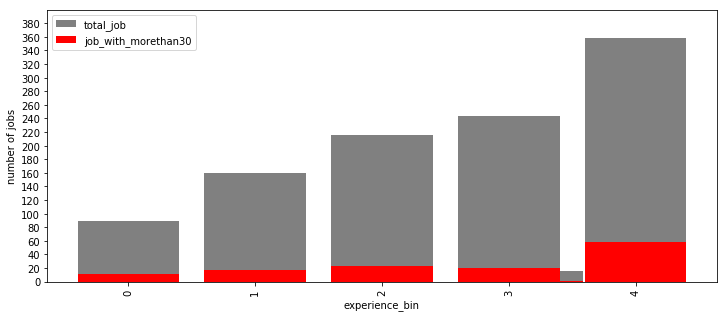

In [47]:
plot_job_difference(data_FSR,year=2017,cut_off=30)

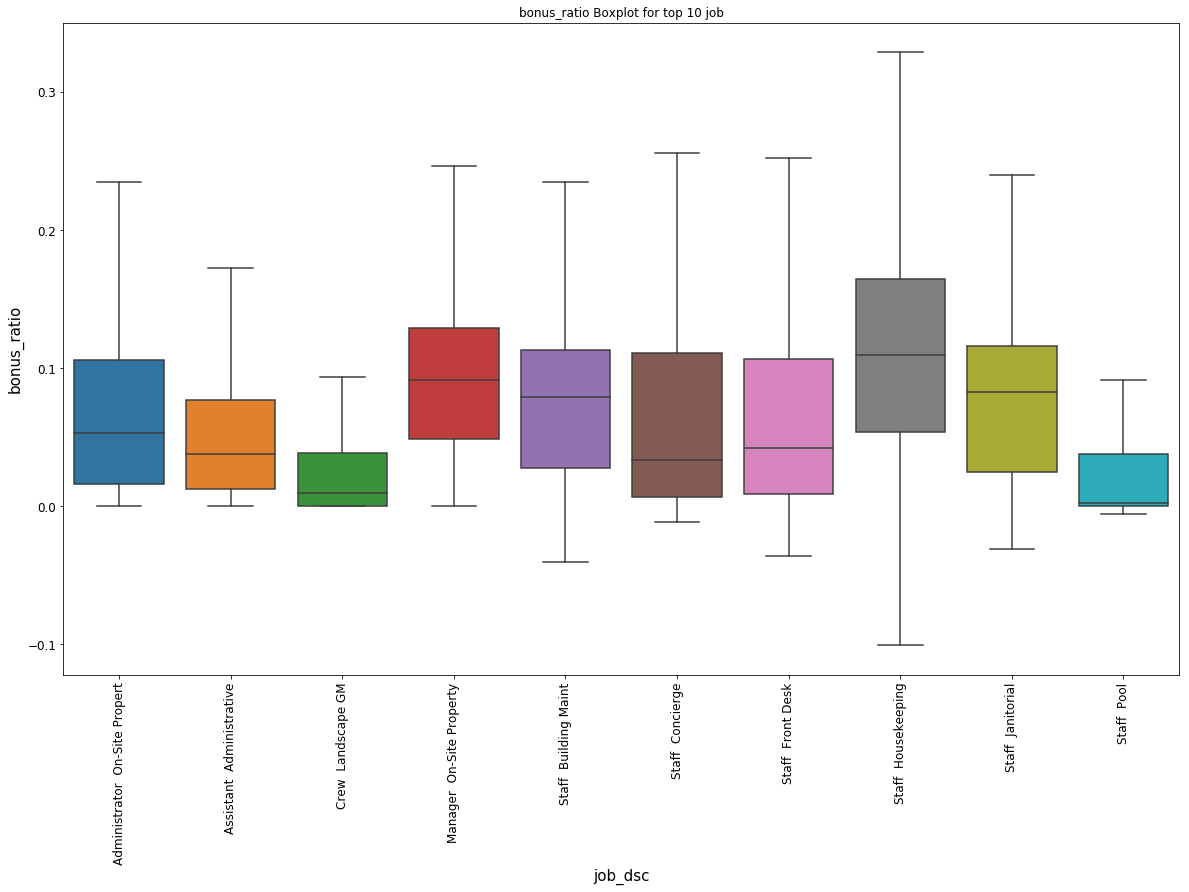

In [48]:
get_box_plot(dataframe30FSR,"bonus_ratio",2017)

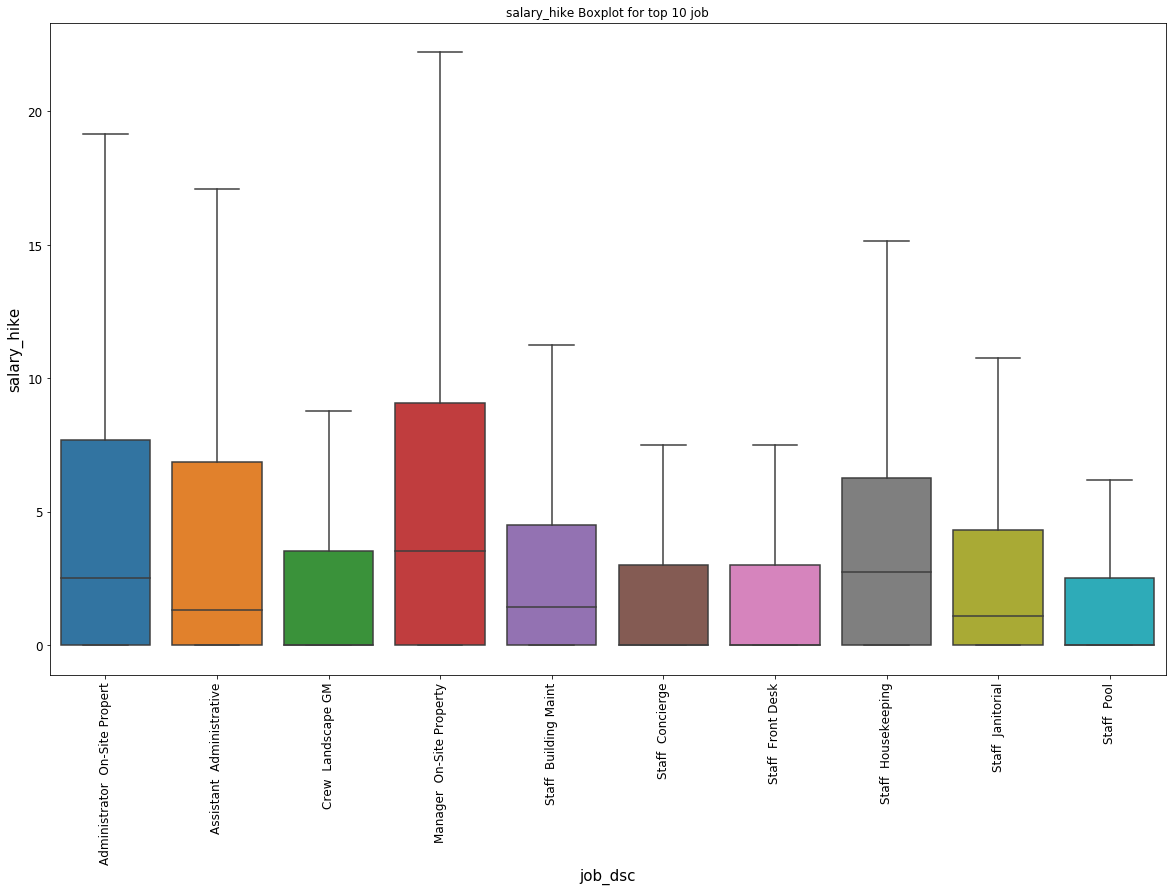

In [49]:
get_box_plot(dataframe30FSR,"salary_hike",2017)

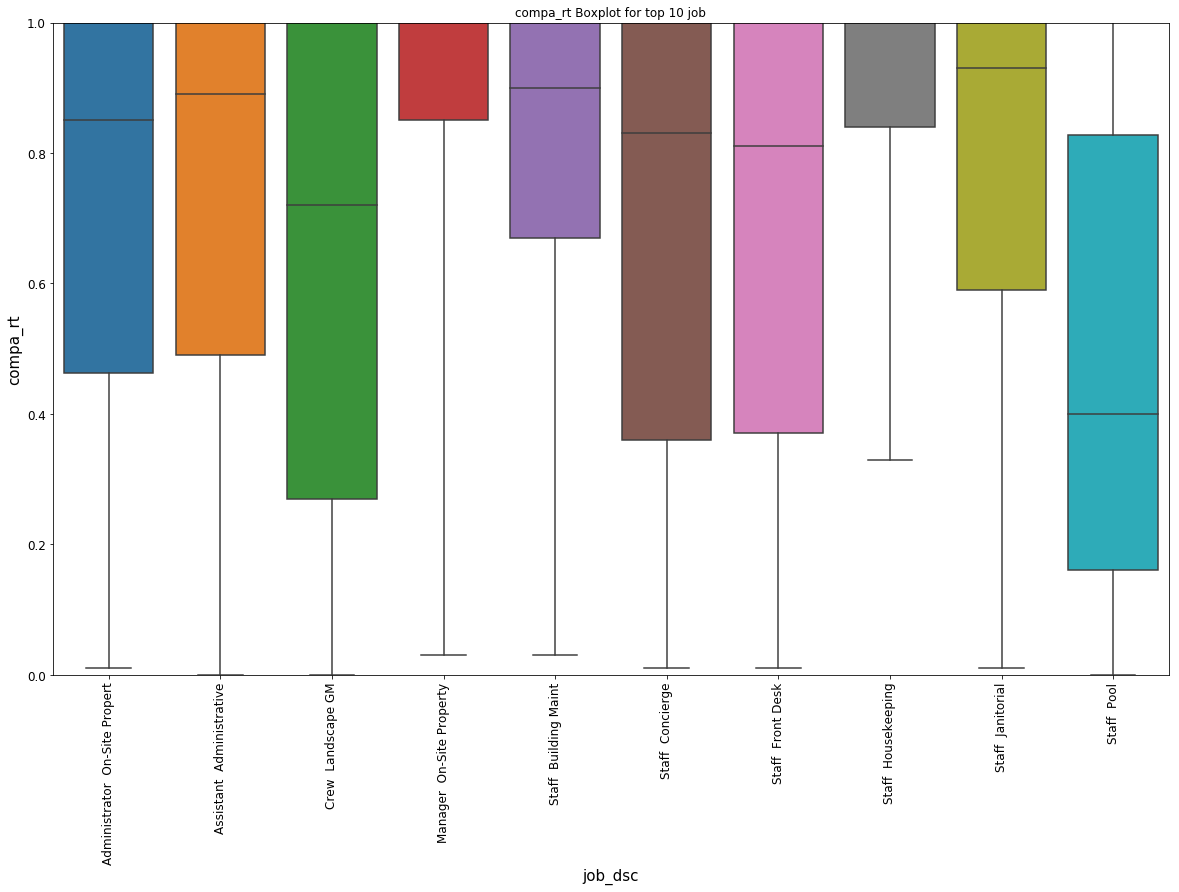

In [50]:
get_box_plot(dataframe30FSR,"compa_rt",2017)

None
here


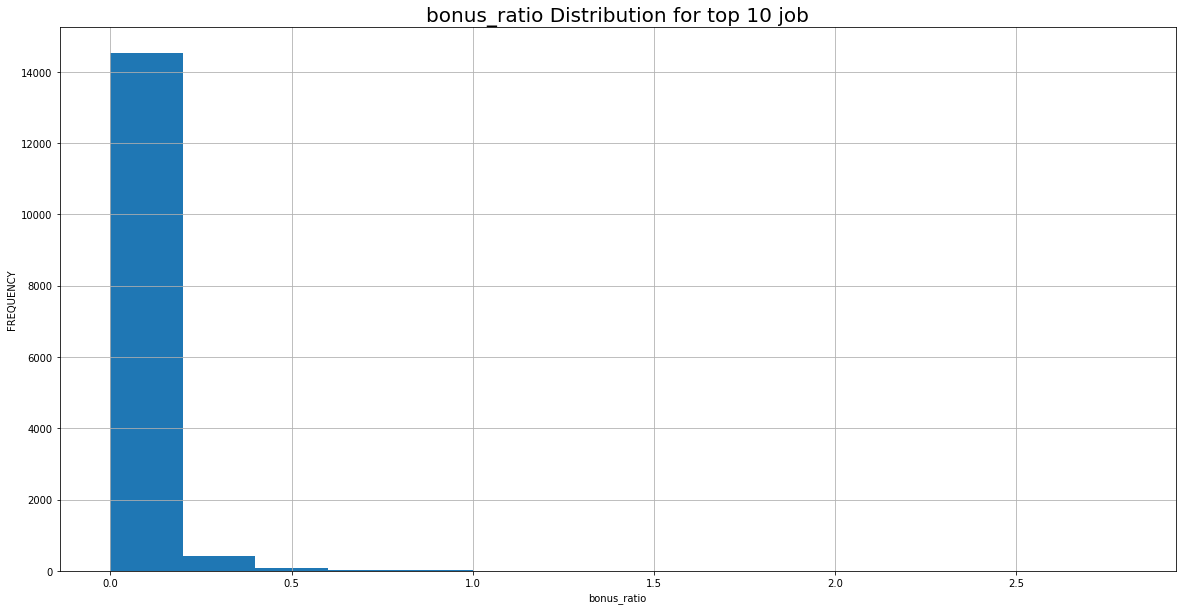

In [51]:
plot_feature('bonus_ratio',dataframe30FSR,2017, all=None)

In [52]:
dataframe_quantile_FSR = get_quantile(dataframe30FSR,2017,0.90,0.90,0.90)

In [53]:
get_high_performer(dataframe_quantile_FSR,dataframe30FSR,2017)

number of high performer in all Dimension:- 101
number of high performer in Salary and Bonus:- 266
number of high performer in Salary and Compa:- 275
number of high performer in Bonus and Compa:- 511
number of high performer in only Bonus:- 1578
number of high performer in only SalaryHike:- 1584
number of high performer in only CompaRT:- 1605


,ooid,aoid,job_dsc,bonus_ratio,salary_hike,compa_rt,experience_bin,year,Bonus_quantile,SalaryHike_quantile,CompaRT_quantile,IsHighPerformerAll,IsHighPerformerSalBonus,IsHighPerformerSalCompa,IsHighPerformerBonusCompa,IsHighPerformerBonus,IsHighPerformerSalaryHike,IsHighPerformerCompaRT
0,G3G7E0K05TQ92T61,G30398W7T492DGMG,Account Manager Landscape GM,0.012917,0.000000,0.99,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,G3G7E0K05TQ92T61,G344QXZFRNFYEQGT,Account Manager Landscape GM,0.042073,19.892500,0.97,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,G344QXZFRNFYEQGT,NaN
2,G3G7E0K05TQ92T61,G34A9SMD153XHQ3K,Account Manager Landscape GM,0.040365,6.502500,0.99,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G3G7E0K05TQ92T61,G34BKA9V3FHQ6927,Account Manager Landscape GM,0.067265,3.750000,1.21,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,G3G7E0K05TQ92T61,G34BKA9V3FHQCE40,Account Manager Landscape GM,0.117476,0.750000,2.26,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,NaN,G34BKA9V3FHQCE40
5,G3G7E0K05TQ92T61,G34BKA9V3FHQCZ2F,Account Manager Landscape GM,0.134513,4.150000,0.56,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,G3G7E0K05TQ92T61,G34BKA9V3FHQJMVN,Account Manager Landscape GM,0.326037,11.362500,1.52,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,G34BKA9V3FHQJMVN,NaN,NaN
7,G3G7E0K05TQ92T61,G34BKA9V3FHQKZN9,Account Manager Landscape GM,0.069194,0.750000,1.27,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,G3G7E0K05TQ92T61,G34BKA9V3FHQTXJ5,Account Manager Landscape GM,0.053663,4.512500,0.99,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,G3G7E0K05TQ92T61,G34BKA9V3FHQXA5N,Account Manager Landscape GM,0.186107,1.125000,1.62,4.0,2017,0.168834,15.9155,1.620,NaN,NaN,NaN,G34BKA9V3FHQXA5N,G34BKA9V3FHQXA5N,NaN,G34BKA9V3FHQXA5N


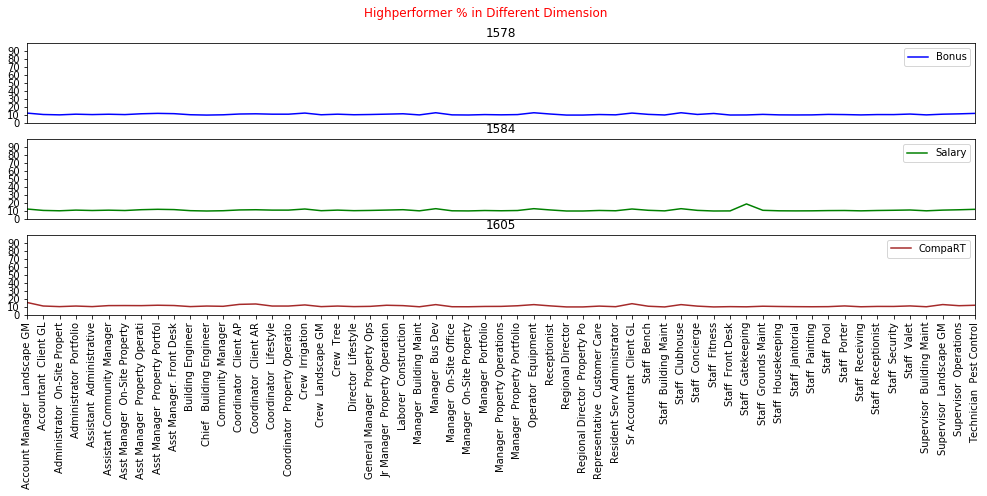

In [74]:
subplot_high_performer_perc(dataframe_quantile_FSR,data=dataframe30FSR,year=2017)

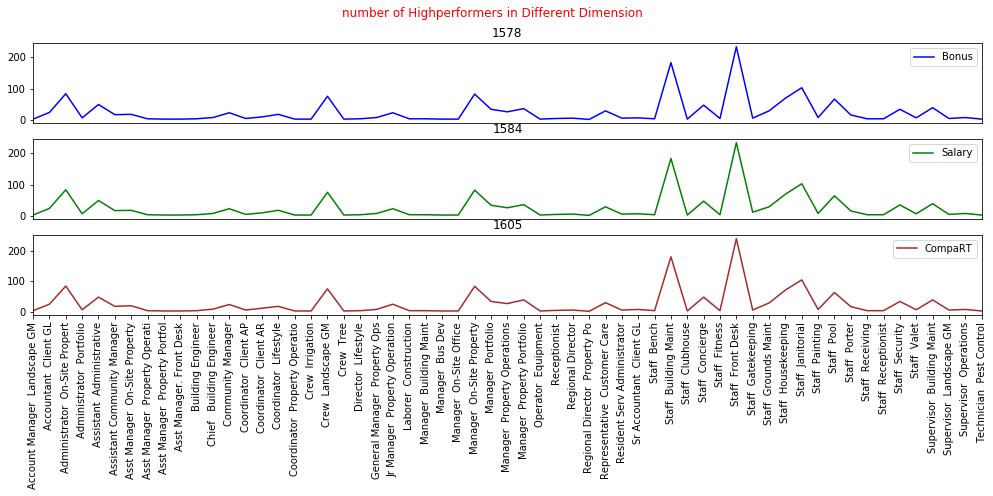

In [75]:
subplot_high_performer_nmbr(dataframe_quantile_FSR,data=dataframe30FSR,year=2017)

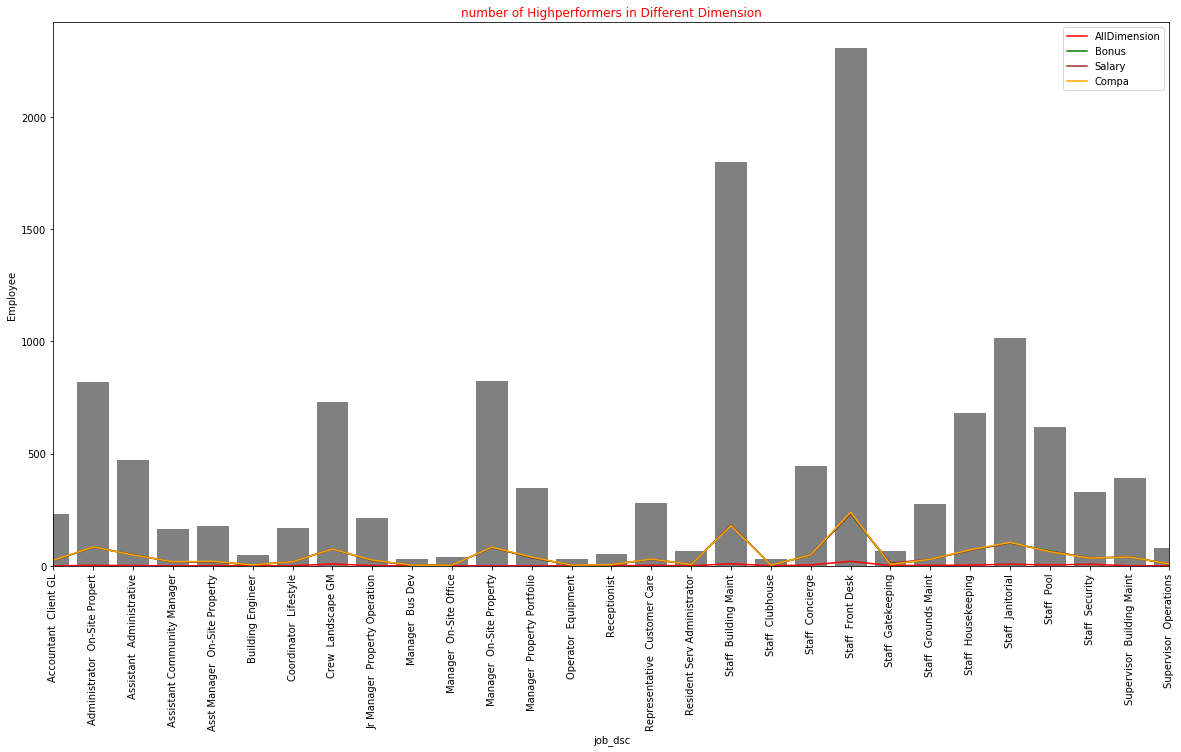

In [76]:
plot_high_performer_individual(dataframe_quantile_FSR,dataframe30FSR,2017)

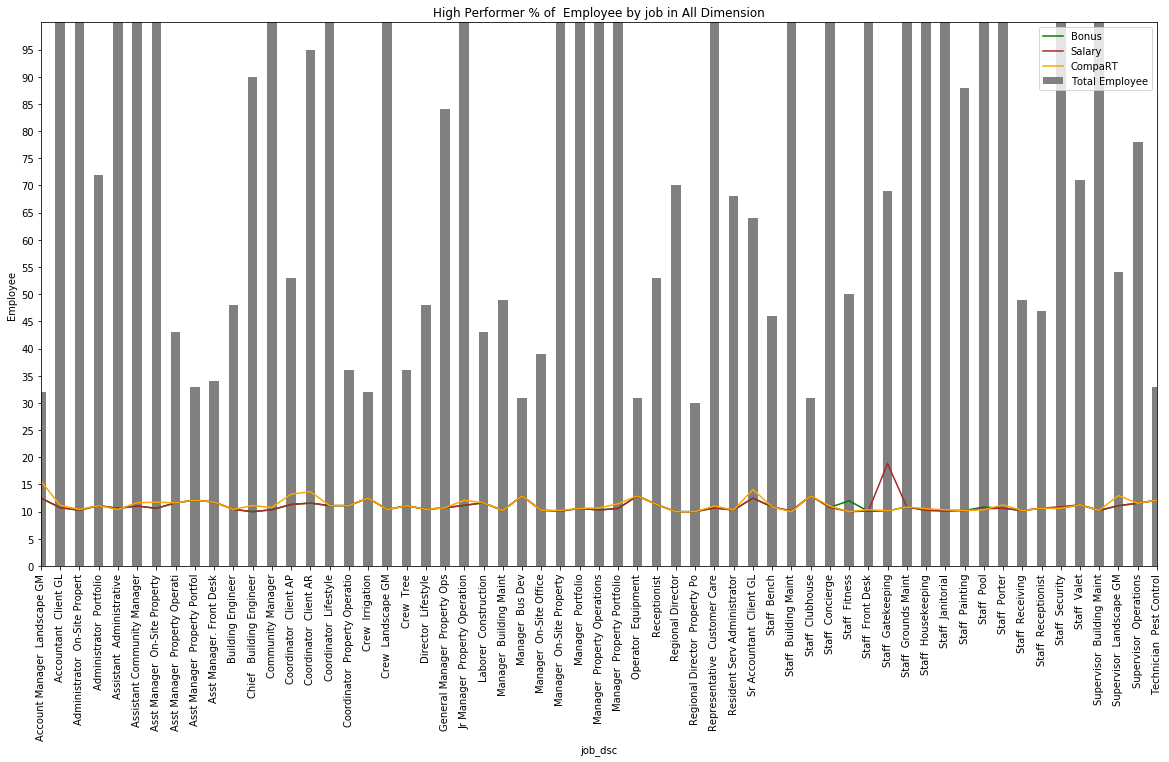

In [77]:
plot_high_performer_individual_perc(dataframe_quantile_FSR,dataframe30FSR,2017)

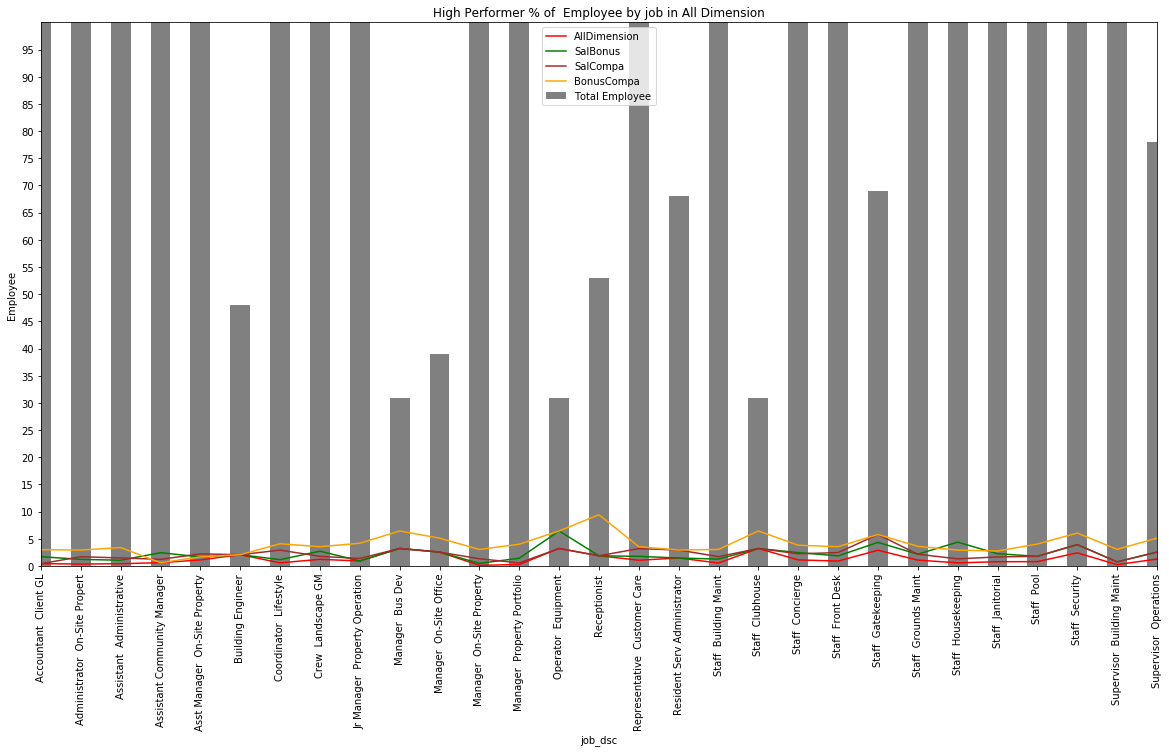

In [58]:
plot_high_performer(dataframe_quantile_FSR,dataframe30FSR,2017)

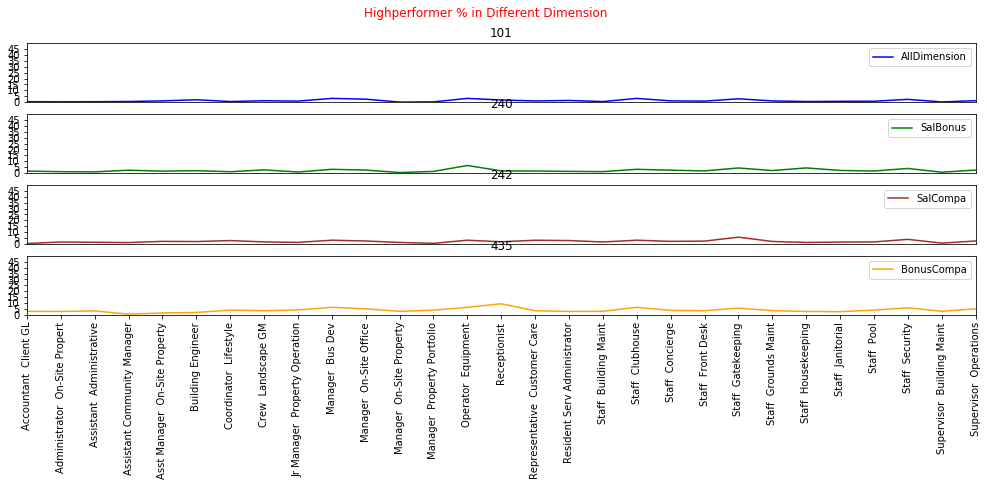

In [59]:
subplot_high_performer(dataframe_quantile_FSR,data=dataframe30FSR,year=2017)

### dropped expe bin

In [92]:
path="C:\\Users\\kumrajni\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\Jupyter_Learnign\\Jupyter_Learnign\\Peformance\\peers_2017wndrfl.csv"
data = pd.read_csv(path,header=0)

In [94]:
fillna(data)

In [96]:
lis_jobs = ['Associate I','Associate VI','Citrus Processor','Equipment Operator III','Warehouse Person','Director I','Supervisor II','Retail Sales Merchandiser','Sales Specialist','District Sales Manager','General Labor - Seasonal','Lead-Packinghouse']

In [95]:
data.head()

,ooid,aoid,job_dsc,bonus_ratio,salary_hike,compa_rt,year
0,G3AMKMQ4X429D89D,G30H9P5ECQXAK6G7,Manufacturing Lead (POM),0.056875,8.70,1.52,2017
1,G3AMKMQ4X429D89D,G30Y87WH816W1MTD,Associate II,0.000000,0.00,1.04,2017
2,G3AMKMQ4X429D89D,G3156MDZGPDH0H6F,Professional Analyst II (EX),0.108953,3.00,1.07,2017
3,G3AMKMQ4X429D89D,G3156MDZGPDHBZRB,Clerk-Shipping,0.035828,3.03,0.74,2017
4,G3AMKMQ4X429D89D,G339ZE8012FF03AJ,General Labor - Seasonal,0.028155,8.91,0.39,2017


In [98]:
dataInJob = data[(data['year']==2017) & (data['job_dsc'].isin(lis_jobs))]

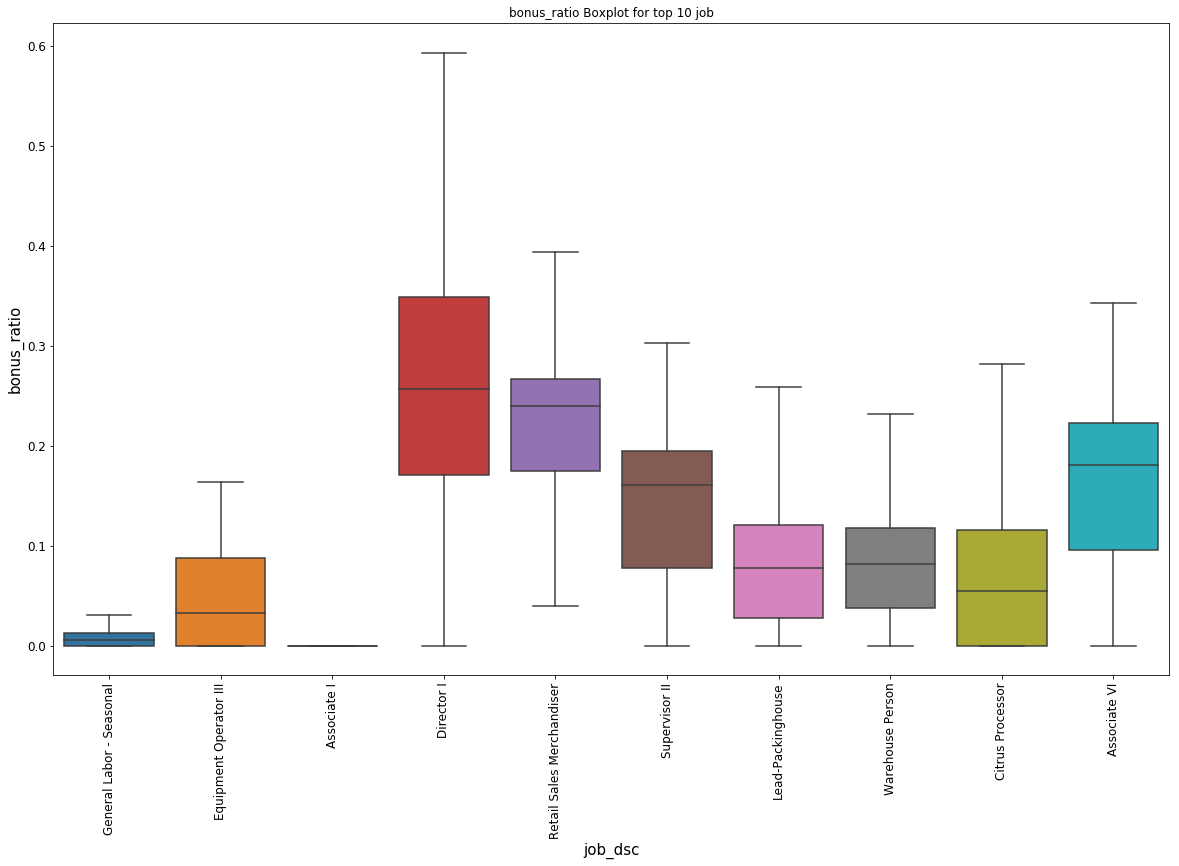

In [102]:
get_box_plot(dataInJob,"bonus_ratio",2017)

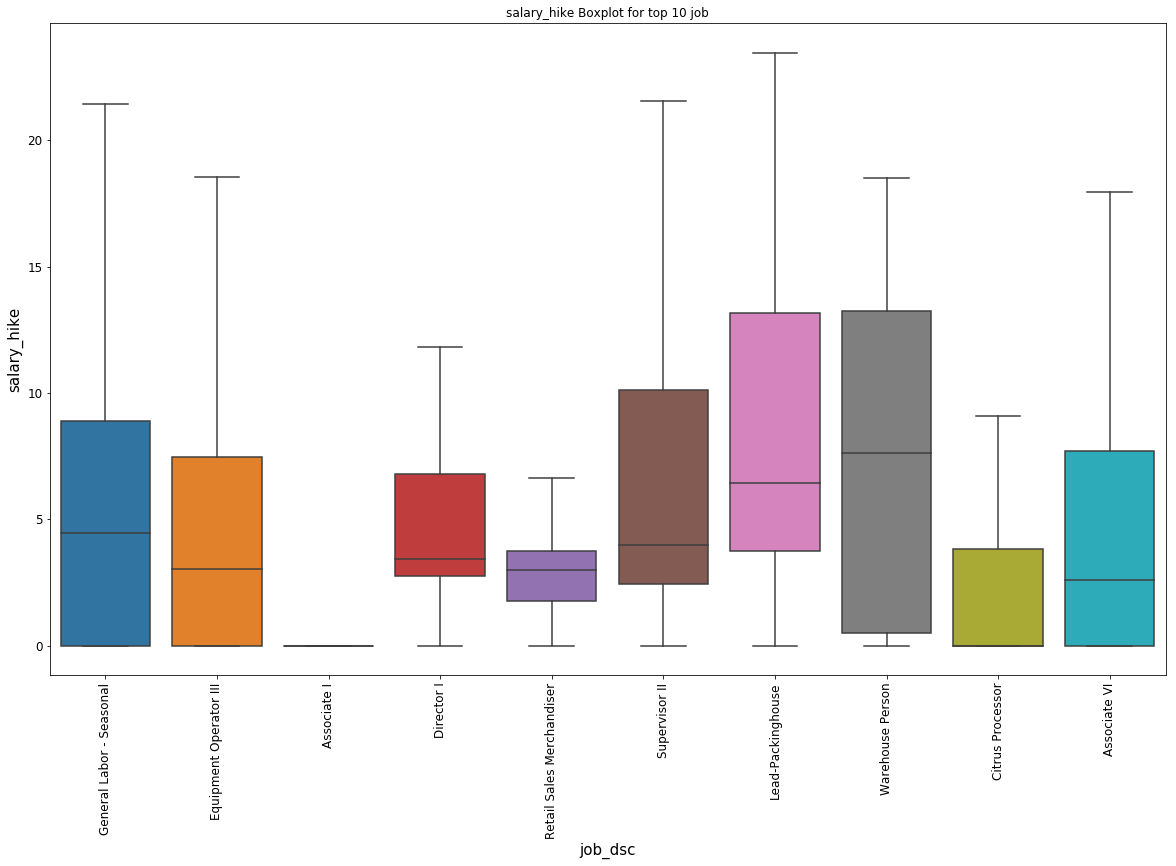

In [103]:
get_box_plot(dataInJob,"salary_hike",2017)

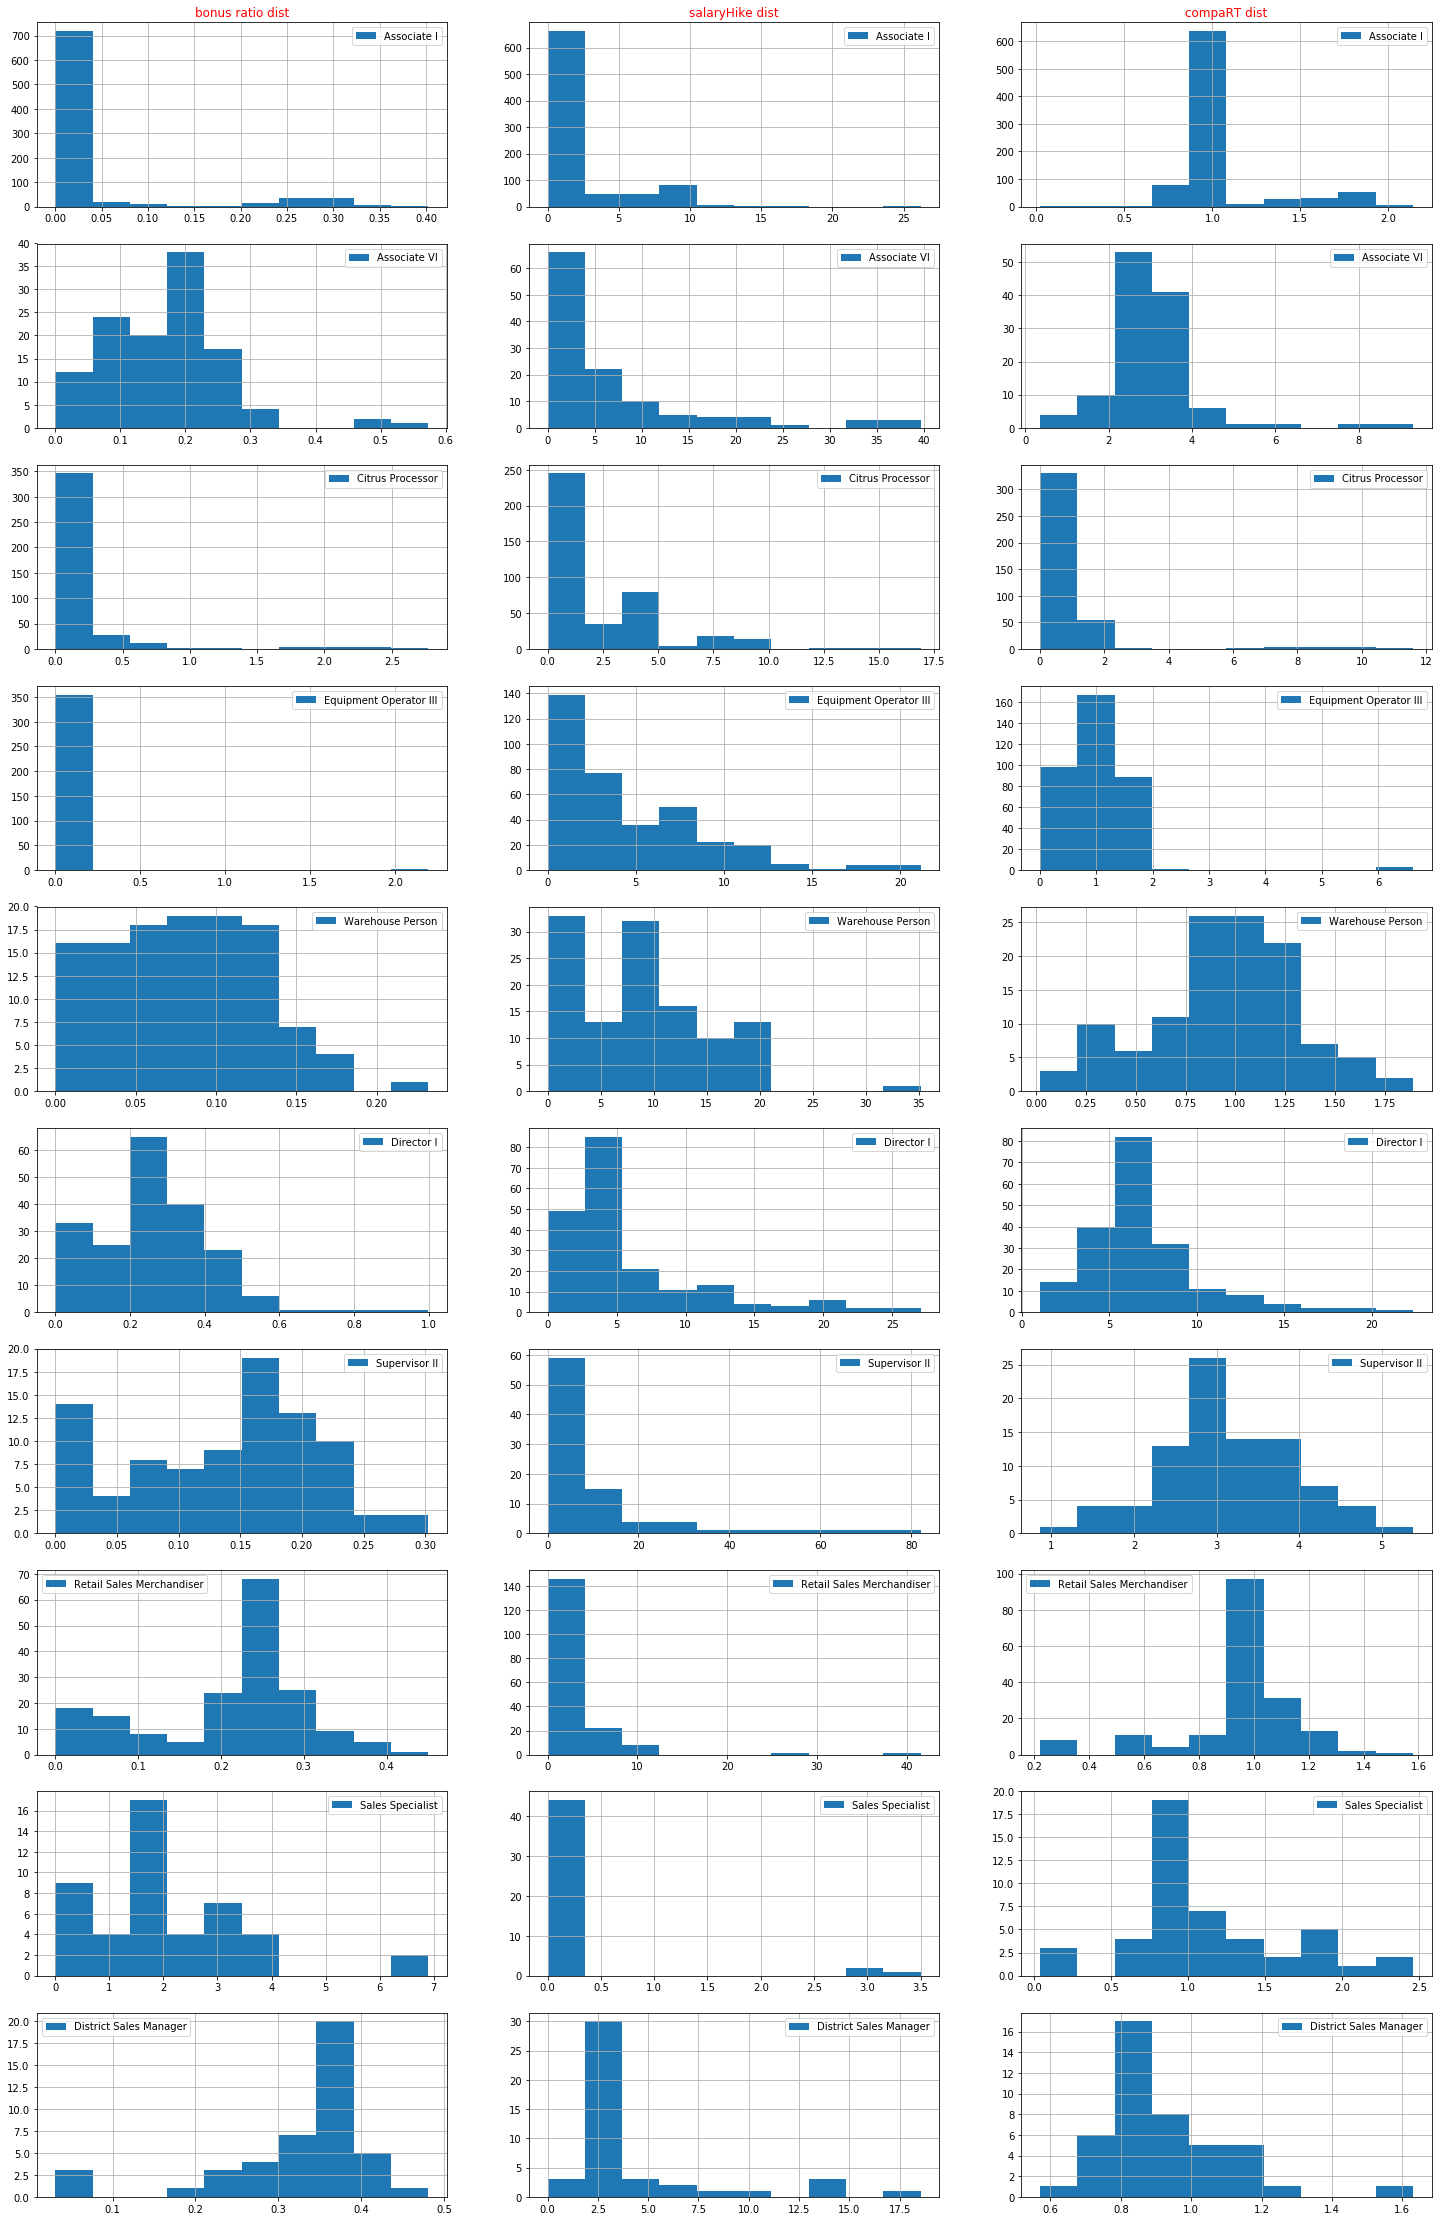

In [72]:
lis_jobs = ['Associate I','Associate VI','Citrus Processor','Equipment Operator III','Warehouse Person','Director I','Supervisor II','Retail Sales Merchandiser','Sales Specialist','District Sales Manager','General Labor - Seasonal','Lead-Packinghouse']
getdistribution(dataInJob=data_30,lis_jobs=lis_jobs)

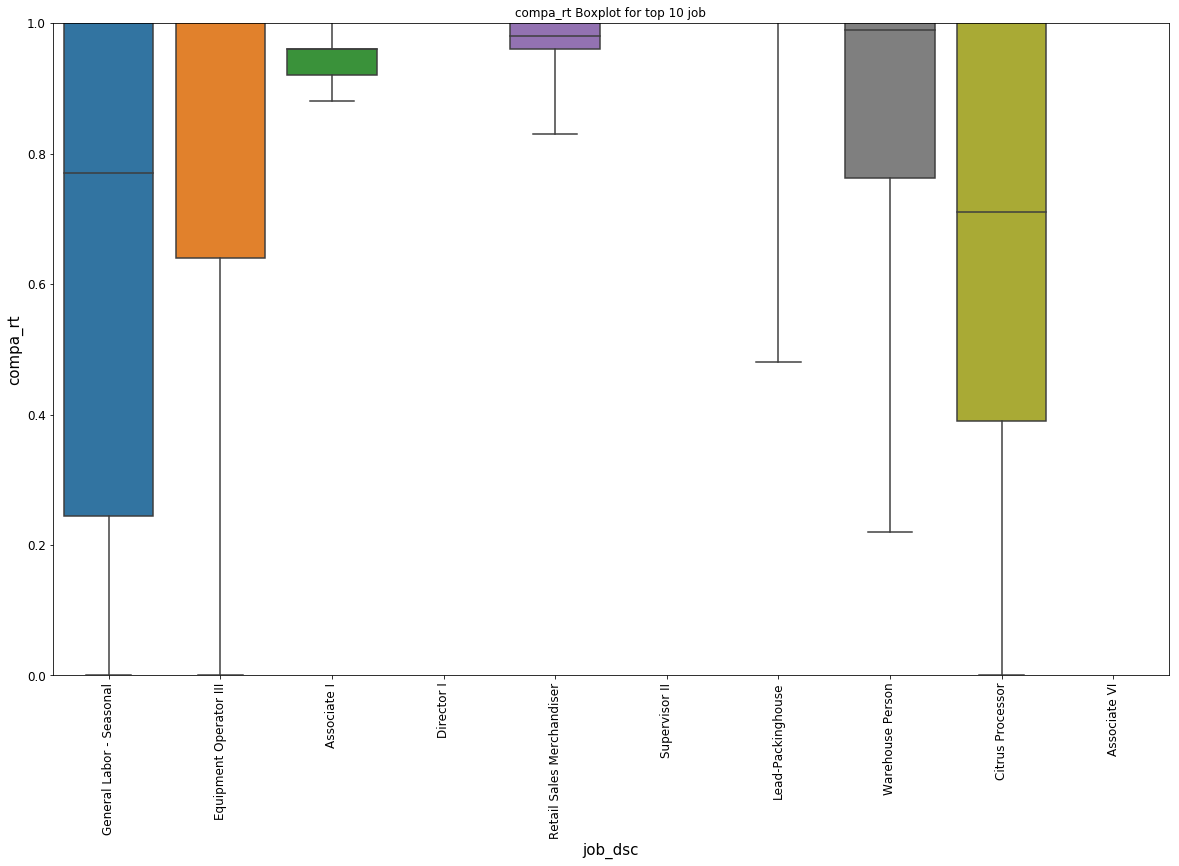

In [104]:
get_box_plot(dataInJob,"compa_rt",2017)

In [108]:
lis_jobs

['Associate I',
 'Associate VI',
 'Citrus Processor',
 'Equipment Operator III',
 'Warehouse Person',
 'Director I',
 'Supervisor II',
 'Retail Sales Merchandiser',
 'Sales Specialist',
 'District Sales Manager',
 'General Labor - Seasonal',
 'Lead-Packinghouse']

In [164]:
# def getdistribution(data,litjob,feature):
#     suptitle= feature+" distribution "
#     plt.figure(figsize=(20,8))
#     plt.subplot(2,5,1)
#     ax0 = dataInJob[dataInJob['job_dsc']==lis_jobs[0]][feature].hist(label=lis_jobs[0])
#     ax0.legend()
#     plt.subplot(2,5,2)
#     ax1 = dataInJob[dataInJob['job_dsc']==lis_jobs[1]][feature].hist(label=lis_jobs[1])
#     ax1.legend()
#     plt.subplot(2,5,3)
#     ax2 = dataInJob[dataInJob['job_dsc']==lis_jobs[2]][feature].hist(label=lis_jobs[2])
#     ax2.legend()
#     plt.subplot(2,5,4)
#     ax3 = dataInJob[dataInJob['job_dsc']==lis_jobs[3]][feature].hist(label=lis_jobs[3])
#     ax3.legend()
#     plt.subplot(2,5,5)
#     ax4 = dataInJob[dataInJob['job_dsc']==lis_jobs[4]][feature].hist(label=lis_jobs[4])
#     ax4.legend()
#     plt.subplot(2,5,6)
#     ax5 = dataInJob[dataInJob['job_dsc']==lis_jobs[5]][feature].hist(label=lis_jobs[5])
#     ax5.legend()
#     plt.subplot(2,5,7)
#     ax6 = dataInJob[dataInJob['job_dsc']==lis_jobs[6]][feature].hist(label=lis_jobs[6])
#     ax6.legend()
#     plt.subplot(2,5,8)
#     ax7 = dataInJob[dataInJob['job_dsc']==lis_jobs[7]][feature].hist(label=lis_jobs[7])
#     ax7.legend()
#     plt.subplot(2,5,9)
#     ax8 = dataInJob[dataInJob['job_dsc']==lis_jobs[8]][feature].hist(label=lis_jobs[8])
#     ax8.legend()
#     plt.subplot(2,5,10)
#     ax9 = dataInJob[dataInJob['job_dsc']==lis_jobs[9]][feature].hist(label=lis_jobs[9])
#     ax9.legend()
#     plt.suptitle(suptitle,color='r')
#     plt.show()

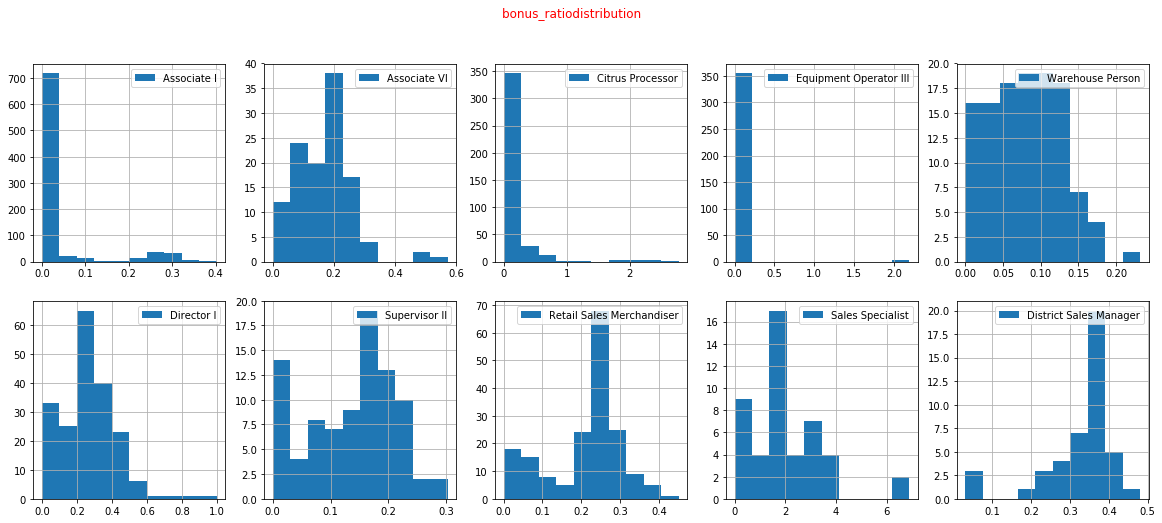

In [161]:
getdistribution(dataInJob,feature='bonus_ratio',litjob=lis_jobs)

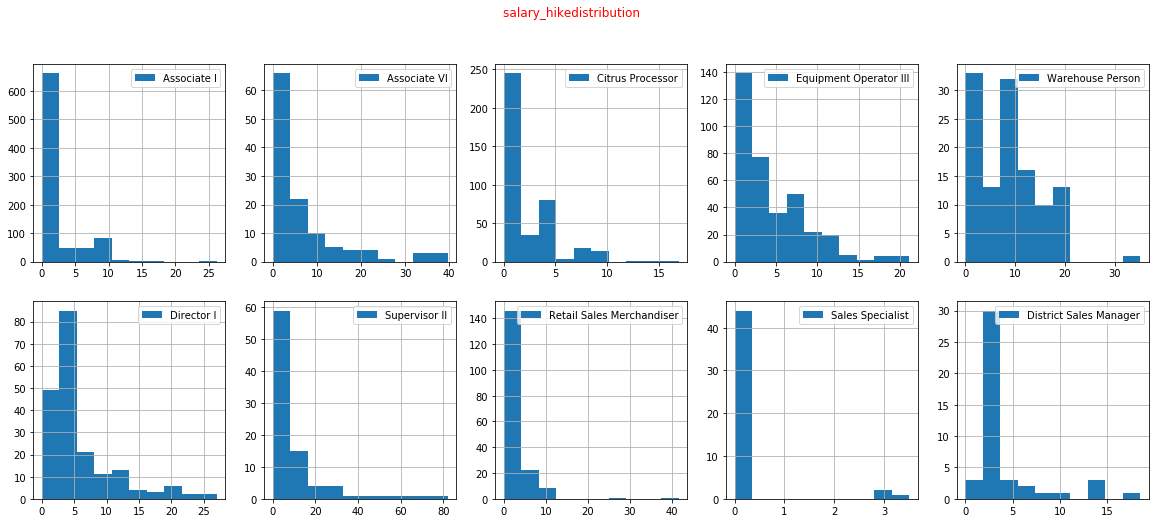

In [162]:
getdistribution(dataInJob,feature='salary_hike',litjob=lis_jobs)

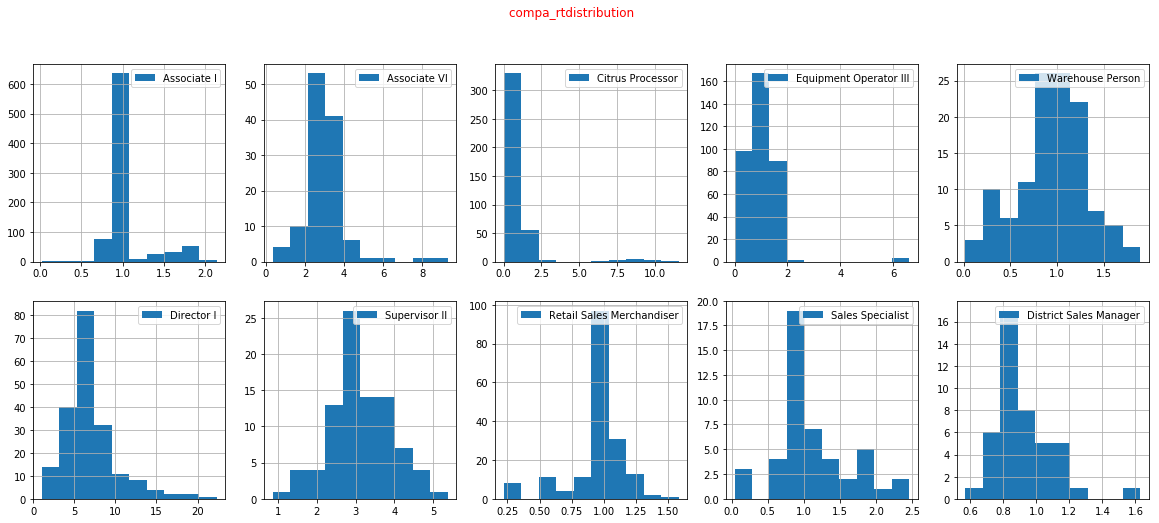

In [163]:
getdistribution(dataInJob,feature='compa_rt',litjob=lis_jobs)